# TODO
- snapshots (be able to store and continue from any point of training)
  - https://www.tensorflow.org/guide/saved_model
- much deeper cnn
- statistics of the layers: distribution, dynamic of distribution, zeros (dead nodes) and etc
- after each epoch calculate and store accuracy for (training and validation dataset)
- take a look on tensorflow board

In [2]:
import tensorflow as tf
import numpy as np
import math
import time
import timeit
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from IPython.display import display, HTML

import cifar.loader
from nn.affine import affine
from nn.cnn import cnn
from nn_visualization.draw_cnn_layer import draw_layers_of_models
from nn_visualization.graphics import show_graphs
from nn_visualization.tables import show_tables
from runner.estimate_model import estimate_model
from runner.model_runner import run_model

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = cifar.loader.get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Training
Iteration 0: with minibatch training loss = 29 and accuracy of 0.094
Iteration 100: with minibatch training loss = 9.99 and accuracy of 0.34
Iteration 200: with minibatch training loss = 7.82 and accuracy of 0.23
Iteration 300: with minibatch training loss = 7.23 and accuracy of 0.27
Iteration 400: with minibatch training loss = 6.36 and accuracy of 0.31
Iteration 500: with minibatch training loss = 5.59 and accuracy of 0.36
Iteration 600: with minibatch training loss = 4.54 and accuracy of 0.36
Iteration 700: with minibatch training loss = 4.9 and accuracy of 0.3
Epoch 1, Overall loss = 7.08 and accuracy of 0.335


Iteration 800: with minibatch training loss = 3.76 and accuracy of 0.45
Iteration 900: with minibatch training loss = 2.74 and accuracy of 0.5
Iteration 1000: with minibatch training loss = 2.79 and accuracy of 0.48
Iteration 1100: with minibatch training loss = 4.42 and accuracy of 0.34
Iteration 1200: with minibatch training loss = 2.44 and accuracy of 0.48
Iteration 1300: with minibatch training loss = 3.35 and accuracy of 0.39
Iteration 1400: with minibatch training loss = 2.74 and accuracy of 0.48
Iteration 1500: with minibatch training loss = 2.76 and accuracy of 0.42
Epoch 2, Overall loss = 3.08 and accuracy of 0.45


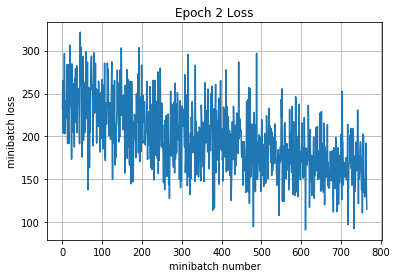

Iteration 1600: with minibatch training loss = 1.68 and accuracy of 0.55
Iteration 1700: with minibatch training loss = 1.77 and accuracy of 0.59
Iteration 1800: with minibatch training loss = 2.18 and accuracy of 0.61
Iteration 1900: with minibatch training loss = 1.83 and accuracy of 0.55
Iteration 2000: with minibatch training loss = 2.31 and accuracy of 0.48
Iteration 2100: with minibatch training loss = 1.83 and accuracy of 0.59
Iteration 2200: with minibatch training loss = 1.97 and accuracy of 0.53
Epoch 3, Overall loss = 2.18 and accuracy of 0.519


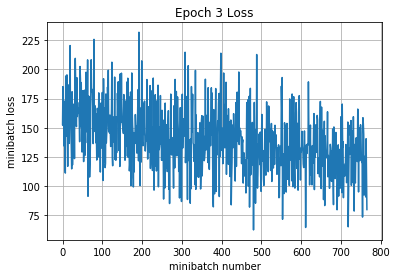

training time (seconds) 187.92445909999515
Validation
Epoch 1, Overall loss = 2.74 and accuracy of 0.46
validation time (seconds) 0.8707777999952668
predict
Epoch 1, Overall loss = 2.63 and accuracy of 0
Training
Iteration 0: with minibatch training loss = 41.9 and accuracy of 0.094
Iteration 100: with minibatch training loss = 12.6 and accuracy of 0.23
Iteration 200: with minibatch training loss = 9.9 and accuracy of 0.25
Iteration 300: with minibatch training loss = 7.71 and accuracy of 0.38
Iteration 400: with minibatch training loss = 5.89 and accuracy of 0.41
Iteration 500: with minibatch training loss = 5.7 and accuracy of 0.36
Iteration 600: with minibatch training loss = 5.51 and accuracy of 0.3
Iteration 700: with minibatch training loss = 5.32 and accuracy of 0.38
Epoch 1, Overall loss = 8.85 and accuracy of 0.316


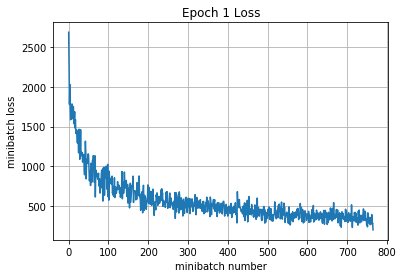

Iteration 800: with minibatch training loss = 3.99 and accuracy of 0.38
Iteration 900: with minibatch training loss = 5.93 and accuracy of 0.33
Iteration 1000: with minibatch training loss = 4.02 and accuracy of 0.53
Iteration 1100: with minibatch training loss = 4.01 and accuracy of 0.36
Iteration 1200: with minibatch training loss = 2.92 and accuracy of 0.44
Iteration 1300: with minibatch training loss = 3.75 and accuracy of 0.42
Iteration 1400: with minibatch training loss = 3.07 and accuracy of 0.47
Iteration 1500: with minibatch training loss = 4.51 and accuracy of 0.36
Epoch 2, Overall loss = 4.14 and accuracy of 0.406


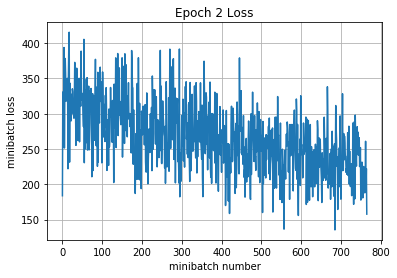

Iteration 1600: with minibatch training loss = 3.52 and accuracy of 0.41
Iteration 1700: with minibatch training loss = 3.25 and accuracy of 0.45
Iteration 1800: with minibatch training loss = 3.27 and accuracy of 0.45
Iteration 1900: with minibatch training loss = 3.62 and accuracy of 0.41
Iteration 2000: with minibatch training loss = 3.33 and accuracy of 0.39
Iteration 2100: with minibatch training loss = 2.69 and accuracy of 0.48
Iteration 2200: with minibatch training loss = 2.59 and accuracy of 0.52
Epoch 3, Overall loss = 3.01 and accuracy of 0.458


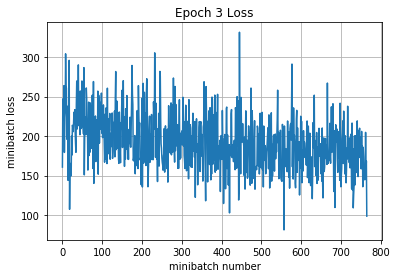

training time (seconds) 193.86876840000332
Validation
Epoch 1, Overall loss = 2.53 and accuracy of 0.47
validation time (seconds) 0.6269135000038659
predict
Epoch 1, Overall loss = 0.0595 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 46.3 and accuracy of 0.078
Iteration 100: with minibatch training loss = 17.1 and accuracy of 0.23
Iteration 200: with minibatch training loss = 9.78 and accuracy of 0.31
Iteration 300: with minibatch training loss = 10.4 and accuracy of 0.33
Iteration 400: with minibatch training loss = 10.2 and accuracy of 0.3
Iteration 500: with minibatch training loss = 10.1 and accuracy of 0.3
Iteration 600: with minibatch training loss = 8.15 and accuracy of 0.34
Iteration 700: with minibatch training loss = 7 and accuracy of 0.2
Epoch 1, Overall loss = 11.5 and accuracy of 0.299


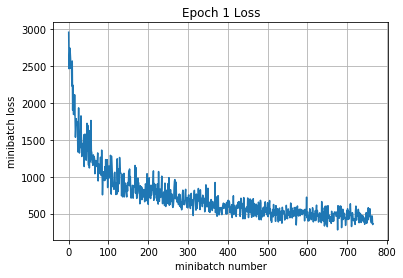

Iteration 800: with minibatch training loss = 8.04 and accuracy of 0.28
Iteration 900: with minibatch training loss = 4.9 and accuracy of 0.44
Iteration 1000: with minibatch training loss = 6.25 and accuracy of 0.34
Iteration 1100: with minibatch training loss = 4.51 and accuracy of 0.42
Iteration 1200: with minibatch training loss = 5.13 and accuracy of 0.44
Iteration 1300: with minibatch training loss = 6.62 and accuracy of 0.38
Iteration 1400: with minibatch training loss = 4.89 and accuracy of 0.38
Iteration 1500: with minibatch training loss = 4.56 and accuracy of 0.45
Epoch 2, Overall loss = 5.44 and accuracy of 0.376


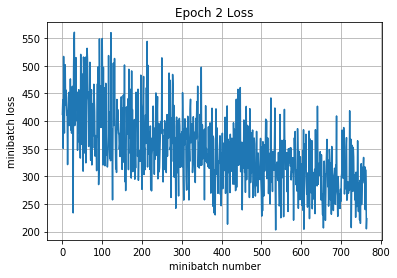

Iteration 1600: with minibatch training loss = 4.3 and accuracy of 0.36
Iteration 1700: with minibatch training loss = 3.46 and accuracy of 0.42
Iteration 1800: with minibatch training loss = 3.9 and accuracy of 0.41
Iteration 1900: with minibatch training loss = 4.01 and accuracy of 0.42
Iteration 2000: with minibatch training loss = 3.47 and accuracy of 0.44
Iteration 2100: with minibatch training loss = 3.99 and accuracy of 0.41
Iteration 2200: with minibatch training loss = 3.77 and accuracy of 0.34
Epoch 3, Overall loss = 3.81 and accuracy of 0.429


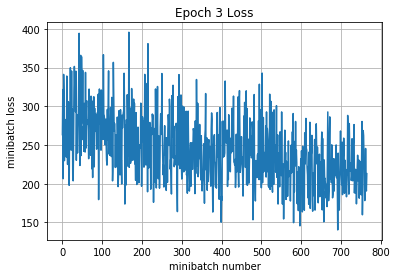

training time (seconds) 182.55143169999792
Validation
Epoch 1, Overall loss = 2.63 and accuracy of 0.488
validation time (seconds) 0.5169663000051514
predict
Epoch 1, Overall loss = 0.61 and accuracy of 1


In [84]:
def simple_model_1(X, y, is_training, dropout=None, **kwars):
    """
    define our graph (e.g. two_layer_convnet)
    """
    # CNN -> rule
    out = X

    out, [W1, b1] = cnn(idx=1, X=out, filters=32, kernel_size=(7,7), is_training=is_training, padding='VALID', use_batchnorm=False)

    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
   
    out, _ = affine(1, out, output_size=10)
    # return variabes which we'd like to evaluate
    return out, [W1,]

local_models = []
local_models.append(estimate_model({
    'name': 'without dropout',
    'scheme': ['CNN', 'relu', 'FC'],
    'learning_rate': 1e-4,
    'model_builder': simple_model_1,
    'num_of_epochs': 3,
}, X_train, y_train, X_val, y_val))

local_models.append(estimate_model({
    'name': 'Dropout 0.2',
    'scheme': ['CNN', 'relu', 'FC'],
    'learning_rate': 1e-4,
    'model_builder': simple_model_1,
    'dropout': 0.2,
    'num_of_epochs': 3,
}, X_train, y_train, X_val, y_val))

local_models.append(estimate_model({
    'name': 'Dropout 0.4',
    'scheme': ['CNN', 'relu', 'FC'],
    'learning_rate': 1e-4,
    'model_builder': simple_model_1,
    'dropout': 0.4,
    'num_of_epochs': 3,
}, X_train, y_train, X_val, y_val))

Model without dropout


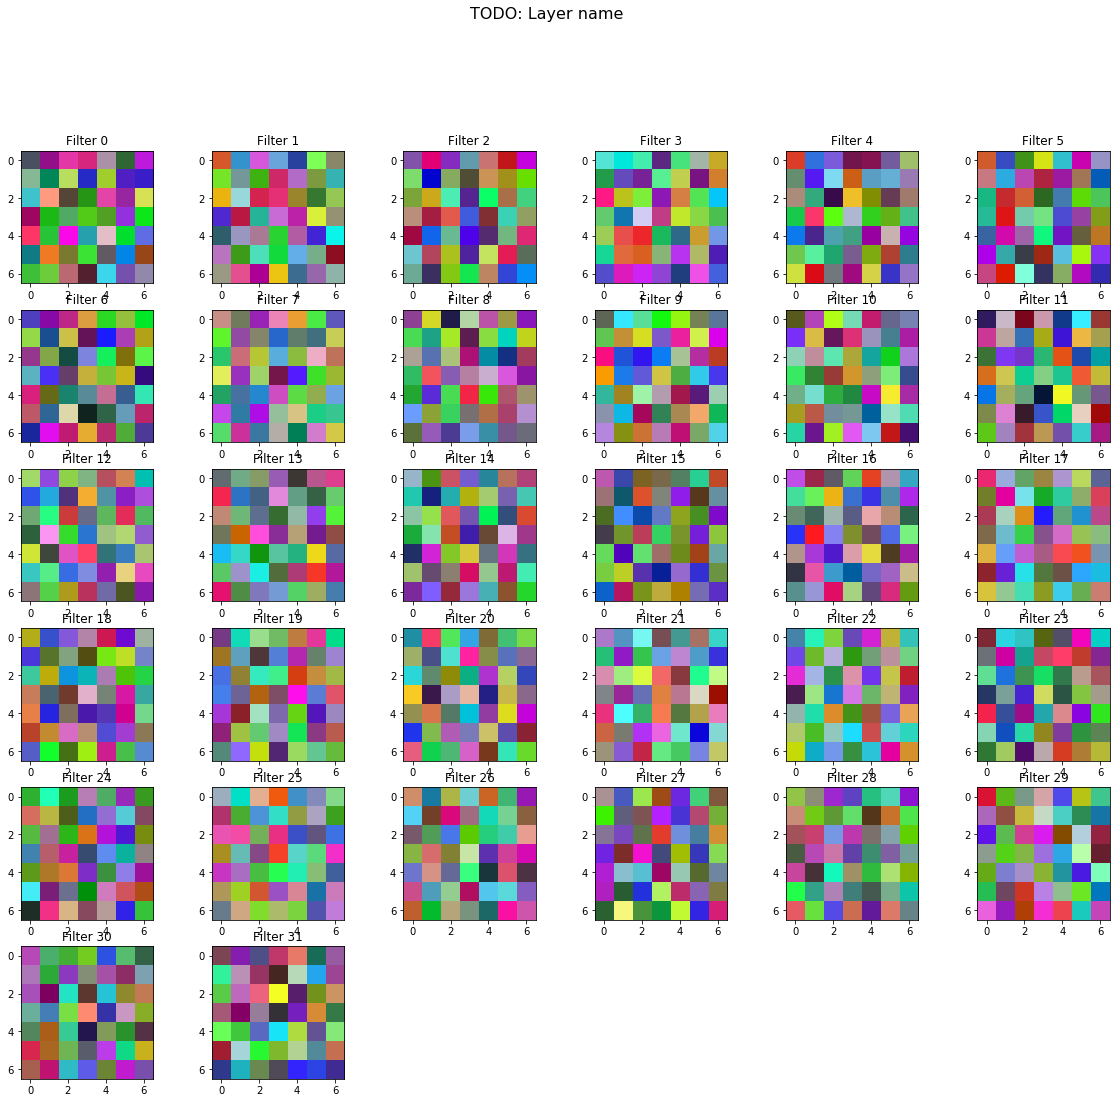

Model Dropout 0.2


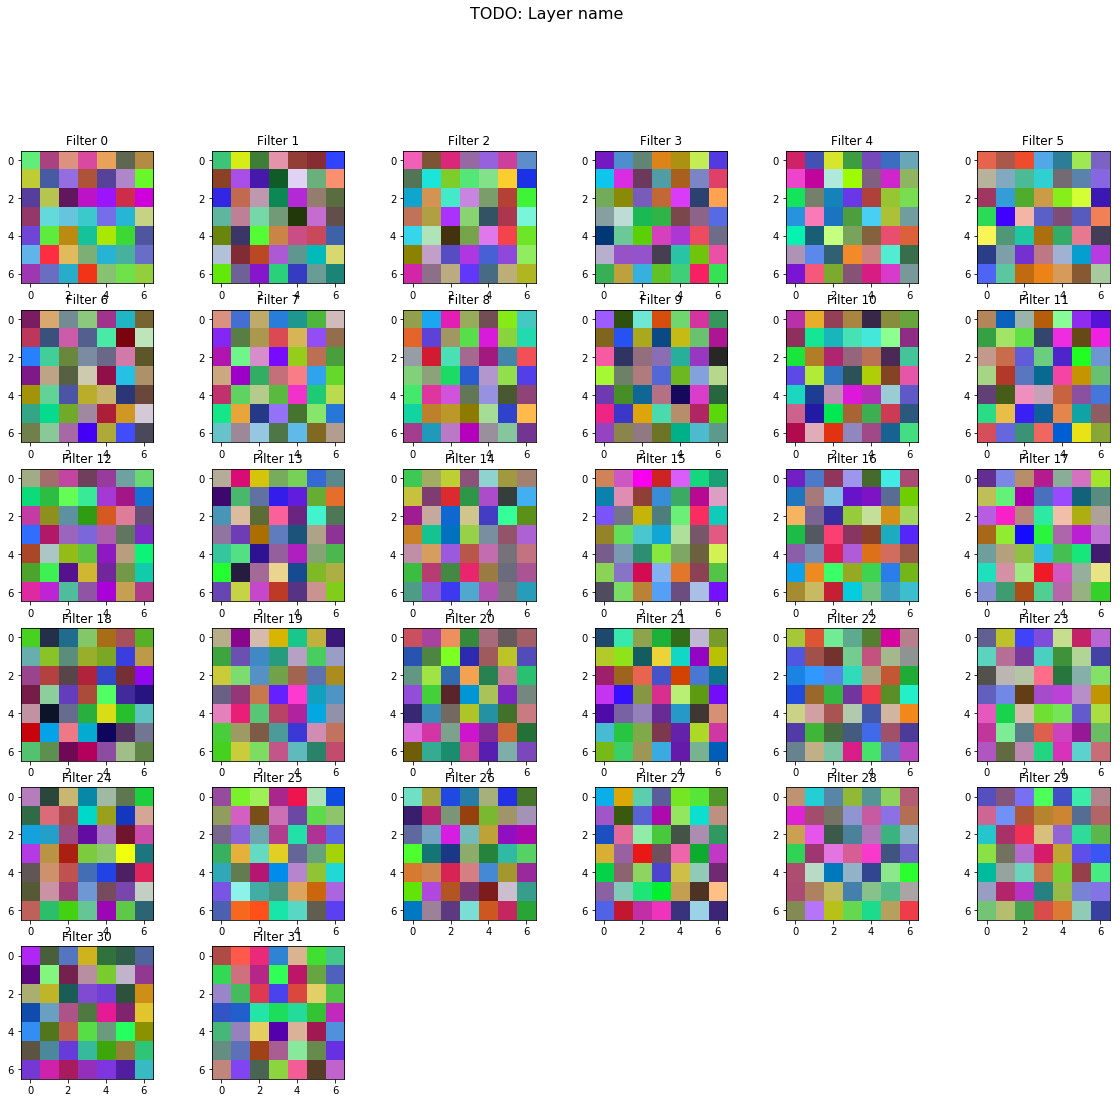

Model Dropout 0.4


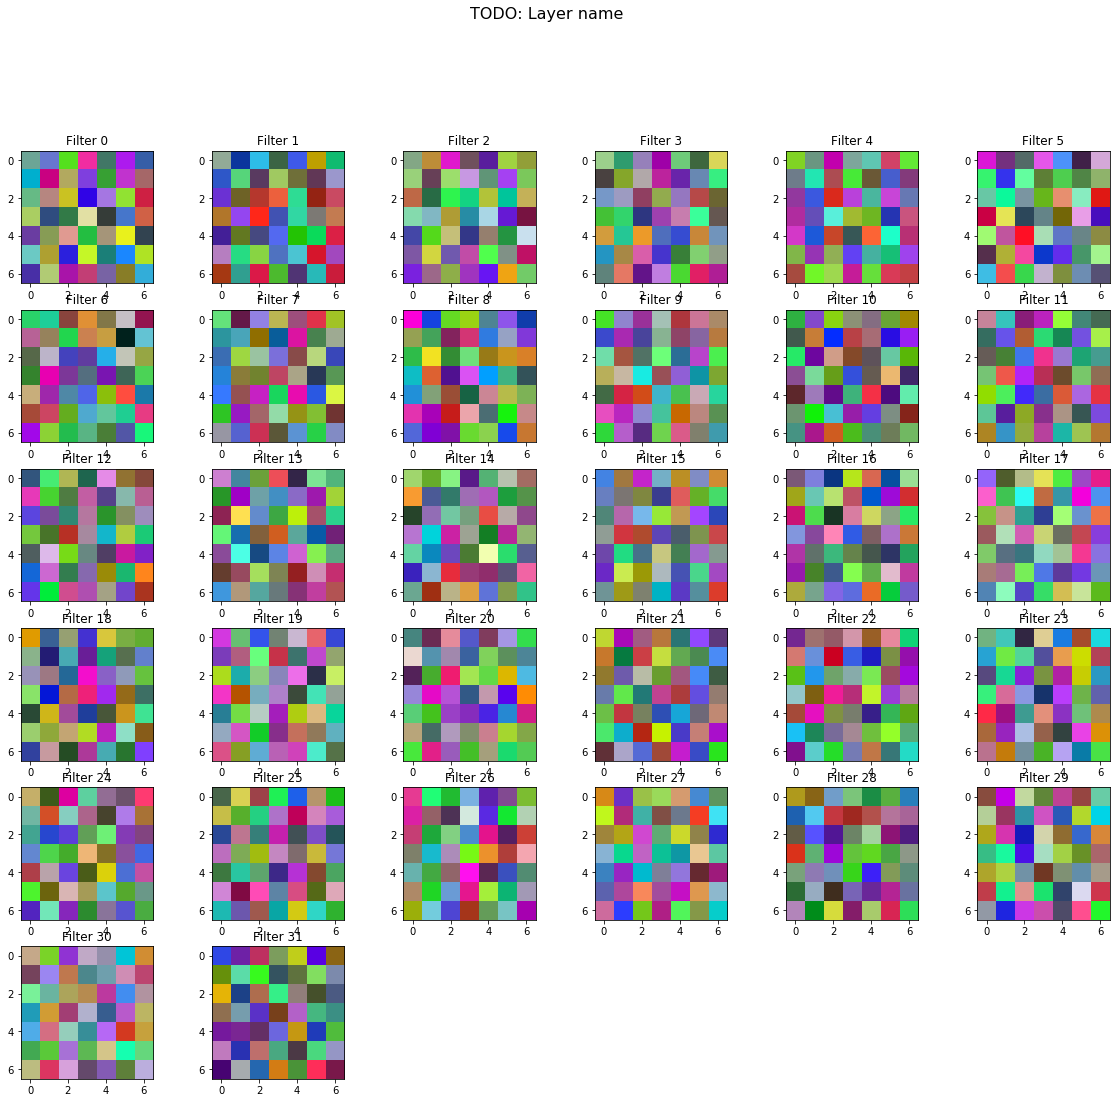

In [101]:
draw_layers_of_models(local_models)

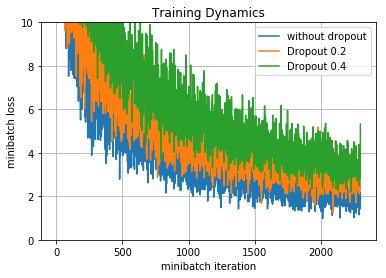

model: without dropout


predict  training validation
total_correct      NaN  0.518653       0.46
total_lost         NaN   2.17747    2.74122
time           0.04339   187.924   0.870778

model: Dropout 0.2


predict  training validation
total_correct      NaN  0.458367       0.47
total_lost         NaN   3.01181    2.53164
time           0.04196   193.869   0.626914

model: Dropout 0.4


predict  training validation
total_correct       NaN  0.429184      0.488
total_lost          NaN   3.81293    2.62836
time           0.048394   182.551   0.516966

In [102]:
show_graphs(local_models, ymax=10)
show_tables(local_models)

Training
Iteration 0: with minibatch training loss = 3.19 and accuracy of 0.14
Iteration 100: with minibatch training loss = 2.17 and accuracy of 0.23
Iteration 200: with minibatch training loss = 1.41 and accuracy of 0.53
Iteration 300: with minibatch training loss = 1.59 and accuracy of 0.41
Iteration 400: with minibatch training loss = 1.48 and accuracy of 0.55
Iteration 500: with minibatch training loss = 1.52 and accuracy of 0.55
Iteration 600: with minibatch training loss = 1.36 and accuracy of 0.58
Iteration 700: with minibatch training loss = 1.59 and accuracy of 0.47
Epoch 1, Overall loss = 1.63 and accuracy of 0.448


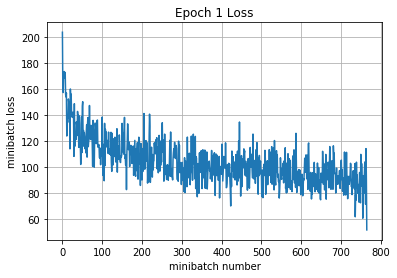

Iteration 800: with minibatch training loss = 1.32 and accuracy of 0.53
Iteration 900: with minibatch training loss = 1.37 and accuracy of 0.44
Iteration 1000: with minibatch training loss = 1.19 and accuracy of 0.61
Iteration 1100: with minibatch training loss = 1.68 and accuracy of 0.48
Iteration 1200: with minibatch training loss = 1.17 and accuracy of 0.58
Iteration 1300: with minibatch training loss = 1.22 and accuracy of 0.64
Iteration 1400: with minibatch training loss = 1.08 and accuracy of 0.66
Iteration 1500: with minibatch training loss = 1.08 and accuracy of 0.62
Epoch 2, Overall loss = 1.28 and accuracy of 0.559


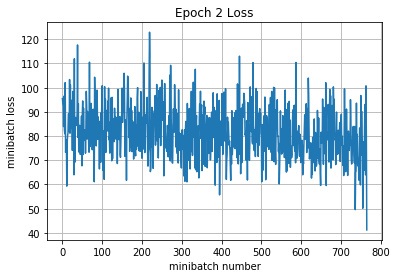

Iteration 1600: with minibatch training loss = 1.5 and accuracy of 0.48
Iteration 1700: with minibatch training loss = 1.36 and accuracy of 0.55
Iteration 1800: with minibatch training loss = 1.25 and accuracy of 0.61
Iteration 1900: with minibatch training loss = 0.964 and accuracy of 0.64
Iteration 2000: with minibatch training loss = 1.16 and accuracy of 0.62
Iteration 2100: with minibatch training loss = 0.975 and accuracy of 0.66
Iteration 2200: with minibatch training loss = 1.33 and accuracy of 0.53
Epoch 3, Overall loss = 1.13 and accuracy of 0.61


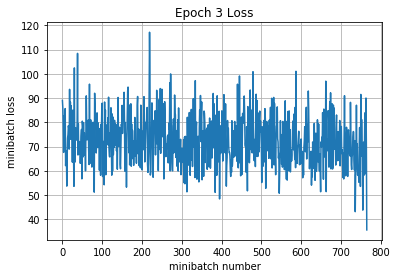

training time (seconds) 364.85383200000797
Validation
Epoch 1, Overall loss = 1.24 and accuracy of 0.586
validation time (seconds) 0.9450718000007328
predict
Epoch 1, Overall loss = 0.179 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.43 and accuracy of 0.094
Iteration 100: with minibatch training loss = 2 and accuracy of 0.27
Iteration 200: with minibatch training loss = 1.96 and accuracy of 0.41
Iteration 300: with minibatch training loss = 1.84 and accuracy of 0.42
Iteration 400: with minibatch training loss = 1.84 and accuracy of 0.38
Iteration 500: with minibatch training loss = 1.39 and accuracy of 0.52
Iteration 600: with minibatch training loss = 1.57 and accuracy of 0.52
Iteration 700: with minibatch training loss = 1.7 and accuracy of 0.42
Epoch 1, Overall loss = 1.78 and accuracy of 0.418


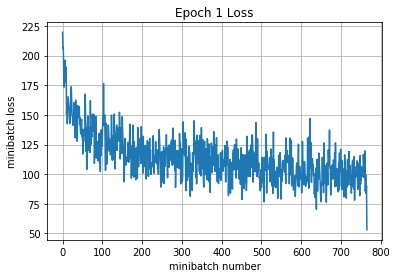

Iteration 800: with minibatch training loss = 1.2 and accuracy of 0.61
Iteration 900: with minibatch training loss = 1.46 and accuracy of 0.53
Iteration 1000: with minibatch training loss = 1.63 and accuracy of 0.42
Iteration 1100: with minibatch training loss = 1.36 and accuracy of 0.52
Iteration 1200: with minibatch training loss = 1.4 and accuracy of 0.45
Iteration 1300: with minibatch training loss = 1.2 and accuracy of 0.56
Iteration 1400: with minibatch training loss = 1.3 and accuracy of 0.58
Iteration 1500: with minibatch training loss = 1.11 and accuracy of 0.62
Epoch 2, Overall loss = 1.39 and accuracy of 0.53


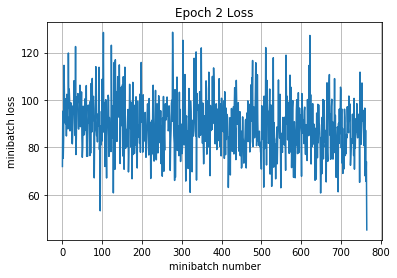

Iteration 1600: with minibatch training loss = 1.14 and accuracy of 0.53
Iteration 1700: with minibatch training loss = 1.24 and accuracy of 0.52
Iteration 1800: with minibatch training loss = 1.33 and accuracy of 0.56
Iteration 1900: with minibatch training loss = 1.56 and accuracy of 0.55
Iteration 2000: with minibatch training loss = 1.17 and accuracy of 0.62
Iteration 2100: with minibatch training loss = 1.31 and accuracy of 0.56
Iteration 2200: with minibatch training loss = 1.19 and accuracy of 0.52
Epoch 3, Overall loss = 1.24 and accuracy of 0.579


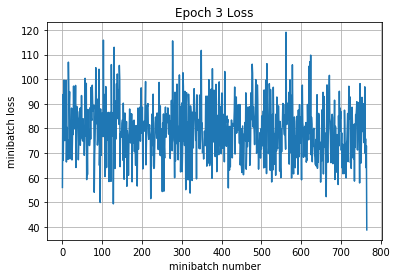

training time (seconds) 339.1118780000106
Validation
Epoch 1, Overall loss = 1.22 and accuracy of 0.592
validation time (seconds) 1.077205599998706
predict
Epoch 1, Overall loss = 0.11 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.52 and accuracy of 0.078
Iteration 100: with minibatch training loss = 2.28 and accuracy of 0.19
Iteration 200: with minibatch training loss = 2.42 and accuracy of 0.34
Iteration 300: with minibatch training loss = 1.98 and accuracy of 0.5
Iteration 400: with minibatch training loss = 1.85 and accuracy of 0.44
Iteration 500: with minibatch training loss = 2.02 and accuracy of 0.42
Iteration 600: with minibatch training loss = 1.86 and accuracy of 0.5
Iteration 700: with minibatch training loss = 1.89 and accuracy of 0.42
Epoch 1, Overall loss = 2.03 and accuracy of 0.38


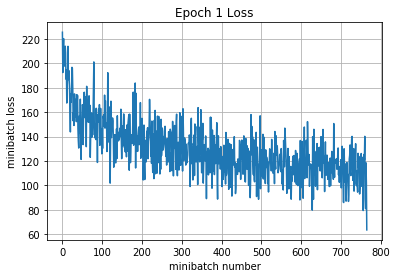

Iteration 800: with minibatch training loss = 1.96 and accuracy of 0.39
Iteration 900: with minibatch training loss = 1.65 and accuracy of 0.47
Iteration 1000: with minibatch training loss = 1.05 and accuracy of 0.69
Iteration 1100: with minibatch training loss = 1.89 and accuracy of 0.47
Iteration 1200: with minibatch training loss = 1.55 and accuracy of 0.55
Iteration 1300: with minibatch training loss = 1.85 and accuracy of 0.45
Iteration 1400: with minibatch training loss = 1.21 and accuracy of 0.61
Iteration 1500: with minibatch training loss = 1.57 and accuracy of 0.45
Epoch 2, Overall loss = 1.61 and accuracy of 0.481


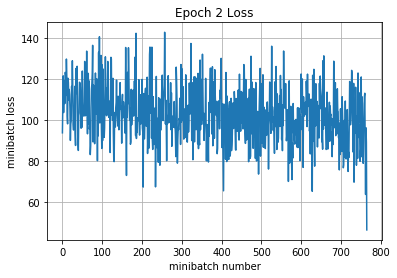

Iteration 1600: with minibatch training loss = 1.68 and accuracy of 0.44
Iteration 1700: with minibatch training loss = 1.3 and accuracy of 0.56
Iteration 1800: with minibatch training loss = 1.39 and accuracy of 0.56
Iteration 1900: with minibatch training loss = 1.55 and accuracy of 0.48
Iteration 2000: with minibatch training loss = 0.991 and accuracy of 0.67
Iteration 2100: with minibatch training loss = 1.31 and accuracy of 0.66
Iteration 2200: with minibatch training loss = 1.2 and accuracy of 0.52
Epoch 3, Overall loss = 1.44 and accuracy of 0.525


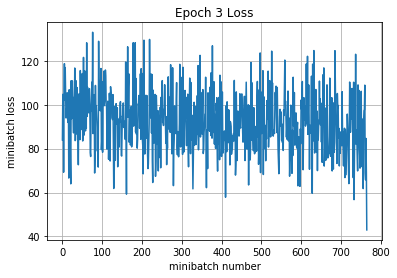

training time (seconds) 321.7798523000092
Validation
Epoch 1, Overall loss = 1.3 and accuracy of 0.562
validation time (seconds) 0.7462287999951513
predict
Epoch 1, Overall loss = 0.0562 and accuracy of 1


In [104]:
def simple_model_2(X, y, is_training, dropout=None, **kwars):
    """
    define our graph (e.g. two_layer_convnet)
    """
    # CNN -> rule
    out = X

    out, [W1, b1] = cnn(idx=1, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')

    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
   
    out, _ = affine(1, out, output_size=10)
    return out, [W1]

local_models = []
local_models.append(estimate_model({
    'name': 'without dropout',
    'scheme': ['CNN', 'relu', 'FC'],
    'learning_rate': 1e-4,
    'model_builder': simple_model_2,
    'num_of_epochs': 3,
}, X_train, y_train, X_val, y_val))

local_models.append(estimate_model({
    'name': 'Dropout 0.2',
    'scheme': ['CNN', 'relu', 'FC'],
    'learning_rate': 1e-4,
    'model_builder': simple_model_2,
    'dropout': 0.2,
    'num_of_epochs': 3,
}, X_train, y_train, X_val, y_val))

local_models.append(estimate_model({
    'name': 'Dropout 0.4',
    'scheme': ['CNN', 'relu', 'FC'],
    'learning_rate': 1e-4,
    'model_builder': simple_model_2,
    'dropout': 0.4,
    'num_of_epochs': 3,
}, X_train, y_train, X_val, y_val))

Model without dropout


Model Dropout 0.2


Model Dropout 0.3


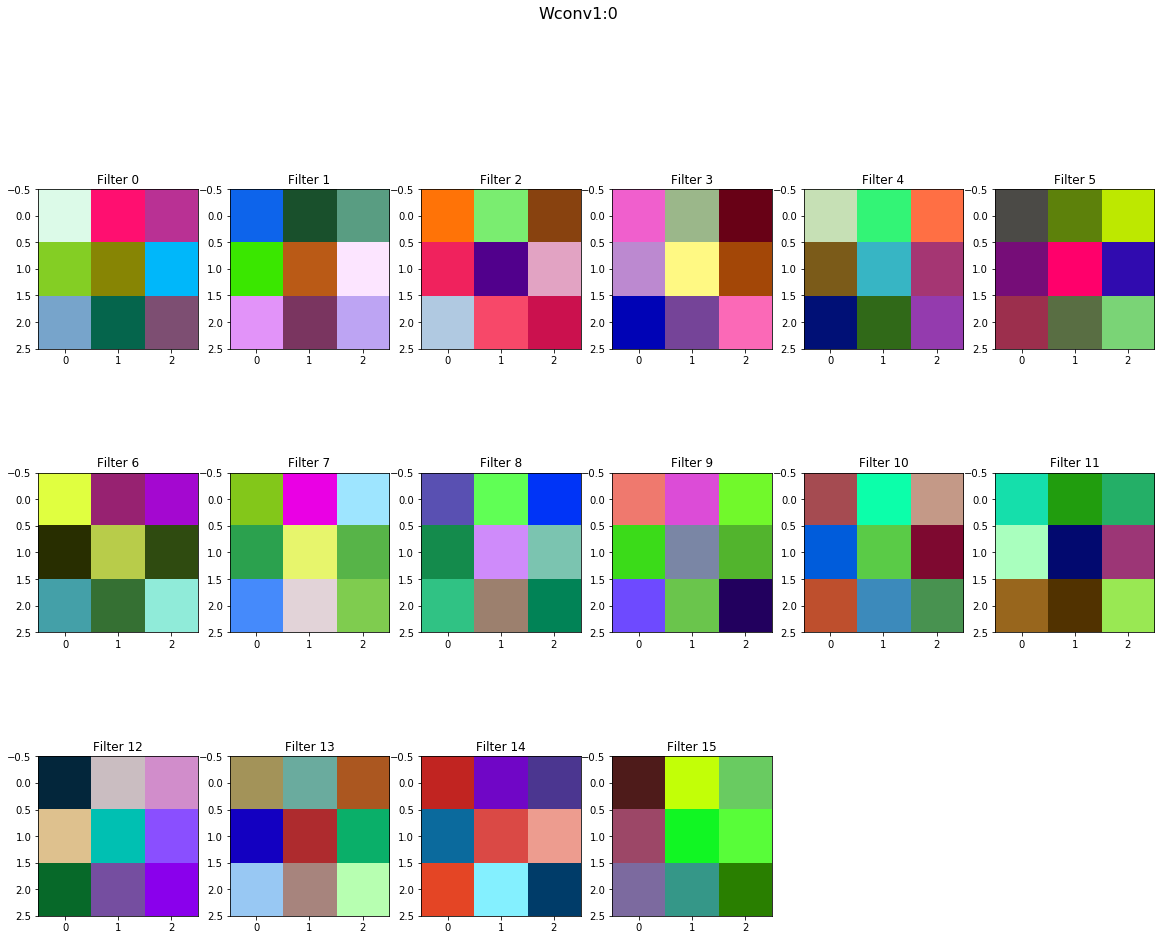

In [113]:
draw_layers_of_models(local_models)

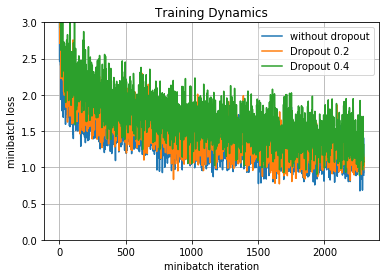

model: without dropout


predict  training validation
total_correct       NaN  0.609898      0.586
total_lost          NaN   1.13403    1.23728
time           0.070301   364.854   0.945072

model: Dropout 0.2


predict  training validation
total_correct       NaN  0.579082      0.592
total_lost          NaN   1.23939    1.22419
time           0.084295   339.112    1.07721

model: Dropout 0.4


predict training validation
total_correct       NaN  0.52451      0.562
total_lost          NaN  1.44096    1.29825
time           0.063476   321.78   0.746229

In [108]:
show_graphs(local_models, ymax=3)
show_tables(local_models)

Training
Iteration 0: with minibatch training loss = 3.14 and accuracy of 0.078
Iteration 100: with minibatch training loss = 1.73 and accuracy of 0.47
Iteration 200: with minibatch training loss = 1.57 and accuracy of 0.41
Iteration 300: with minibatch training loss = 1.82 and accuracy of 0.39
Iteration 400: with minibatch training loss = 1.79 and accuracy of 0.36
Iteration 500: with minibatch training loss = 1.31 and accuracy of 0.56
Iteration 600: with minibatch training loss = 1.57 and accuracy of 0.48
Iteration 700: with minibatch training loss = 1.34 and accuracy of 0.52
Epoch 1, Overall loss = 1.71 and accuracy of 0.415


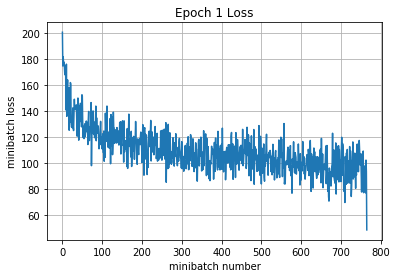

Iteration 800: with minibatch training loss = 1.64 and accuracy of 0.42
Iteration 900: with minibatch training loss = 1.68 and accuracy of 0.5
Iteration 1000: with minibatch training loss = 1.51 and accuracy of 0.39
Iteration 1100: with minibatch training loss = 1.14 and accuracy of 0.62
Iteration 1200: with minibatch training loss = 1.38 and accuracy of 0.52
Iteration 1300: with minibatch training loss = 1.2 and accuracy of 0.64
Iteration 1400: with minibatch training loss = 1.44 and accuracy of 0.47
Iteration 1500: with minibatch training loss = 1.24 and accuracy of 0.56
Epoch 2, Overall loss = 1.37 and accuracy of 0.522


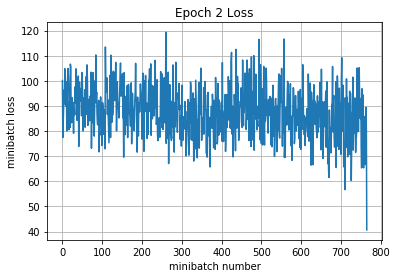

Iteration 1600: with minibatch training loss = 1.15 and accuracy of 0.62
Iteration 1700: with minibatch training loss = 1.26 and accuracy of 0.53
Iteration 1800: with minibatch training loss = 1.37 and accuracy of 0.47
Iteration 1900: with minibatch training loss = 1.12 and accuracy of 0.53
Iteration 2000: with minibatch training loss = 1.47 and accuracy of 0.52
Iteration 2100: with minibatch training loss = 1.32 and accuracy of 0.52
Iteration 2200: with minibatch training loss = 1.1 and accuracy of 0.62
Epoch 3, Overall loss = 1.25 and accuracy of 0.567


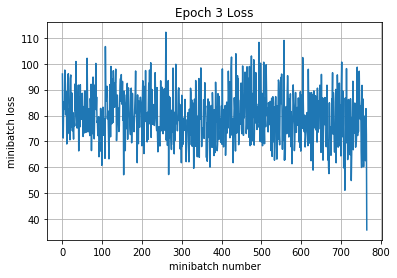

training time (seconds) 203.1102755000029
Validation
Epoch 1, Overall loss = 1.3 and accuracy of 0.54
validation time (seconds) 0.6318706999882124
predict
Epoch 1, Overall loss = 0.216 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.73 and accuracy of 0.016
Iteration 100: with minibatch training loss = 2.06 and accuracy of 0.3
Iteration 200: with minibatch training loss = 2.1 and accuracy of 0.39
Iteration 300: with minibatch training loss = 1.73 and accuracy of 0.52
Iteration 400: with minibatch training loss = 1.7 and accuracy of 0.38
Iteration 500: with minibatch training loss = 1.72 and accuracy of 0.44
Iteration 600: with minibatch training loss = 2.33 and accuracy of 0.31
Iteration 700: with minibatch training loss = 1.64 and accuracy of 0.45
Epoch 1, Overall loss = 1.9 and accuracy of 0.375


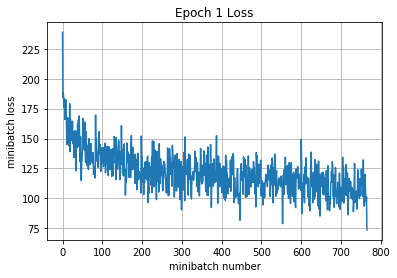

Iteration 800: with minibatch training loss = 1.35 and accuracy of 0.53
Iteration 900: with minibatch training loss = 1.47 and accuracy of 0.55
Iteration 1000: with minibatch training loss = 1.31 and accuracy of 0.61
Iteration 1100: with minibatch training loss = 1.8 and accuracy of 0.44
Iteration 1200: with minibatch training loss = 1.38 and accuracy of 0.45
Iteration 1300: with minibatch training loss = 1.8 and accuracy of 0.42
Iteration 1400: with minibatch training loss = 1.8 and accuracy of 0.42
Iteration 1500: with minibatch training loss = 1.59 and accuracy of 0.52
Epoch 2, Overall loss = 1.52 and accuracy of 0.481


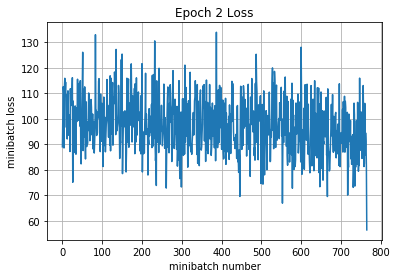

Iteration 1600: with minibatch training loss = 1.27 and accuracy of 0.55
Iteration 1700: with minibatch training loss = 1.5 and accuracy of 0.47
Iteration 1800: with minibatch training loss = 1.26 and accuracy of 0.52
Iteration 1900: with minibatch training loss = 1.33 and accuracy of 0.61
Iteration 2000: with minibatch training loss = 1.34 and accuracy of 0.48
Iteration 2100: with minibatch training loss = 1.11 and accuracy of 0.61
Iteration 2200: with minibatch training loss = 1.36 and accuracy of 0.45
Epoch 3, Overall loss = 1.36 and accuracy of 0.531


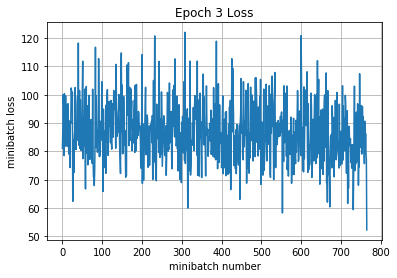

training time (seconds) 192.87286920000042
Validation
Epoch 1, Overall loss = 1.32 and accuracy of 0.557
validation time (seconds) 0.43055470001127105
predict
Epoch 1, Overall loss = 0.213 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.2 and accuracy of 0.094
Iteration 100: with minibatch training loss = 1.85 and accuracy of 0.38
Iteration 200: with minibatch training loss = 2.34 and accuracy of 0.27
Iteration 300: with minibatch training loss = 2.03 and accuracy of 0.25
Iteration 400: with minibatch training loss = 1.69 and accuracy of 0.47
Iteration 500: with minibatch training loss = 1.99 and accuracy of 0.52
Iteration 600: with minibatch training loss = 1.76 and accuracy of 0.41
Iteration 700: with minibatch training loss = 1.82 and accuracy of 0.34
Epoch 1, Overall loss = 2.03 and accuracy of 0.35


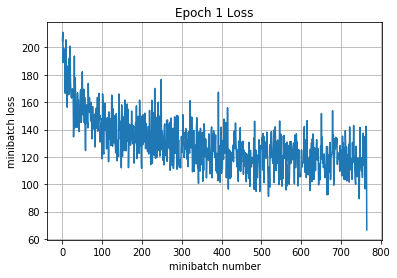

Iteration 800: with minibatch training loss = 1.79 and accuracy of 0.39
Iteration 900: with minibatch training loss = 1.63 and accuracy of 0.38
Iteration 1000: with minibatch training loss = 1.57 and accuracy of 0.38
Iteration 1100: with minibatch training loss = 1.48 and accuracy of 0.47
Iteration 1200: with minibatch training loss = 1.64 and accuracy of 0.41
Iteration 1300: with minibatch training loss = 1.51 and accuracy of 0.45
Iteration 1400: with minibatch training loss = 1.83 and accuracy of 0.47
Iteration 1500: with minibatch training loss = 1.56 and accuracy of 0.55
Epoch 2, Overall loss = 1.67 and accuracy of 0.441


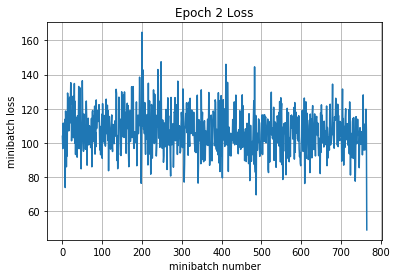

Iteration 1600: with minibatch training loss = 1.45 and accuracy of 0.52
Iteration 1700: with minibatch training loss = 1.78 and accuracy of 0.45
Iteration 1800: with minibatch training loss = 1.24 and accuracy of 0.56
Iteration 1900: with minibatch training loss = 1.65 and accuracy of 0.47
Iteration 2000: with minibatch training loss = 1.43 and accuracy of 0.53
Iteration 2100: with minibatch training loss = 1.47 and accuracy of 0.5
Iteration 2200: with minibatch training loss = 1.32 and accuracy of 0.48
Epoch 3, Overall loss = 1.52 and accuracy of 0.483


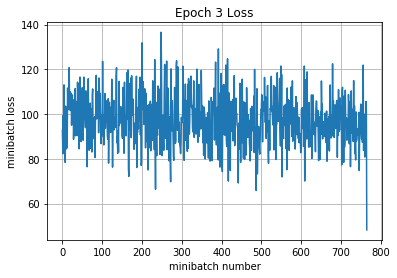

training time (seconds) 181.7252531999984
Validation
Epoch 1, Overall loss = 1.41 and accuracy of 0.526
validation time (seconds) 0.44304149999516085
predict
Epoch 1, Overall loss = 0.379 and accuracy of 1


In [110]:
def simple_model_3(X, y, is_training, dropout=None, **kwars):
    """
    define our graph (e.g. two_layer_convnet)
    """
    # CNN -> rule
    out = X

    out, [W1, b1] = cnn(idx=1, X=out, filters=16, kernel_size=(3,3), is_training=is_training, padding='VALID')

    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
   
    out, _ = affine(1, out, output_size=10)
    return out, [W1]

local_models = []
local_models.append(estimate_model({
    'name': 'without dropout',
    'learning_rate': 1e-4,
    'model_builder': simple_model_3,
    'num_of_epochs': 3,
}, X_train, y_train, X_val, y_val))

local_models.append(estimate_model({
    'name': 'Dropout 0.2',
    'learning_rate': 1e-4,
    'model_builder': simple_model_3,
    'dropout': 0.2,
    'num_of_epochs': 3,
}, X_train, y_train, X_val, y_val))

local_models.append(estimate_model({
    'name': 'Dropout 0.3',
    'learning_rate': 1e-4,
    'model_builder': simple_model_3,
    'dropout': 0.3,
    'num_of_epochs': 3,
}, X_train, y_train, X_val, y_val))


Model without dropout


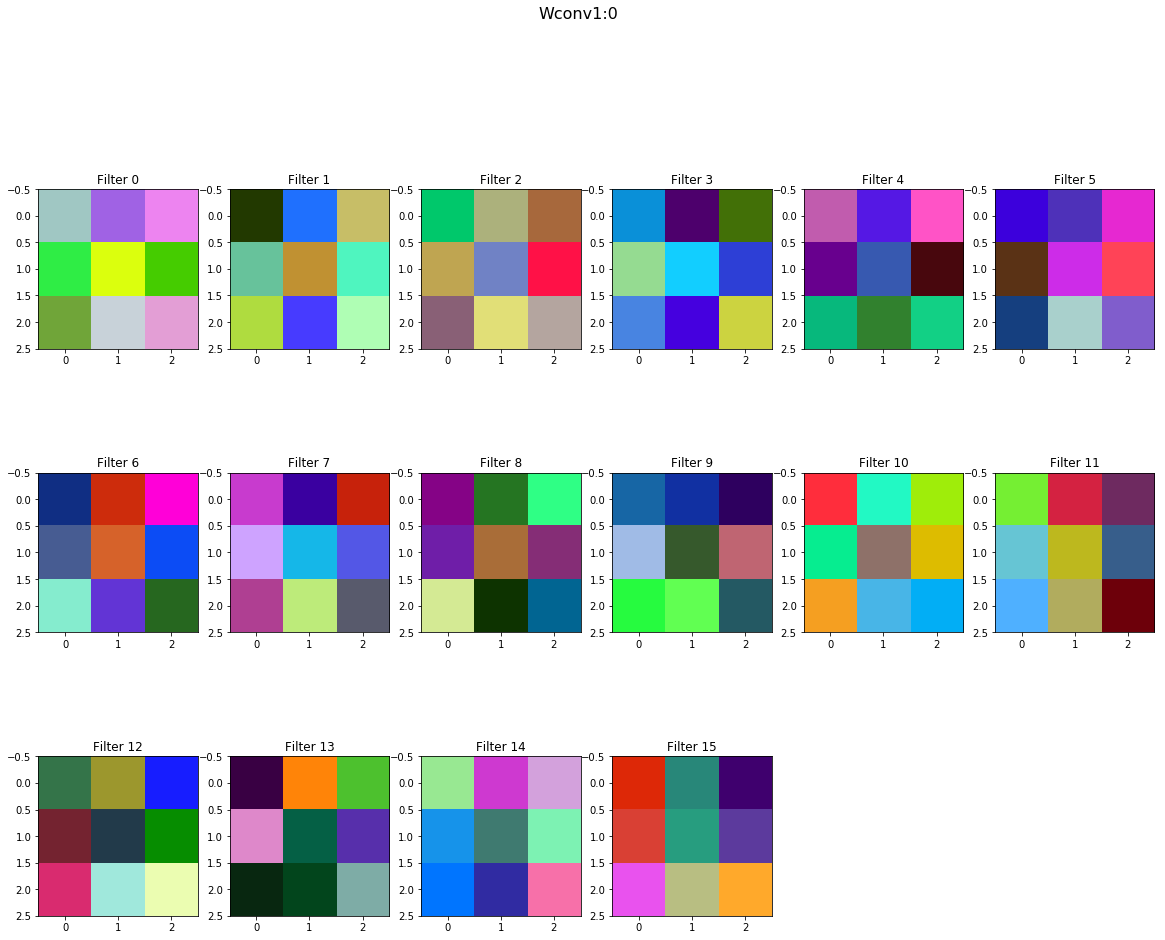

Model Dropout 0.2


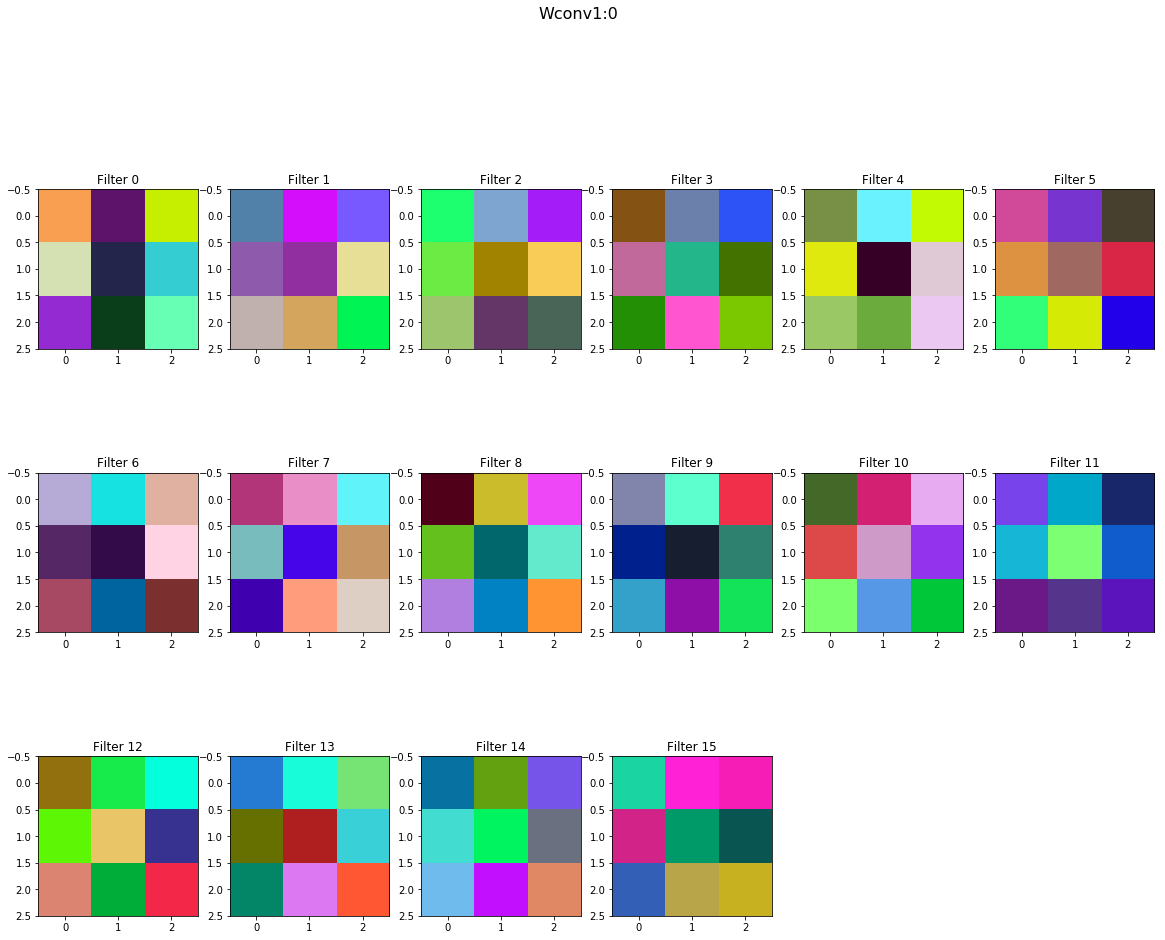

Model Dropout 0.3


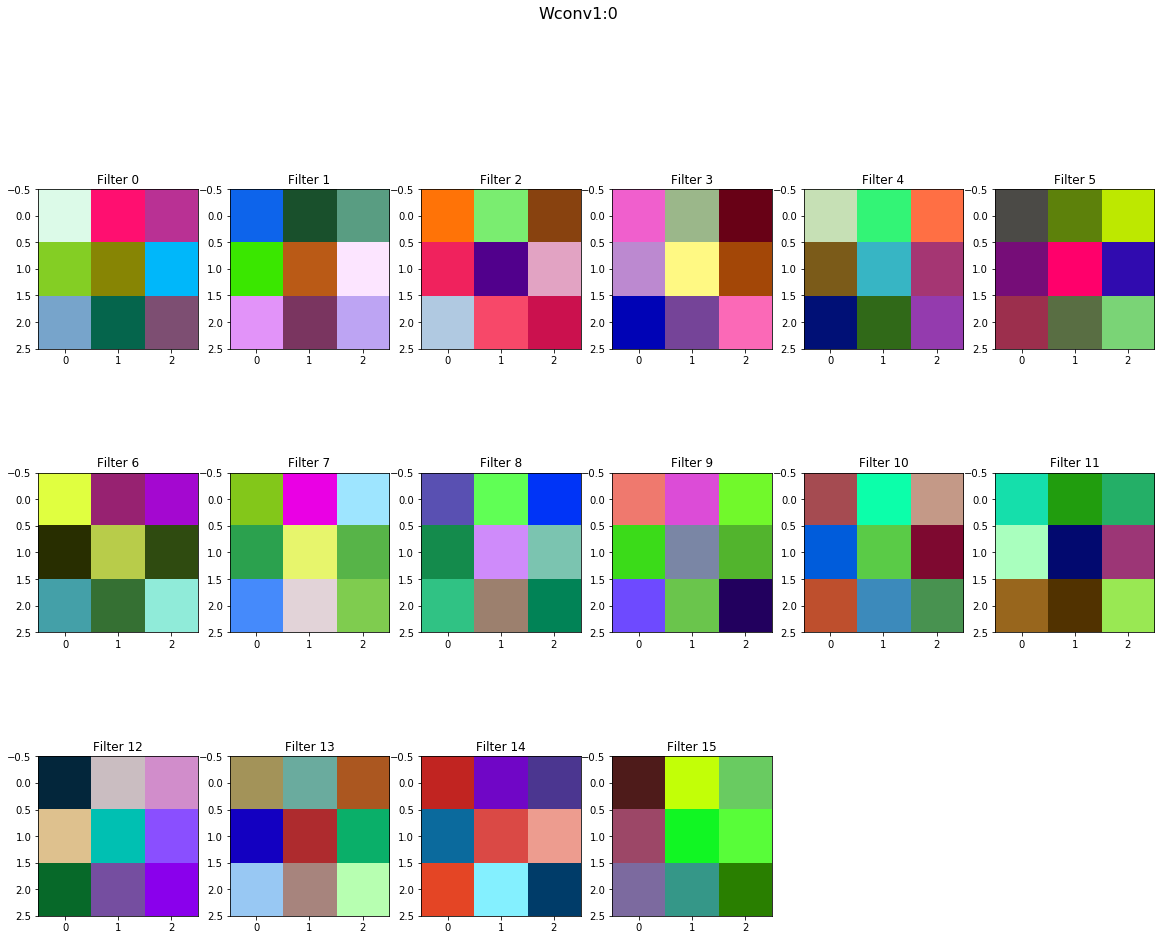

In [111]:
draw_layers_of_models(local_models)

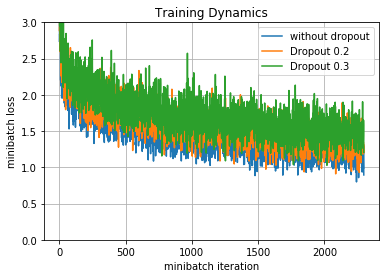

model: without dropout


num_of_trainable  predict  training validation
time                     144490  0.06329    203.11   0.631871
total_correct            144490      NaN  0.566898       0.54
total_lost               144490      NaN   1.24931    1.30498

model: Dropout 0.2


num_of_trainable   predict  training validation
time                     144490  0.062318   192.873   0.430555
total_correct            144490       NaN  0.531245      0.557
total_lost               144490       NaN   1.35755    1.32436

model: Dropout 0.3


num_of_trainable   predict  training validation
time                     144490  0.058782   181.725   0.443041
total_correct            144490       NaN  0.482531      0.526
total_lost               144490       NaN   1.52245    1.41436

In [118]:
show_graphs(local_models, ymax=3)
show_tables(local_models)

Training
Iteration 0: with minibatch training loss = 3.48 and accuracy of 0.031
Iteration 100: with minibatch training loss = 1.58 and accuracy of 0.52
Iteration 200: with minibatch training loss = 1.56 and accuracy of 0.44
Iteration 300: with minibatch training loss = 1.71 and accuracy of 0.41
Iteration 400: with minibatch training loss = 1.3 and accuracy of 0.48
Iteration 500: with minibatch training loss = 1.33 and accuracy of 0.55
Iteration 600: with minibatch training loss = 1.1 and accuracy of 0.56
Iteration 700: with minibatch training loss = 1.19 and accuracy of 0.59
Epoch 1, Overall loss = 1.5 and accuracy of 0.493


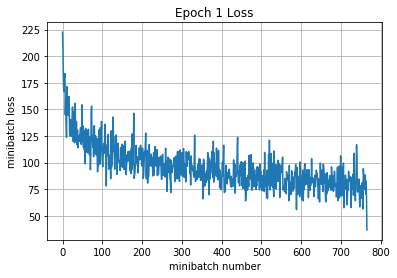

Iteration 800: with minibatch training loss = 0.999 and accuracy of 0.64
Iteration 900: with minibatch training loss = 1.11 and accuracy of 0.59
Iteration 1000: with minibatch training loss = 1 and accuracy of 0.66
Iteration 1100: with minibatch training loss = 0.799 and accuracy of 0.78
Iteration 1200: with minibatch training loss = 0.788 and accuracy of 0.72
Iteration 1300: with minibatch training loss = 0.954 and accuracy of 0.64
Iteration 1400: with minibatch training loss = 0.999 and accuracy of 0.7
Iteration 1500: with minibatch training loss = 0.848 and accuracy of 0.7
Epoch 2, Overall loss = 0.923 and accuracy of 0.682


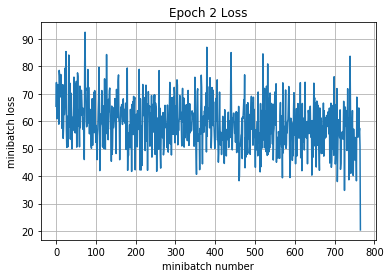

Iteration 1600: with minibatch training loss = 0.657 and accuracy of 0.77
Iteration 1700: with minibatch training loss = 0.701 and accuracy of 0.78
Iteration 1800: with minibatch training loss = 0.574 and accuracy of 0.84
Iteration 1900: with minibatch training loss = 0.471 and accuracy of 0.86
Iteration 2000: with minibatch training loss = 0.476 and accuracy of 0.84
Iteration 2100: with minibatch training loss = 0.532 and accuracy of 0.84
Iteration 2200: with minibatch training loss = 0.65 and accuracy of 0.81
Epoch 3, Overall loss = 0.59 and accuracy of 0.813


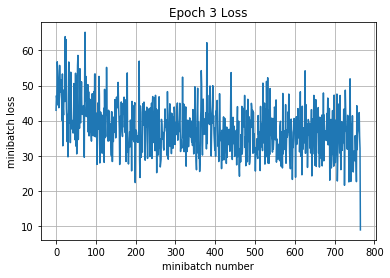

Iteration 2300: with minibatch training loss = 0.455 and accuracy of 0.91
Iteration 2400: with minibatch training loss = 0.444 and accuracy of 0.89
Iteration 2500: with minibatch training loss = 0.311 and accuracy of 0.92
Iteration 2600: with minibatch training loss = 0.341 and accuracy of 0.89
Iteration 2700: with minibatch training loss = 0.353 and accuracy of 0.94
Iteration 2800: with minibatch training loss = 0.207 and accuracy of 0.97
Iteration 2900: with minibatch training loss = 0.156 and accuracy of 1
Iteration 3000: with minibatch training loss = 0.245 and accuracy of 0.94
Epoch 4, Overall loss = 0.325 and accuracy of 0.919


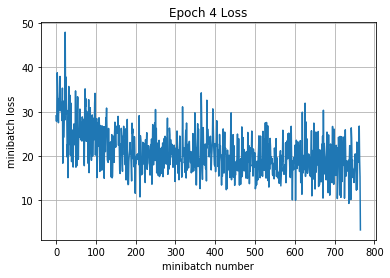

Iteration 3100: with minibatch training loss = 0.178 and accuracy of 0.95
Iteration 3200: with minibatch training loss = 0.163 and accuracy of 0.97
Iteration 3300: with minibatch training loss = 0.133 and accuracy of 0.98
Iteration 3400: with minibatch training loss = 0.134 and accuracy of 0.98
Iteration 3500: with minibatch training loss = 0.103 and accuracy of 1
Iteration 3600: with minibatch training loss = 0.173 and accuracy of 0.97
Iteration 3700: with minibatch training loss = 0.131 and accuracy of 0.97
Iteration 3800: with minibatch training loss = 0.0579 and accuracy of 1
Epoch 5, Overall loss = 0.158 and accuracy of 0.975


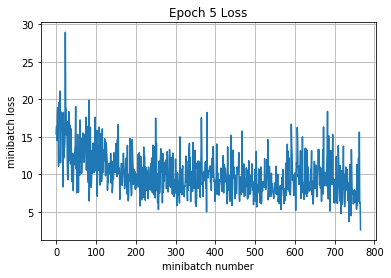

training time (seconds) 2280.596955899993
Validation
Epoch 1, Overall loss = 1.3 and accuracy of 0.621
validation time (seconds) 2.8864893999998458
predict
Epoch 1, Overall loss = 0.0527 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.17 and accuracy of 0.12
Iteration 100: with minibatch training loss = 2.07 and accuracy of 0.33
Iteration 200: with minibatch training loss = 1.75 and accuracy of 0.39
Iteration 300: with minibatch training loss = 1.4 and accuracy of 0.52
Iteration 400: with minibatch training loss = 1.5 and accuracy of 0.55
Iteration 500: with minibatch training loss = 1.75 and accuracy of 0.47
Iteration 600: with minibatch training loss = 1.37 and accuracy of 0.56
Iteration 700: with minibatch training loss = 1.45 and accuracy of 0.48
Epoch 1, Overall loss = 1.64 and accuracy of 0.454


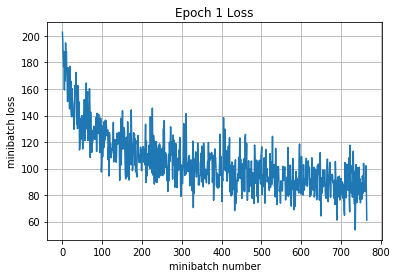

Iteration 800: with minibatch training loss = 1.49 and accuracy of 0.48
Iteration 900: with minibatch training loss = 1.29 and accuracy of 0.55
Iteration 1000: with minibatch training loss = 1.19 and accuracy of 0.55
Iteration 1100: with minibatch training loss = 0.932 and accuracy of 0.73
Iteration 1200: with minibatch training loss = 1.26 and accuracy of 0.62
Iteration 1300: with minibatch training loss = 1.22 and accuracy of 0.55
Iteration 1400: with minibatch training loss = 0.961 and accuracy of 0.69
Iteration 1500: with minibatch training loss = 1.07 and accuracy of 0.58
Epoch 2, Overall loss = 1.14 and accuracy of 0.604


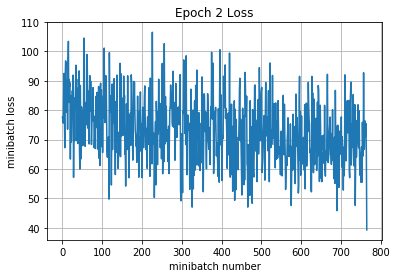

Iteration 1600: with minibatch training loss = 1.11 and accuracy of 0.66
Iteration 1700: with minibatch training loss = 0.637 and accuracy of 0.78
Iteration 1800: with minibatch training loss = 0.777 and accuracy of 0.77
Iteration 1900: with minibatch training loss = 0.812 and accuracy of 0.69
Iteration 2000: with minibatch training loss = 0.835 and accuracy of 0.7
Iteration 2100: with minibatch training loss = 0.822 and accuracy of 0.64
Iteration 2200: with minibatch training loss = 0.769 and accuracy of 0.66
Epoch 3, Overall loss = 0.924 and accuracy of 0.679


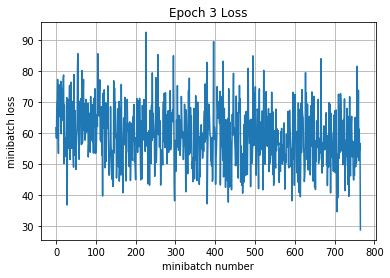

Iteration 2300: with minibatch training loss = 0.855 and accuracy of 0.78
Iteration 2400: with minibatch training loss = 0.785 and accuracy of 0.69
Iteration 2500: with minibatch training loss = 0.739 and accuracy of 0.69
Iteration 2600: with minibatch training loss = 0.504 and accuracy of 0.83
Iteration 2700: with minibatch training loss = 0.778 and accuracy of 0.73
Iteration 2800: with minibatch training loss = 0.648 and accuracy of 0.73
Iteration 2900: with minibatch training loss = 0.709 and accuracy of 0.8
Iteration 3000: with minibatch training loss = 0.653 and accuracy of 0.75
Epoch 4, Overall loss = 0.759 and accuracy of 0.733


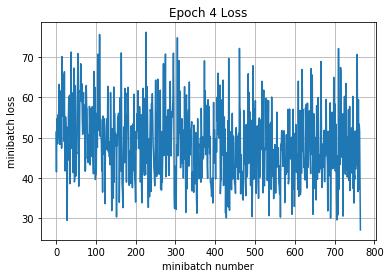

Iteration 3100: with minibatch training loss = 0.805 and accuracy of 0.78
Iteration 3200: with minibatch training loss = 0.584 and accuracy of 0.78
Iteration 3300: with minibatch training loss = 0.732 and accuracy of 0.72
Iteration 3400: with minibatch training loss = 0.569 and accuracy of 0.72
Iteration 3500: with minibatch training loss = 0.487 and accuracy of 0.84
Iteration 3600: with minibatch training loss = 0.604 and accuracy of 0.75
Iteration 3700: with minibatch training loss = 0.684 and accuracy of 0.75
Iteration 3800: with minibatch training loss = 0.365 and accuracy of 0.89
Epoch 5, Overall loss = 0.622 and accuracy of 0.785


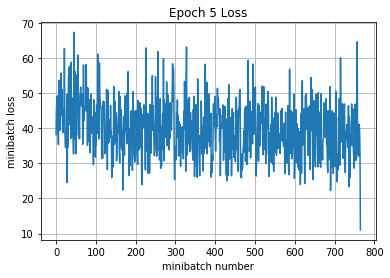

training time (seconds) 2330.585120500007
Validation
Epoch 1, Overall loss = 0.939 and accuracy of 0.693
validation time (seconds) 2.4852830000018002
predict
Epoch 1, Overall loss = 0.00102 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.26 and accuracy of 0.12
Iteration 100: with minibatch training loss = 2.29 and accuracy of 0.31
Iteration 200: with minibatch training loss = 2.3 and accuracy of 0.33
Iteration 300: with minibatch training loss = 1.53 and accuracy of 0.44
Iteration 400: with minibatch training loss = 1.82 and accuracy of 0.42
Iteration 500: with minibatch training loss = 1.46 and accuracy of 0.5
Iteration 600: with minibatch training loss = 1.2 and accuracy of 0.55
Iteration 700: with minibatch training loss = 1.45 and accuracy of 0.48
Epoch 1, Overall loss = 1.79 and accuracy of 0.422


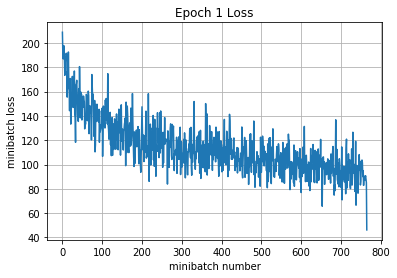

Iteration 800: with minibatch training loss = 1.39 and accuracy of 0.52
Iteration 900: with minibatch training loss = 1.4 and accuracy of 0.53
Iteration 1000: with minibatch training loss = 1.27 and accuracy of 0.58
Iteration 1100: with minibatch training loss = 1.16 and accuracy of 0.66
Iteration 1200: with minibatch training loss = 1.39 and accuracy of 0.53
Iteration 1300: with minibatch training loss = 1.21 and accuracy of 0.55
Iteration 1400: with minibatch training loss = 1.06 and accuracy of 0.61
Iteration 1500: with minibatch training loss = 1.13 and accuracy of 0.62
Epoch 2, Overall loss = 1.28 and accuracy of 0.56


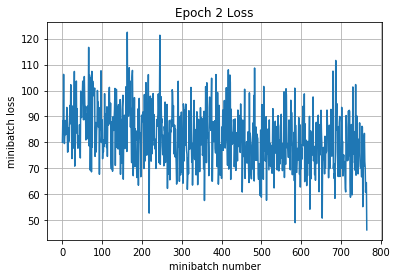

Iteration 1600: with minibatch training loss = 1.65 and accuracy of 0.55
Iteration 1700: with minibatch training loss = 1.13 and accuracy of 0.62
Iteration 1800: with minibatch training loss = 1.05 and accuracy of 0.67
Iteration 1900: with minibatch training loss = 0.96 and accuracy of 0.64
Iteration 2000: with minibatch training loss = 0.714 and accuracy of 0.77
Iteration 2100: with minibatch training loss = 1.23 and accuracy of 0.61
Iteration 2200: with minibatch training loss = 1.09 and accuracy of 0.62
Epoch 3, Overall loss = 1.07 and accuracy of 0.625


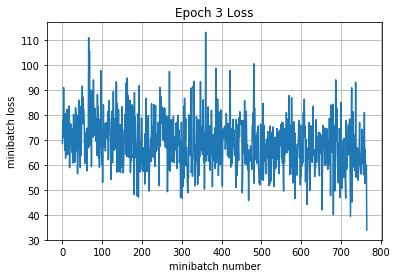

Iteration 2300: with minibatch training loss = 0.823 and accuracy of 0.69
Iteration 2400: with minibatch training loss = 0.827 and accuracy of 0.73
Iteration 2500: with minibatch training loss = 1.03 and accuracy of 0.69
Iteration 2600: with minibatch training loss = 0.857 and accuracy of 0.73
Iteration 2700: with minibatch training loss = 0.763 and accuracy of 0.64
Iteration 2800: with minibatch training loss = 0.993 and accuracy of 0.64
Iteration 2900: with minibatch training loss = 0.784 and accuracy of 0.72
Iteration 3000: with minibatch training loss = 1.03 and accuracy of 0.66
Epoch 4, Overall loss = 0.933 and accuracy of 0.674


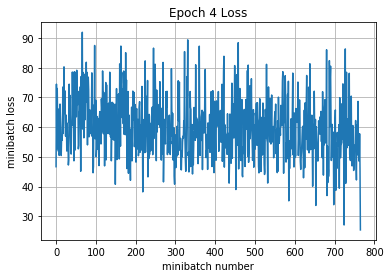

Iteration 3100: with minibatch training loss = 0.731 and accuracy of 0.78
Iteration 3200: with minibatch training loss = 0.968 and accuracy of 0.72
Iteration 3300: with minibatch training loss = 1.01 and accuracy of 0.66
Iteration 3400: with minibatch training loss = 0.853 and accuracy of 0.72
Iteration 3500: with minibatch training loss = 0.635 and accuracy of 0.78
Iteration 3600: with minibatch training loss = 0.722 and accuracy of 0.77
Iteration 3700: with minibatch training loss = 0.852 and accuracy of 0.72
Iteration 3800: with minibatch training loss = 0.791 and accuracy of 0.72
Epoch 5, Overall loss = 0.821 and accuracy of 0.711


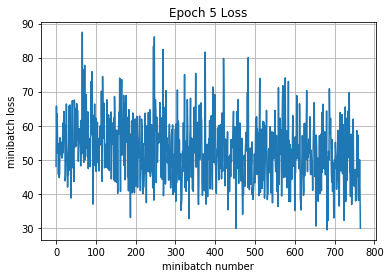

training time (seconds) 2299.9321349000093
Validation
Epoch 1, Overall loss = 0.932 and accuracy of 0.676
validation time (seconds) 2.7870932999940123
predict
Epoch 1, Overall loss = 0.00479 and accuracy of 1


In [128]:
def cnn_model_5x5x32_5x5x64_7x7x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding(X, y, is_training, 
                                                                               dropout=None,
                                                                               **kwargs):
    out = X

    #32
    out, [W1, b1] = cnn(idx=1, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #28
    if dropout is not None:
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=2, X=out, filters=64, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #24
    out = tf.nn.max_pool(out, ksize=(1,2,2,1), strides=(1,2,2,1), padding='SAME')
    #12
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=3, X=out, filters=128, kernel_size=(7,7), is_training=is_training, padding='VALID')
    #6
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)

    # Affine layer from 6x6x128 = 4,608 to 1024 outputs
    out, _ = affine(1, out, output_size=1024)

    # ReLU Activation Layer
    out = tf.nn.relu(out)

    out = tf.layers.batch_normalization(out, training=is_training)
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    # 5)
    # Affine layer from 1024 input units to 10 outputs
    out, _ = affine(2, out, output_size=10)
    return out, [W1]

local_models_3_cnn = []

local_models_3_cnn.append(estimate_model({
    'name': 'dropout: none',
    'model_builder': cnn_model_5x5x32_5x5x64_7x7x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 5,
}, X_train, y_train, X_val, y_val))

local_models_3_cnn.append(estimate_model({
    'name': 'dropout: 0.1',
    'dropout': 0.1,
    'model_builder': cnn_model_5x5x32_5x5x64_7x7x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 5,
}, X_train, y_train, X_val, y_val))

local_models_3_cnn.append(estimate_model({
    'name': 'dropout: 0.2',
    'dropout': 0.2,
    'model_builder': cnn_model_5x5x32_5x5x64_7x7x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 5,
}, X_train, y_train, X_val, y_val))


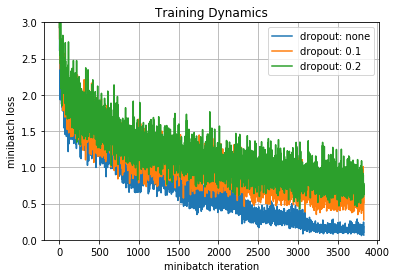

model: dropout: none


num_of_trainable   predict  training validation
time                    5187594  0.118469    2280.6    2.88649
total_correct           5187594       NaN  0.974898      0.621
total_lost              5187594       NaN  0.158285    1.30476

model: dropout: 0.1


num_of_trainable   predict  training validation
time                    5187594  0.143435   2330.59    2.48528
total_correct           5187594       NaN  0.784653      0.693
total_lost              5187594       NaN  0.621732   0.938613

model: dropout: 0.2


num_of_trainable   predict  training validation
time                    5187594  0.133182   2299.93    2.78709
total_correct           5187594       NaN  0.711122      0.676
total_lost              5187594       NaN  0.821184   0.932127

Model dropout: none


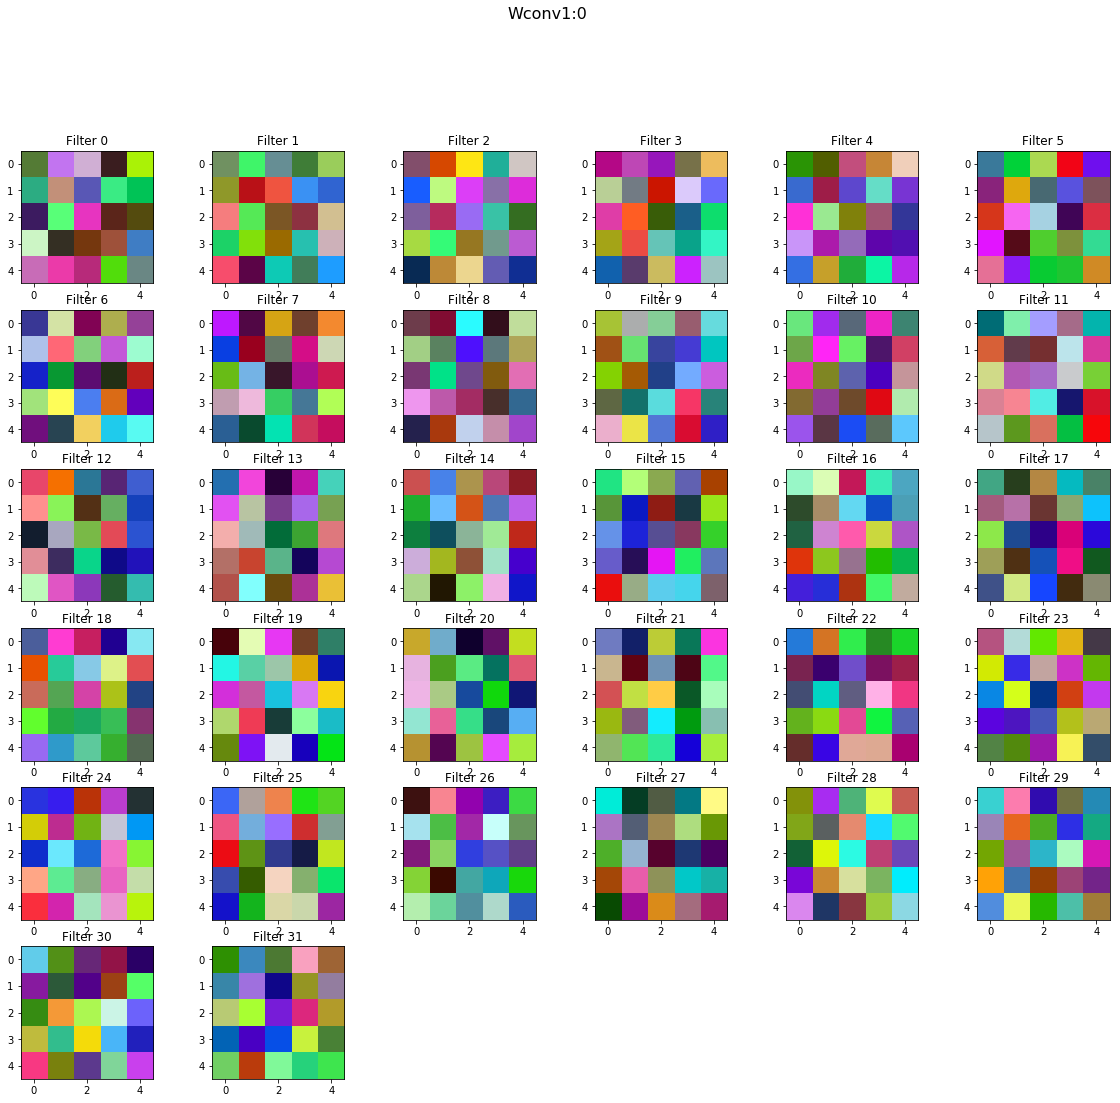

Model dropout: 0.1


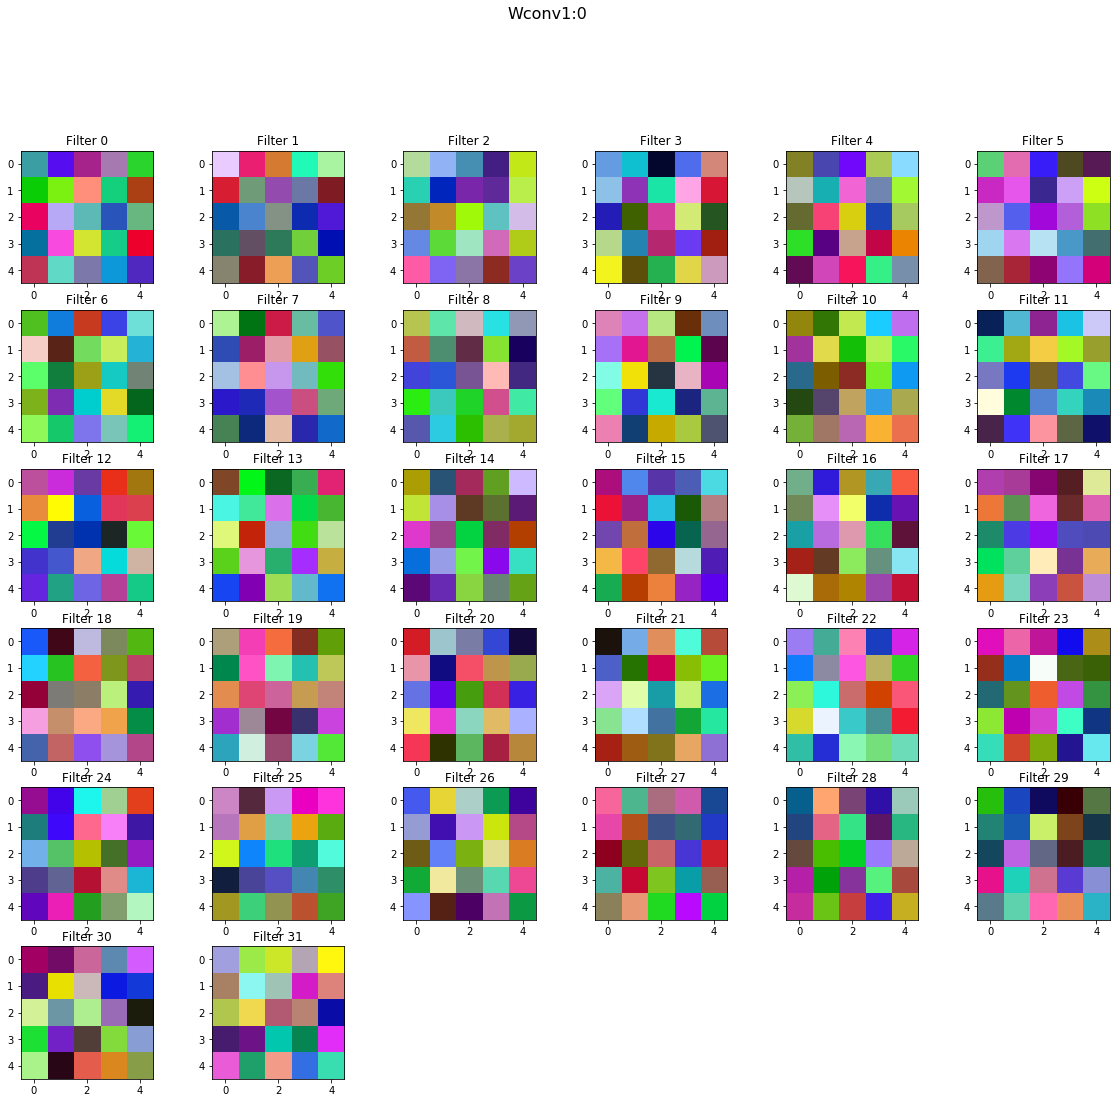

Model dropout: 0.2


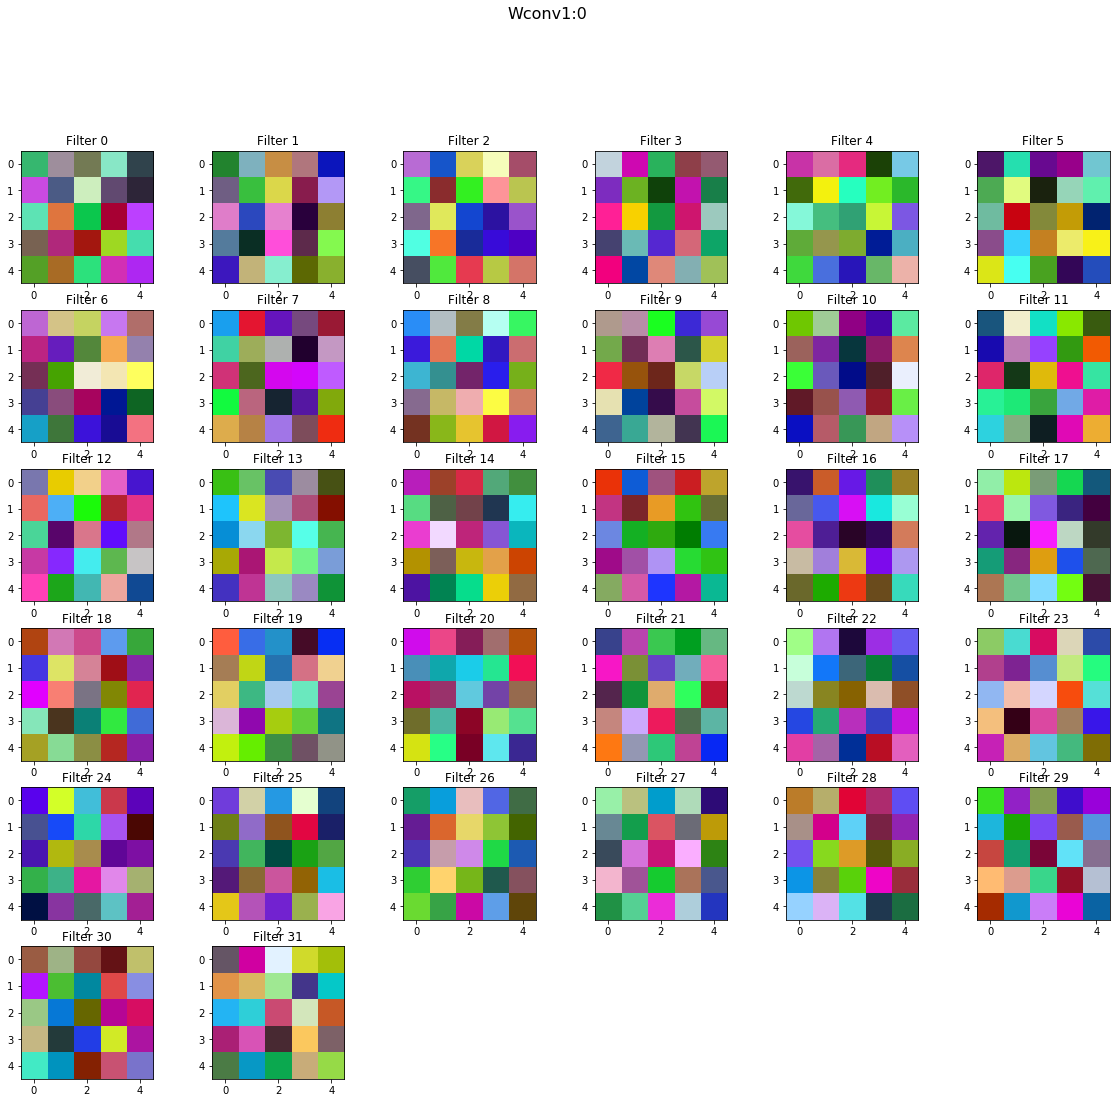

In [129]:
show_graphs(local_models_3_cnn, ymax=3)
show_tables(local_models_3_cnn)
draw_layers_of_models(local_models_3_cnn)

Training
Iteration 0: with minibatch training loss = 3.17 and accuracy of 0.12
Iteration 100: with minibatch training loss = 1.89 and accuracy of 0.36
Iteration 200: with minibatch training loss = 1.64 and accuracy of 0.38
Iteration 300: with minibatch training loss = 1.61 and accuracy of 0.44
Iteration 400: with minibatch training loss = 1.42 and accuracy of 0.48
Iteration 500: with minibatch training loss = 1.41 and accuracy of 0.48
Iteration 600: with minibatch training loss = 1.54 and accuracy of 0.47
Iteration 700: with minibatch training loss = 1.2 and accuracy of 0.58
Epoch 1, Overall loss = 1.67 and accuracy of 0.433


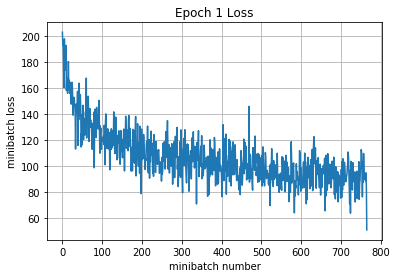

Iteration 800: with minibatch training loss = 1.39 and accuracy of 0.44
Iteration 900: with minibatch training loss = 1.3 and accuracy of 0.55
Iteration 1000: with minibatch training loss = 0.928 and accuracy of 0.67
Iteration 1100: with minibatch training loss = 1.16 and accuracy of 0.59
Iteration 1200: with minibatch training loss = 1.33 and accuracy of 0.61
Iteration 1300: with minibatch training loss = 0.911 and accuracy of 0.66
Iteration 1400: with minibatch training loss = 1.4 and accuracy of 0.61
Iteration 1500: with minibatch training loss = 1.19 and accuracy of 0.53
Epoch 2, Overall loss = 1.11 and accuracy of 0.612


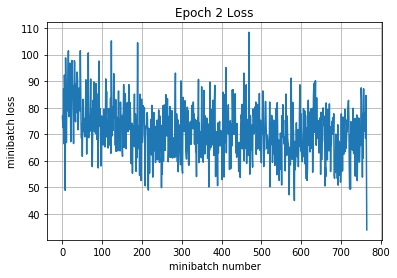

Iteration 1600: with minibatch training loss = 0.781 and accuracy of 0.72
Iteration 1700: with minibatch training loss = 0.898 and accuracy of 0.66
Iteration 1800: with minibatch training loss = 0.898 and accuracy of 0.66
Iteration 1900: with minibatch training loss = 0.589 and accuracy of 0.77
Iteration 2000: with minibatch training loss = 0.692 and accuracy of 0.8
Iteration 2100: with minibatch training loss = 0.687 and accuracy of 0.75
Iteration 2200: with minibatch training loss = 0.951 and accuracy of 0.69
Epoch 3, Overall loss = 0.831 and accuracy of 0.719


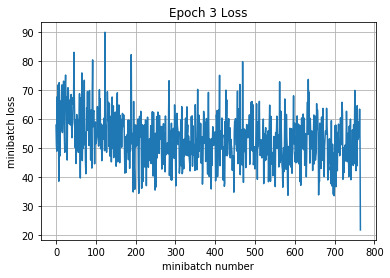

Iteration 2300: with minibatch training loss = 0.516 and accuracy of 0.89
Iteration 2400: with minibatch training loss = 0.626 and accuracy of 0.77
Iteration 2500: with minibatch training loss = 0.619 and accuracy of 0.81
Iteration 2600: with minibatch training loss = 0.531 and accuracy of 0.91
Iteration 2700: with minibatch training loss = 0.433 and accuracy of 0.88
Iteration 2800: with minibatch training loss = 0.525 and accuracy of 0.8
Iteration 2900: with minibatch training loss = 0.553 and accuracy of 0.81
Iteration 3000: with minibatch training loss = 0.496 and accuracy of 0.88
Epoch 4, Overall loss = 0.598 and accuracy of 0.815


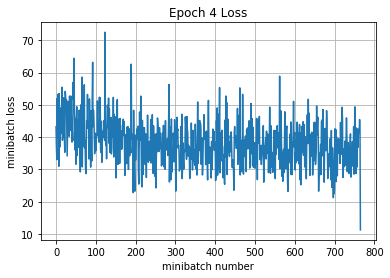

Iteration 3100: with minibatch training loss = 0.458 and accuracy of 0.84
Iteration 3200: with minibatch training loss = 0.495 and accuracy of 0.92
Iteration 3300: with minibatch training loss = 0.385 and accuracy of 0.88
Iteration 3400: with minibatch training loss = 0.258 and accuracy of 0.97
Iteration 3500: with minibatch training loss = 0.331 and accuracy of 0.91
Iteration 3600: with minibatch training loss = 0.353 and accuracy of 0.91
Iteration 3700: with minibatch training loss = 0.444 and accuracy of 0.84
Iteration 3800: with minibatch training loss = 0.301 and accuracy of 0.97
Epoch 5, Overall loss = 0.401 and accuracy of 0.898


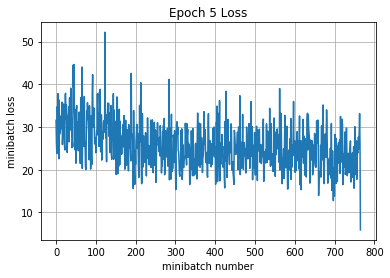

training time (seconds) 1578.5545751000027
Validation
Epoch 1, Overall loss = 1.3 and accuracy of 0.573
validation time (seconds) 2.010170100009418
predict
Epoch 1, Overall loss = 0.527 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.03 and accuracy of 0.16
Iteration 100: with minibatch training loss = 2.31 and accuracy of 0.3
Iteration 200: with minibatch training loss = 1.75 and accuracy of 0.42
Iteration 300: with minibatch training loss = 2.39 and accuracy of 0.28
Iteration 400: with minibatch training loss = 1.67 and accuracy of 0.44
Iteration 500: with minibatch training loss = 1.72 and accuracy of 0.45
Iteration 600: with minibatch training loss = 1.59 and accuracy of 0.48
Iteration 700: with minibatch training loss = 1.73 and accuracy of 0.39
Epoch 1, Overall loss = 1.82 and accuracy of 0.396


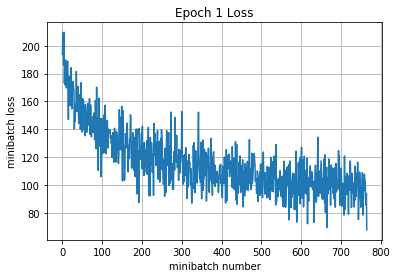

Iteration 800: with minibatch training loss = 1.41 and accuracy of 0.53
Iteration 900: with minibatch training loss = 1.04 and accuracy of 0.62
Iteration 1000: with minibatch training loss = 1.48 and accuracy of 0.5
Iteration 1100: with minibatch training loss = 1.23 and accuracy of 0.61
Iteration 1200: with minibatch training loss = 1.27 and accuracy of 0.58
Iteration 1300: with minibatch training loss = 1.19 and accuracy of 0.59
Iteration 1400: with minibatch training loss = 1.22 and accuracy of 0.56
Iteration 1500: with minibatch training loss = 1.14 and accuracy of 0.59
Epoch 2, Overall loss = 1.33 and accuracy of 0.534


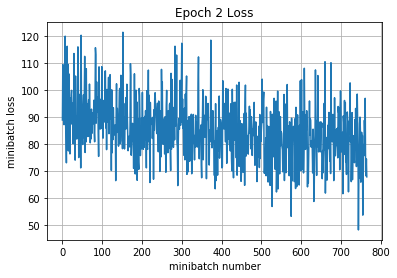

Iteration 1600: with minibatch training loss = 1.26 and accuracy of 0.59
Iteration 1700: with minibatch training loss = 0.975 and accuracy of 0.61
Iteration 1800: with minibatch training loss = 0.934 and accuracy of 0.69
Iteration 1900: with minibatch training loss = 0.928 and accuracy of 0.69
Iteration 2000: with minibatch training loss = 1.04 and accuracy of 0.62
Iteration 2100: with minibatch training loss = 1.1 and accuracy of 0.56
Iteration 2200: with minibatch training loss = 1 and accuracy of 0.62
Epoch 3, Overall loss = 1.13 and accuracy of 0.605


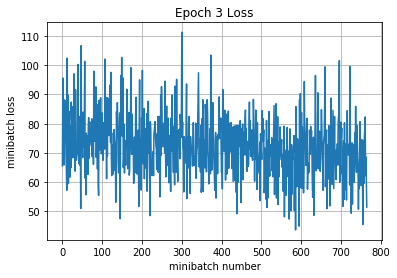

Iteration 2300: with minibatch training loss = 0.991 and accuracy of 0.56
Iteration 2400: with minibatch training loss = 1.05 and accuracy of 0.61
Iteration 2500: with minibatch training loss = 0.964 and accuracy of 0.67
Iteration 2600: with minibatch training loss = 1.16 and accuracy of 0.61
Iteration 2700: with minibatch training loss = 0.792 and accuracy of 0.67
Iteration 2800: with minibatch training loss = 1.21 and accuracy of 0.55
Iteration 2900: with minibatch training loss = 0.803 and accuracy of 0.66
Iteration 3000: with minibatch training loss = 0.862 and accuracy of 0.67
Epoch 4, Overall loss = 0.995 and accuracy of 0.65


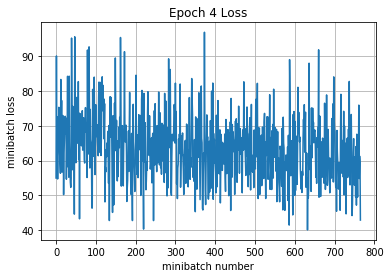

Iteration 3100: with minibatch training loss = 0.796 and accuracy of 0.73
Iteration 3200: with minibatch training loss = 1.1 and accuracy of 0.62
Iteration 3300: with minibatch training loss = 1.03 and accuracy of 0.61
Iteration 3400: with minibatch training loss = 0.864 and accuracy of 0.62
Iteration 3500: with minibatch training loss = 0.941 and accuracy of 0.72
Iteration 3600: with minibatch training loss = 1.04 and accuracy of 0.62
Iteration 3700: with minibatch training loss = 1.28 and accuracy of 0.55
Iteration 3800: with minibatch training loss = 0.711 and accuracy of 0.72
Epoch 5, Overall loss = 0.892 and accuracy of 0.685


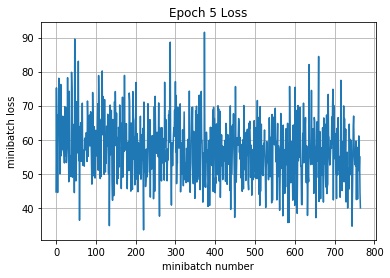

training time (seconds) 1673.6345211000007
Validation
Epoch 1, Overall loss = 0.97 and accuracy of 0.661
validation time (seconds) 2.36020580001059
predict
Epoch 1, Overall loss = 0.0541 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.18 and accuracy of 0.11
Iteration 100: with minibatch training loss = 2.36 and accuracy of 0.25
Iteration 200: with minibatch training loss = 2 and accuracy of 0.31
Iteration 300: with minibatch training loss = 2.05 and accuracy of 0.34
Iteration 400: with minibatch training loss = 2.1 and accuracy of 0.36
Iteration 500: with minibatch training loss = 1.82 and accuracy of 0.39
Iteration 600: with minibatch training loss = 1.84 and accuracy of 0.38
Iteration 700: with minibatch training loss = 1.62 and accuracy of 0.48
Epoch 1, Overall loss = 2 and accuracy of 0.351


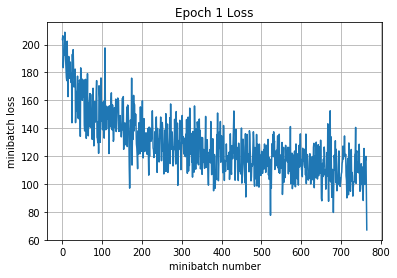

Iteration 800: with minibatch training loss = 1.79 and accuracy of 0.34
Iteration 900: with minibatch training loss = 2 and accuracy of 0.33
Iteration 1000: with minibatch training loss = 1.51 and accuracy of 0.44
Iteration 1100: with minibatch training loss = 1.54 and accuracy of 0.55
Iteration 1200: with minibatch training loss = 1.41 and accuracy of 0.5
Iteration 1300: with minibatch training loss = 1.37 and accuracy of 0.52
Iteration 1400: with minibatch training loss = 1.34 and accuracy of 0.59
Iteration 1500: with minibatch training loss = 1.58 and accuracy of 0.48
Epoch 2, Overall loss = 1.54 and accuracy of 0.463


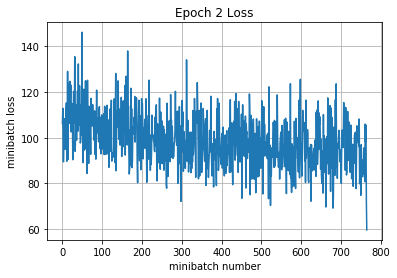

Iteration 1600: with minibatch training loss = 1.48 and accuracy of 0.53
Iteration 1700: with minibatch training loss = 1.19 and accuracy of 0.56
Iteration 1800: with minibatch training loss = 1.43 and accuracy of 0.47
Iteration 1900: with minibatch training loss = 1.1 and accuracy of 0.61
Iteration 2000: with minibatch training loss = 1.16 and accuracy of 0.56
Iteration 2100: with minibatch training loss = 1.34 and accuracy of 0.56
Iteration 2200: with minibatch training loss = 1.29 and accuracy of 0.44
Epoch 3, Overall loss = 1.36 and accuracy of 0.526


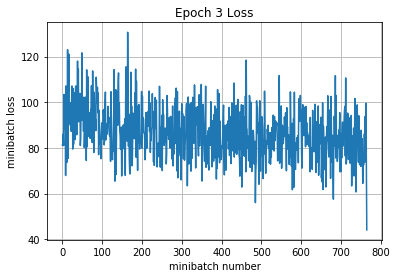

Iteration 2300: with minibatch training loss = 1.24 and accuracy of 0.58
Iteration 2400: with minibatch training loss = 1.19 and accuracy of 0.59
Iteration 2500: with minibatch training loss = 1.19 and accuracy of 0.59
Iteration 2600: with minibatch training loss = 1.21 and accuracy of 0.5
Iteration 2700: with minibatch training loss = 1.04 and accuracy of 0.64
Iteration 2800: with minibatch training loss = 1.25 and accuracy of 0.59
Iteration 2900: with minibatch training loss = 0.856 and accuracy of 0.72
Iteration 3000: with minibatch training loss = 1.12 and accuracy of 0.64
Epoch 4, Overall loss = 1.22 and accuracy of 0.57


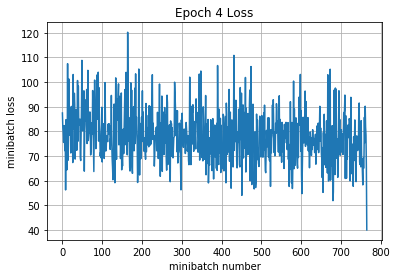

Iteration 3100: with minibatch training loss = 1.09 and accuracy of 0.55
Iteration 3200: with minibatch training loss = 1.04 and accuracy of 0.69
Iteration 3300: with minibatch training loss = 1.16 and accuracy of 0.55
Iteration 3400: with minibatch training loss = 1.34 and accuracy of 0.48
Iteration 3500: with minibatch training loss = 1.2 and accuracy of 0.56
Iteration 3600: with minibatch training loss = 1.07 and accuracy of 0.56
Iteration 3700: with minibatch training loss = 1.17 and accuracy of 0.59
Iteration 3800: with minibatch training loss = 1.12 and accuracy of 0.67
Epoch 5, Overall loss = 1.12 and accuracy of 0.603


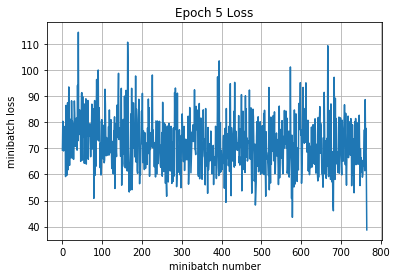

training time (seconds) 1636.9762875000015
Validation
Epoch 1, Overall loss = 1.07 and accuracy of 0.639
validation time (seconds) 2.0246289999922737
predict
Epoch 1, Overall loss = 0.0851 and accuracy of 1


In [130]:
def cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding(X, y, is_training, 
                                                                               dropout=None,
                                                                               **kwargs):
    out = X

    #32
    out, [W1, b1] = cnn(idx=1, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #28
    if dropout is not None:
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=2, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #24
    out = tf.nn.max_pool(out, ksize=(1,2,2,1), strides=(1,2,2,1), padding='SAME')
    #12
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=3, X=out, filters=64, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #8
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=4, X=out, filters=128, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #4
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)

    # Affine layer from 4x4x128 = 2,048 to 1024 outputs
    out, _ = affine(1, out, output_size=1024)

    # ReLU Activation Layer
    out = tf.nn.relu(out)

    out = tf.layers.batch_normalization(out, training=is_training)
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    # 5)
    # Affine layer from 1024 input units to 10 outputs
    out, _ = affine(2, out, output_size=10)
    return out, [W1]

local_models_max_polling = []

local_models_max_polling.append(estimate_model({
    'name': 'dropout: none',
    'model_builder': cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 5,
}, X_train, y_train, X_val, y_val))

local_models_max_polling.append(estimate_model({
    'name': 'dropout: 0.1',
    'dropout': 0.1,
    'model_builder': cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 5,
}, X_train, y_train, X_val, y_val))

local_models_max_polling.append(estimate_model({
    'name': 'dropout: 0.2',
    'dropout': 0.2,
    'model_builder': cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 5,
}, X_train, y_train, X_val, y_val))

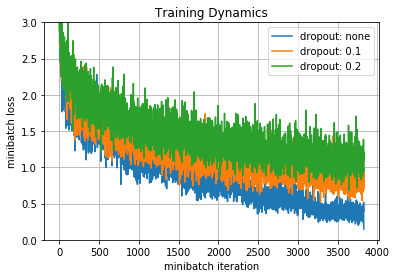

model: dropout: none


num_of_trainable   predict  training validation
time                    2395242  0.123729   1578.55    2.01017
total_correct           2395242       NaN  0.897612      0.573
total_lost              2395242       NaN  0.400817    1.29542

model: dropout: 0.1


num_of_trainable   predict  training validation
time                    2395242  0.155683   1673.63    2.36021
total_correct           2395242       NaN  0.684878      0.661
total_lost              2395242       NaN  0.892195   0.970083

model: dropout: 0.2


num_of_trainable   predict  training validation
time                    2395242  0.156526   1636.98    2.02463
total_correct           2395242       NaN  0.603163      0.639
total_lost              2395242       NaN   1.12198    1.06869

Model dropout: none


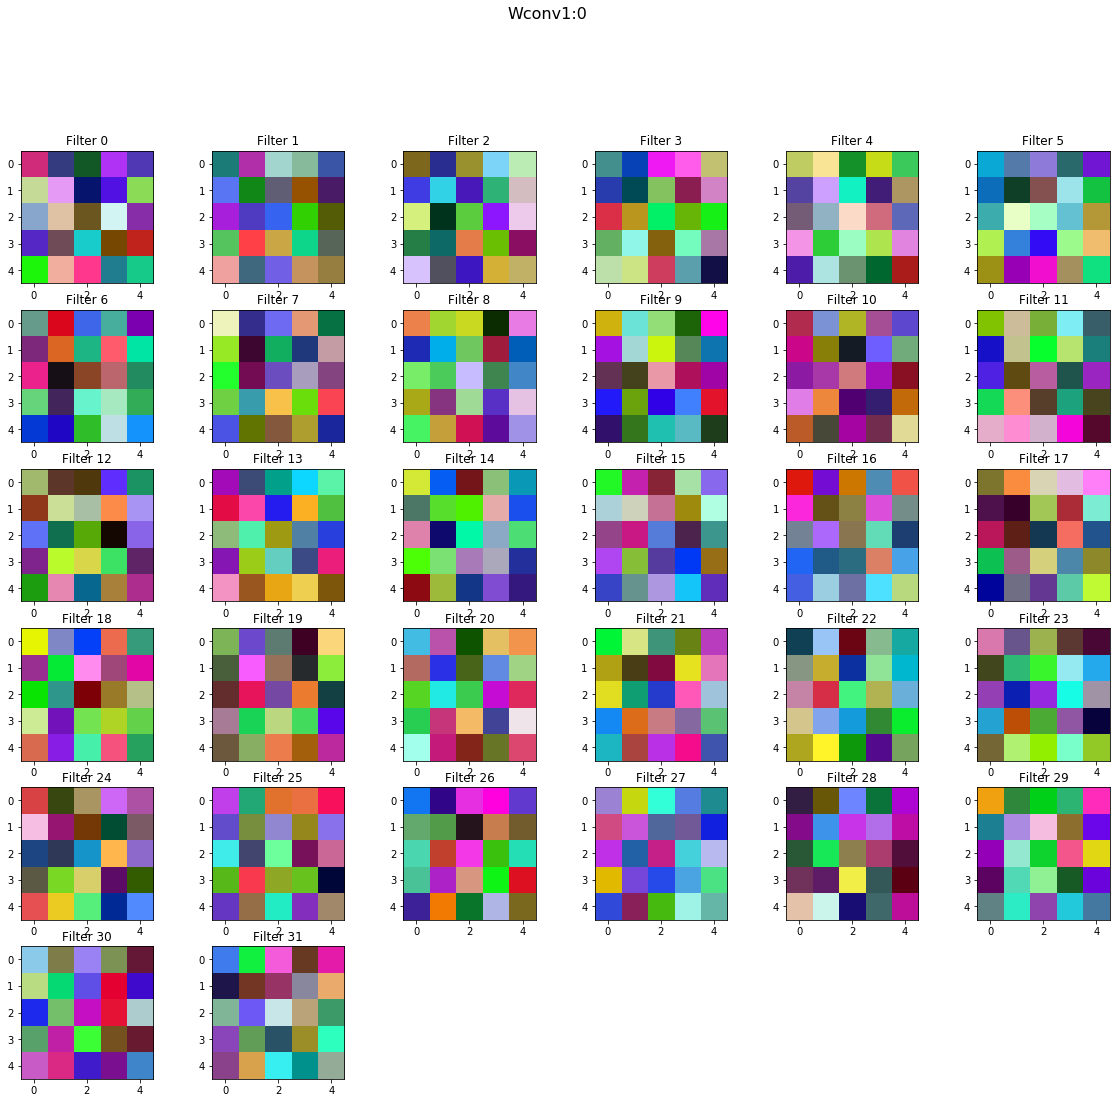

Model dropout: 0.1


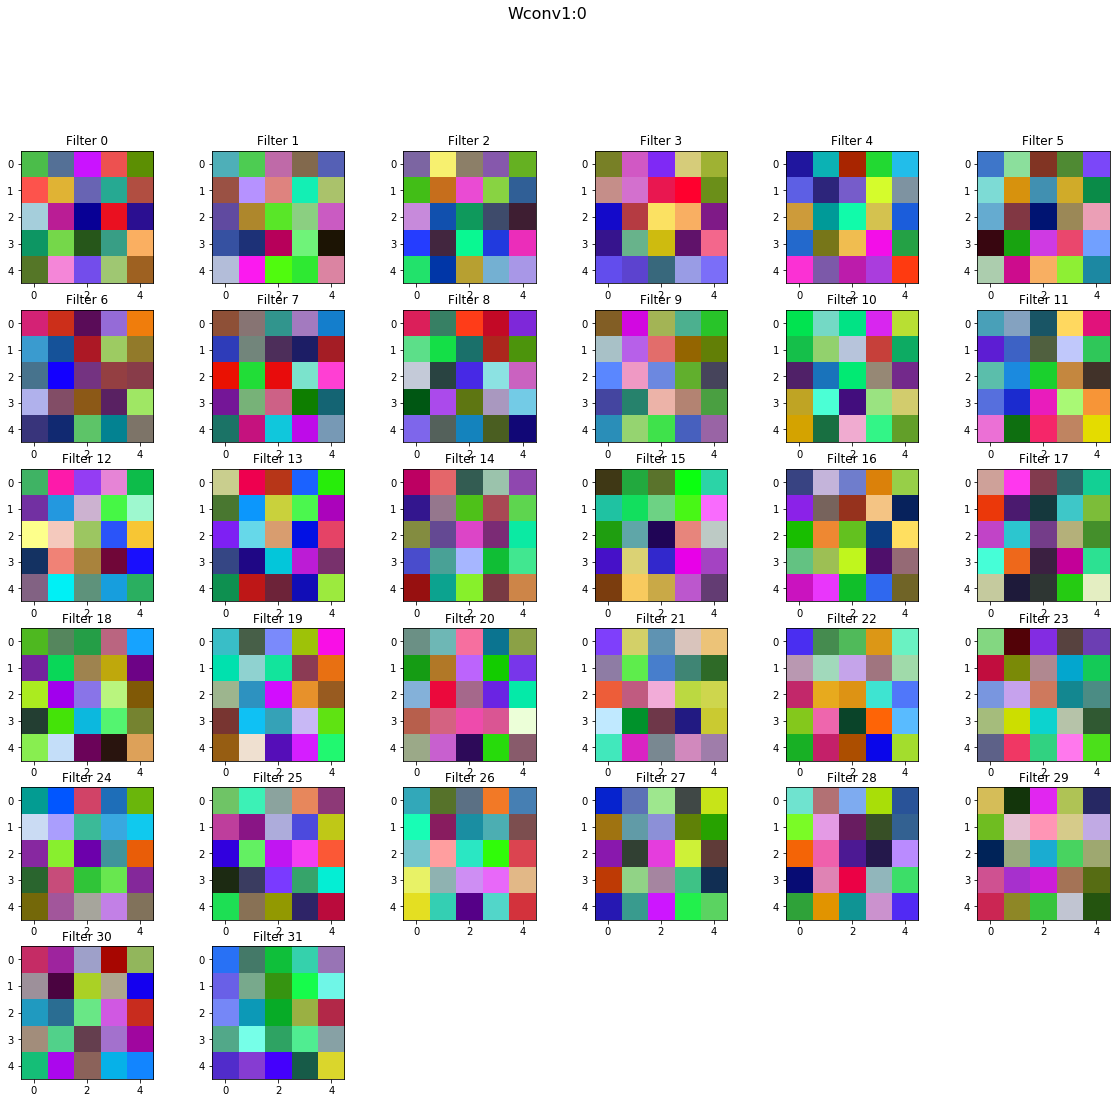

Model dropout: 0.2


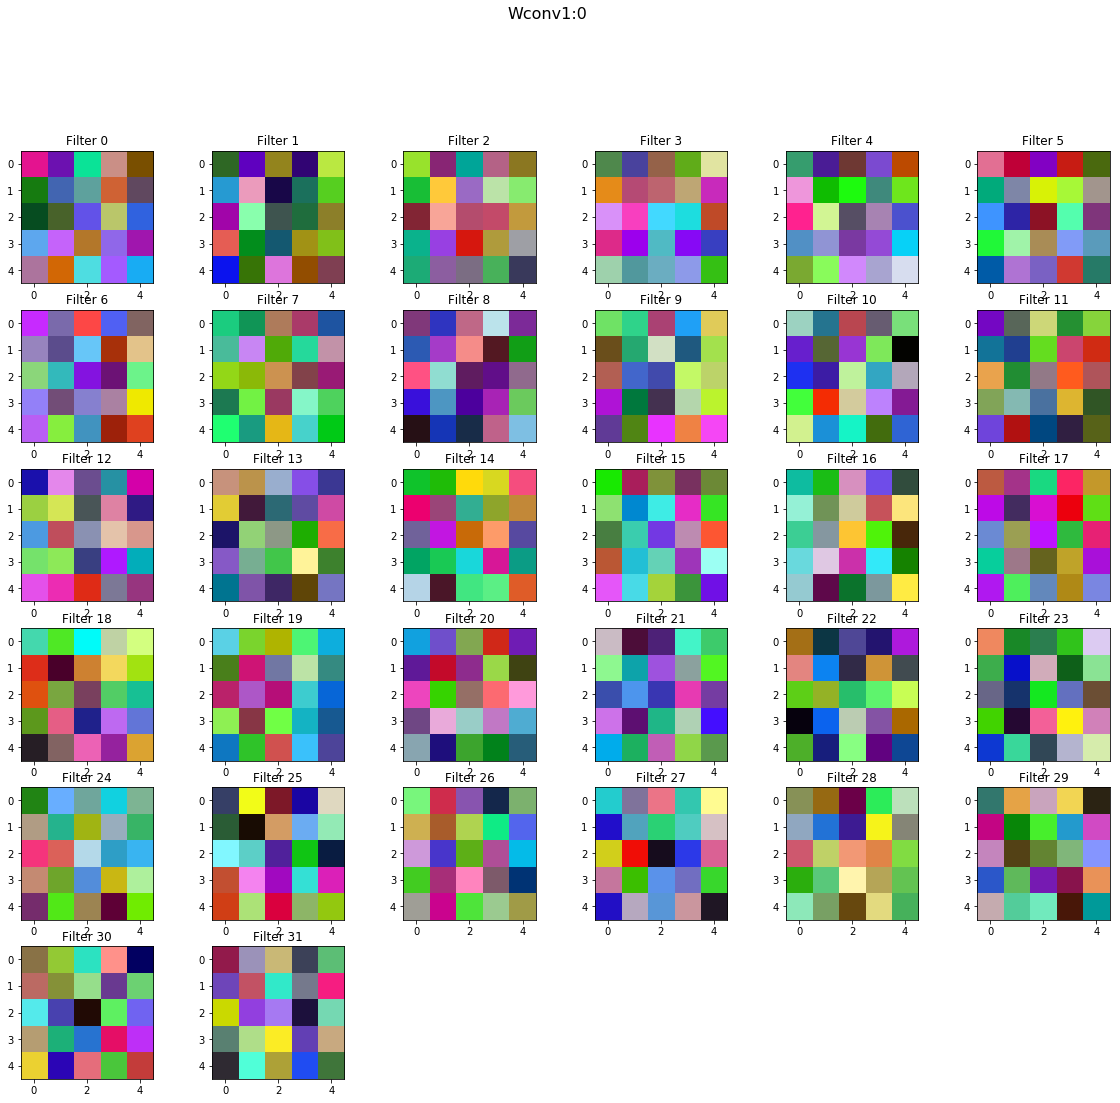

In [131]:
show_graphs(local_models_max_polling, ymax=3)
show_tables(local_models_max_polling)
draw_layers_of_models(local_models_max_polling)

Training
Iteration 0: with minibatch training loss = 3.08 and accuracy of 0.062
Iteration 100: with minibatch training loss = 1.86 and accuracy of 0.41
Iteration 200: with minibatch training loss = 1.59 and accuracy of 0.44
Iteration 300: with minibatch training loss = 1.57 and accuracy of 0.38
Iteration 400: with minibatch training loss = 1.23 and accuracy of 0.56
Iteration 500: with minibatch training loss = 1.25 and accuracy of 0.61
Iteration 600: with minibatch training loss = 1.18 and accuracy of 0.56
Iteration 700: with minibatch training loss = 1.26 and accuracy of 0.59
Epoch 1, Overall loss = 1.56 and accuracy of 0.481


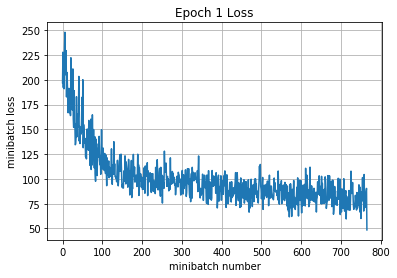

Iteration 800: with minibatch training loss = 1.05 and accuracy of 0.64
Iteration 900: with minibatch training loss = 0.845 and accuracy of 0.69
Iteration 1000: with minibatch training loss = 1.16 and accuracy of 0.62
Iteration 1100: with minibatch training loss = 1.1 and accuracy of 0.62
Iteration 1200: with minibatch training loss = 1.06 and accuracy of 0.64
Iteration 1300: with minibatch training loss = 1.09 and accuracy of 0.67
Iteration 1400: with minibatch training loss = 0.881 and accuracy of 0.69
Iteration 1500: with minibatch training loss = 0.771 and accuracy of 0.78
Epoch 2, Overall loss = 0.92 and accuracy of 0.684


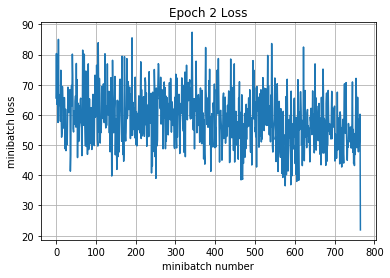

Iteration 1600: with minibatch training loss = 0.498 and accuracy of 0.81
Iteration 1700: with minibatch training loss = 0.267 and accuracy of 0.91
Iteration 1800: with minibatch training loss = 0.547 and accuracy of 0.84
Iteration 1900: with minibatch training loss = 0.348 and accuracy of 0.91
Iteration 2000: with minibatch training loss = 0.229 and accuracy of 0.94
Iteration 2100: with minibatch training loss = 0.307 and accuracy of 0.95
Iteration 2200: with minibatch training loss = 0.425 and accuracy of 0.84
Epoch 3, Overall loss = 0.4 and accuracy of 0.879


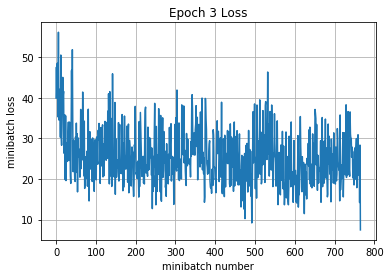

Iteration 2300: with minibatch training loss = 0.282 and accuracy of 0.92
Iteration 2400: with minibatch training loss = 0.158 and accuracy of 0.95
Iteration 2500: with minibatch training loss = 0.148 and accuracy of 0.97
Iteration 2600: with minibatch training loss = 0.245 and accuracy of 0.92
Iteration 2700: with minibatch training loss = 0.0903 and accuracy of 0.97
Iteration 2800: with minibatch training loss = 0.191 and accuracy of 0.94
Iteration 2900: with minibatch training loss = 0.229 and accuracy of 0.94
Iteration 3000: with minibatch training loss = 0.171 and accuracy of 0.97
Epoch 4, Overall loss = 0.178 and accuracy of 0.95


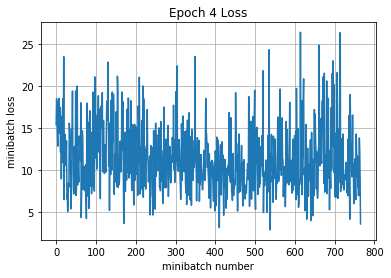

Iteration 3100: with minibatch training loss = 0.165 and accuracy of 0.97
Iteration 3200: with minibatch training loss = 0.0943 and accuracy of 0.97
Iteration 3300: with minibatch training loss = 0.208 and accuracy of 0.92
Iteration 3400: with minibatch training loss = 0.202 and accuracy of 0.92
Iteration 3500: with minibatch training loss = 0.0958 and accuracy of 0.98
Iteration 3600: with minibatch training loss = 0.102 and accuracy of 0.97
Iteration 3700: with minibatch training loss = 0.15 and accuracy of 0.95
Iteration 3800: with minibatch training loss = 0.115 and accuracy of 0.95
Epoch 5, Overall loss = 0.106 and accuracy of 0.97


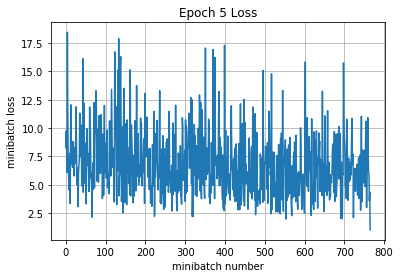

training time (seconds) 4165.14038360001
Validation
Epoch 1, Overall loss = 1.86 and accuracy of 0.543
validation time (seconds) 5.126193600008264
predict
Epoch 1, Overall loss = 0.000977 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 2.82 and accuracy of 0.094
Iteration 100: with minibatch training loss = 1.89 and accuracy of 0.45
Iteration 200: with minibatch training loss = 1.61 and accuracy of 0.31
Iteration 300: with minibatch training loss = 1.66 and accuracy of 0.28
Iteration 400: with minibatch training loss = 1.41 and accuracy of 0.55
Iteration 500: with minibatch training loss = 1.5 and accuracy of 0.45
Iteration 600: with minibatch training loss = 1.48 and accuracy of 0.53
Iteration 700: with minibatch training loss = 1.49 and accuracy of 0.44
Epoch 1, Overall loss = 1.67 and accuracy of 0.451


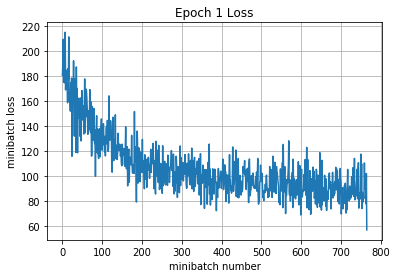

Iteration 800: with minibatch training loss = 1.07 and accuracy of 0.53
Iteration 900: with minibatch training loss = 1.03 and accuracy of 0.58
Iteration 1000: with minibatch training loss = 0.842 and accuracy of 0.77
Iteration 1100: with minibatch training loss = 1.02 and accuracy of 0.58
Iteration 1200: with minibatch training loss = 1.26 and accuracy of 0.5
Iteration 1300: with minibatch training loss = 1.42 and accuracy of 0.56
Iteration 1400: with minibatch training loss = 1.06 and accuracy of 0.59
Iteration 1500: with minibatch training loss = 1.5 and accuracy of 0.5
Epoch 2, Overall loss = 1.14 and accuracy of 0.607


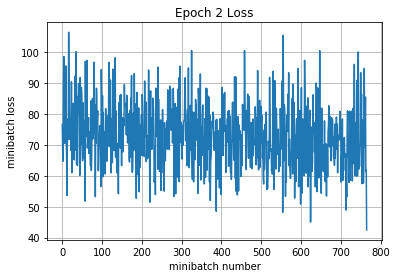

Iteration 1600: with minibatch training loss = 0.68 and accuracy of 0.75
Iteration 1700: with minibatch training loss = 0.77 and accuracy of 0.78
Iteration 1800: with minibatch training loss = 0.99 and accuracy of 0.64
Iteration 1900: with minibatch training loss = 0.659 and accuracy of 0.73
Iteration 2000: with minibatch training loss = 0.868 and accuracy of 0.69
Iteration 2100: with minibatch training loss = 0.864 and accuracy of 0.67
Iteration 2200: with minibatch training loss = 0.955 and accuracy of 0.69
Epoch 3, Overall loss = 0.876 and accuracy of 0.697


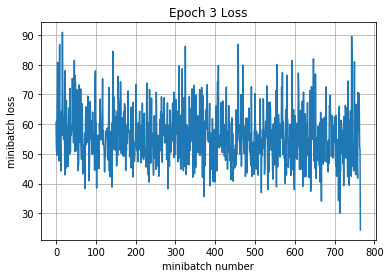

Iteration 2300: with minibatch training loss = 0.666 and accuracy of 0.72
Iteration 2400: with minibatch training loss = 0.496 and accuracy of 0.83
Iteration 2500: with minibatch training loss = 0.653 and accuracy of 0.72
Iteration 2600: with minibatch training loss = 0.729 and accuracy of 0.73
Iteration 2700: with minibatch training loss = 0.637 and accuracy of 0.8
Iteration 2800: with minibatch training loss = 0.613 and accuracy of 0.8
Iteration 2900: with minibatch training loss = 0.557 and accuracy of 0.81
Iteration 3000: with minibatch training loss = 0.676 and accuracy of 0.8
Epoch 4, Overall loss = 0.642 and accuracy of 0.778


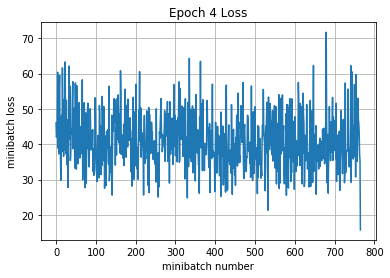

Iteration 3100: with minibatch training loss = 0.442 and accuracy of 0.84
Iteration 3200: with minibatch training loss = 0.339 and accuracy of 0.91
Iteration 3300: with minibatch training loss = 0.425 and accuracy of 0.88
Iteration 3400: with minibatch training loss = 0.513 and accuracy of 0.83
Iteration 3500: with minibatch training loss = 0.39 and accuracy of 0.84
Iteration 3600: with minibatch training loss = 0.62 and accuracy of 0.81
Iteration 3700: with minibatch training loss = 0.44 and accuracy of 0.81
Iteration 3800: with minibatch training loss = 0.292 and accuracy of 0.88
Epoch 5, Overall loss = 0.455 and accuracy of 0.847


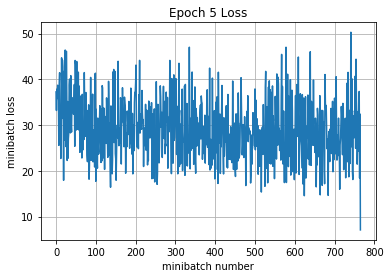

training time (seconds) 4351.141421699998
Validation
Epoch 1, Overall loss = 1.23 and accuracy of 0.637
validation time (seconds) 5.340535900002578
predict
Epoch 1, Overall loss = 0.159 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.77 and accuracy of 0.078
Iteration 100: with minibatch training loss = 2.11 and accuracy of 0.36
Iteration 200: with minibatch training loss = 1.71 and accuracy of 0.5
Iteration 300: with minibatch training loss = 1.67 and accuracy of 0.44
Iteration 400: with minibatch training loss = 1.43 and accuracy of 0.48
Iteration 500: with minibatch training loss = 1.49 and accuracy of 0.41
Iteration 600: with minibatch training loss = 1.48 and accuracy of 0.47
Iteration 700: with minibatch training loss = 1.74 and accuracy of 0.42
Epoch 1, Overall loss = 1.81 and accuracy of 0.408


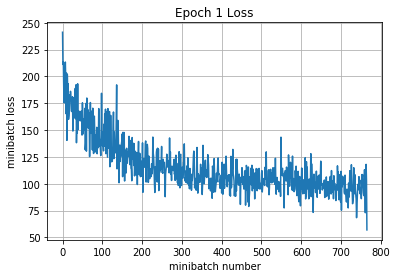

Iteration 800: with minibatch training loss = 1.62 and accuracy of 0.44
Iteration 900: with minibatch training loss = 1.27 and accuracy of 0.56
Iteration 1000: with minibatch training loss = 1.37 and accuracy of 0.47
Iteration 1100: with minibatch training loss = 1.29 and accuracy of 0.53
Iteration 1200: with minibatch training loss = 1.1 and accuracy of 0.59
Iteration 1300: with minibatch training loss = 1.33 and accuracy of 0.48
Iteration 1400: with minibatch training loss = 1.31 and accuracy of 0.62
Iteration 1500: with minibatch training loss = 1.36 and accuracy of 0.53
Epoch 2, Overall loss = 1.34 and accuracy of 0.536


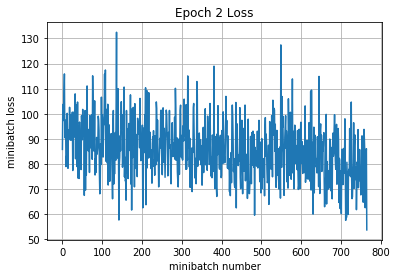

Iteration 1600: with minibatch training loss = 1.02 and accuracy of 0.59
Iteration 1700: with minibatch training loss = 1.22 and accuracy of 0.67
Iteration 1800: with minibatch training loss = 1 and accuracy of 0.64
Iteration 1900: with minibatch training loss = 1.13 and accuracy of 0.61
Iteration 2000: with minibatch training loss = 0.883 and accuracy of 0.64
Iteration 2100: with minibatch training loss = 1.49 and accuracy of 0.5
Iteration 2200: with minibatch training loss = 1.04 and accuracy of 0.58
Epoch 3, Overall loss = 1.13 and accuracy of 0.608


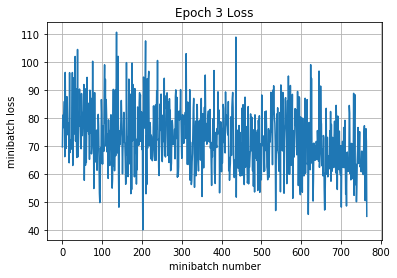

Iteration 2300: with minibatch training loss = 1.08 and accuracy of 0.59
Iteration 2400: with minibatch training loss = 1.03 and accuracy of 0.61
Iteration 2500: with minibatch training loss = 0.757 and accuracy of 0.73
Iteration 2600: with minibatch training loss = 1.14 and accuracy of 0.55
Iteration 2700: with minibatch training loss = 1.02 and accuracy of 0.62
Iteration 2800: with minibatch training loss = 0.9 and accuracy of 0.7
Iteration 2900: with minibatch training loss = 0.778 and accuracy of 0.73
Iteration 3000: with minibatch training loss = 0.884 and accuracy of 0.73
Epoch 4, Overall loss = 0.965 and accuracy of 0.665


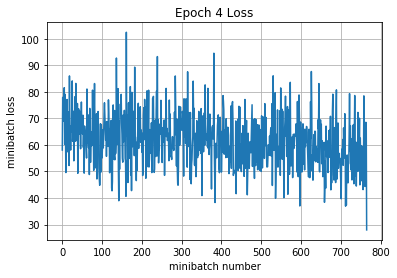

Iteration 3100: with minibatch training loss = 0.819 and accuracy of 0.73
Iteration 3200: with minibatch training loss = 1.23 and accuracy of 0.59
Iteration 3300: with minibatch training loss = 0.756 and accuracy of 0.72
Iteration 3400: with minibatch training loss = 0.726 and accuracy of 0.8
Iteration 3500: with minibatch training loss = 1.01 and accuracy of 0.66
Iteration 3600: with minibatch training loss = 0.561 and accuracy of 0.78
Iteration 3700: with minibatch training loss = 0.895 and accuracy of 0.69
Iteration 3800: with minibatch training loss = 0.819 and accuracy of 0.73
Epoch 5, Overall loss = 0.82 and accuracy of 0.716


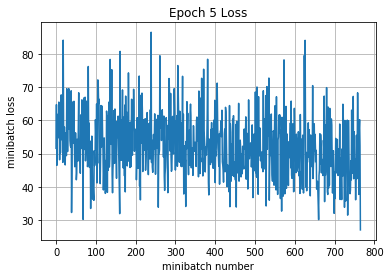

training time (seconds) 4405.7895401999995
Validation
Epoch 1, Overall loss = 0.971 and accuracy of 0.702
validation time (seconds) 5.390342599988799
predict
Epoch 1, Overall loss = 0.0102 and accuracy of 1


In [132]:
def cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_without_maxpull_valid_padding(X, y, is_training, 
                                                                               dropout=None,
                                                                               **kwargs):
    out = X

    #32
    out, [W1, b1] = cnn(idx=1, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #28
    if dropout is not None:
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=2, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #24
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=3, X=out, filters=64, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #20
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=4, X=out, filters=128, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #16
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)

    # Affine layer from 16x16x128 = 32,768 to 1024 outputs
    out, _ = affine(1, out, output_size=1024)

    # ReLU Activation Layer
    out = tf.nn.relu(out)

    out = tf.layers.batch_normalization(out, training=is_training)
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)

    # Affine layer from 1024 input units to 10 outputs
    out, _ = affine(2, out, output_size=10)
    return out, [W1]

local_models = []

local_models.append(estimate_model({
    'name': 'dropout: none',
    'model_builder': cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_without_maxpull_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 5,
}, X_train, y_train, X_val, y_val))

local_models.append(estimate_model({
    'name': 'dropout: 0.1',
    'dropout': 0.1,
    'model_builder': cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_without_maxpull_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 5,
}, X_train, y_train, X_val, y_val))

local_models.append(estimate_model({
    'name': 'dropout: 0.2',
    'dropout': 0.2,
    'model_builder': cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_without_maxpull_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 5,
}, X_train, y_train, X_val, y_val))

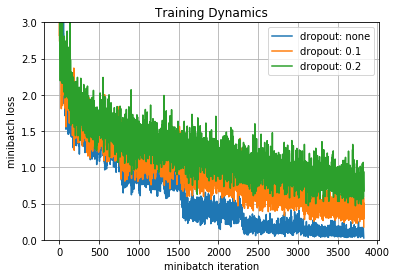

model: dropout: none


num_of_trainable   predict  training validation
time                   33852522  0.135624   4165.14    5.12619
total_correct          33852522       NaN  0.970245      0.543
total_lost             33852522       NaN  0.106252    1.85926

model: dropout: 0.1


num_of_trainable   predict  training validation
time                   33852522  0.202647   4351.14    5.34054
total_correct          33852522       NaN  0.846918      0.637
total_lost             33852522       NaN  0.454594    1.22511

model: dropout: 0.2


num_of_trainable   predict  training validation
time                   33852522  0.176743   4405.79    5.39034
total_correct          33852522       NaN  0.715939      0.702
total_lost             33852522       NaN  0.820366   0.970549

In [133]:
show_graphs(local_models, ymax=3)
show_tables(local_models)

Model dropout: none


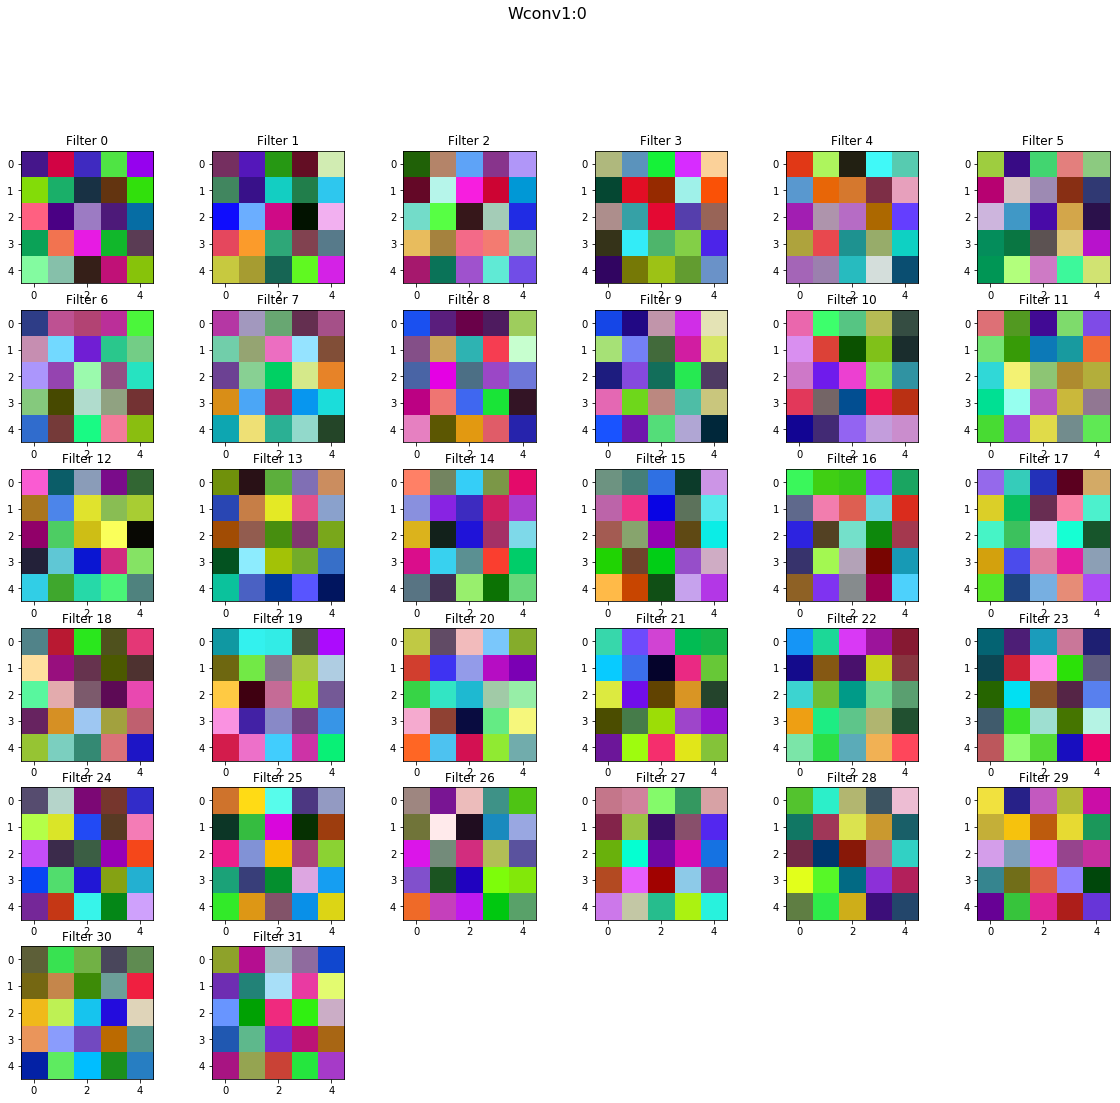

Model dropout: 0.1


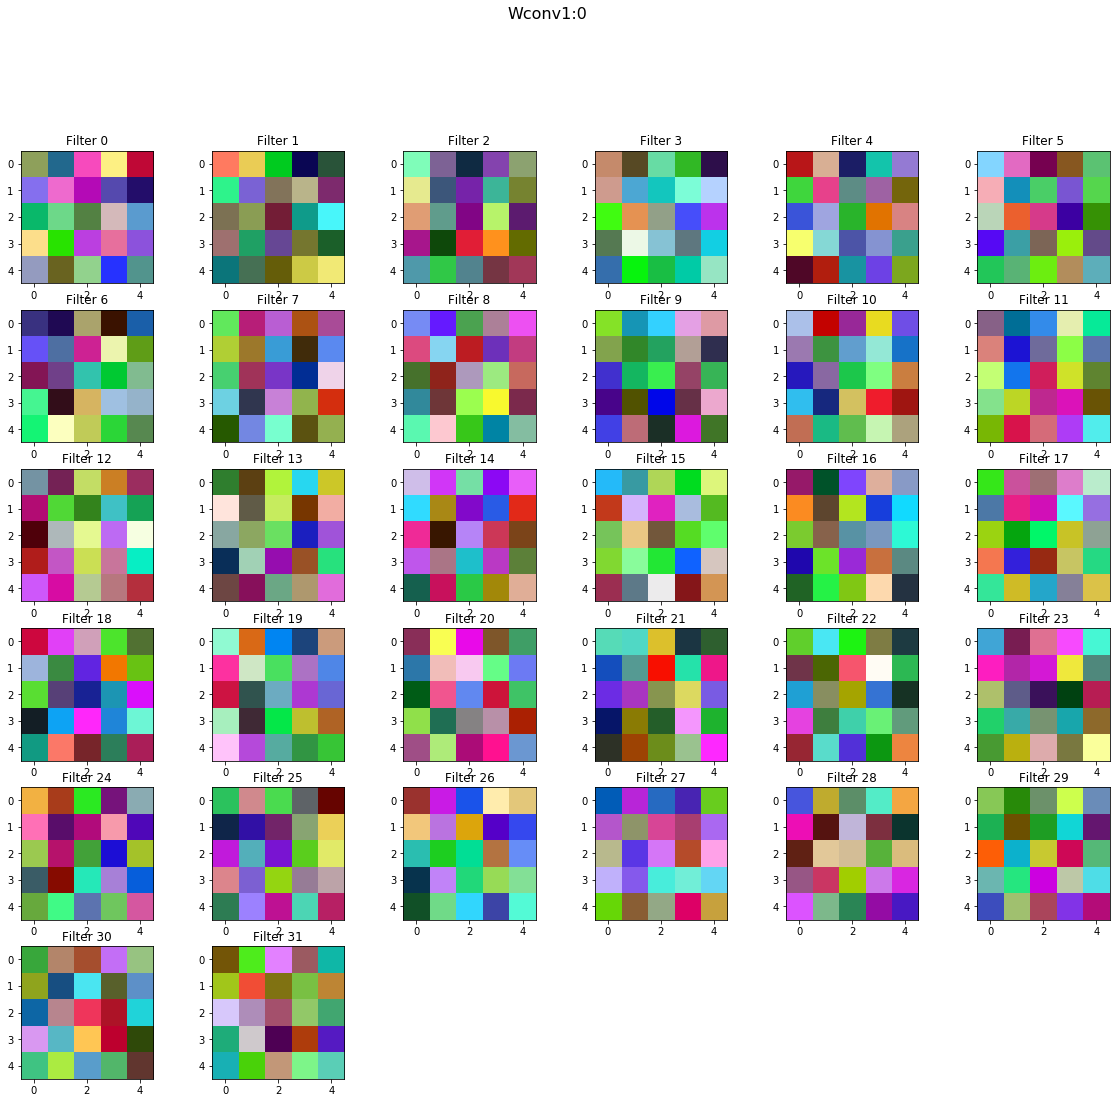

Model dropout: 0.2


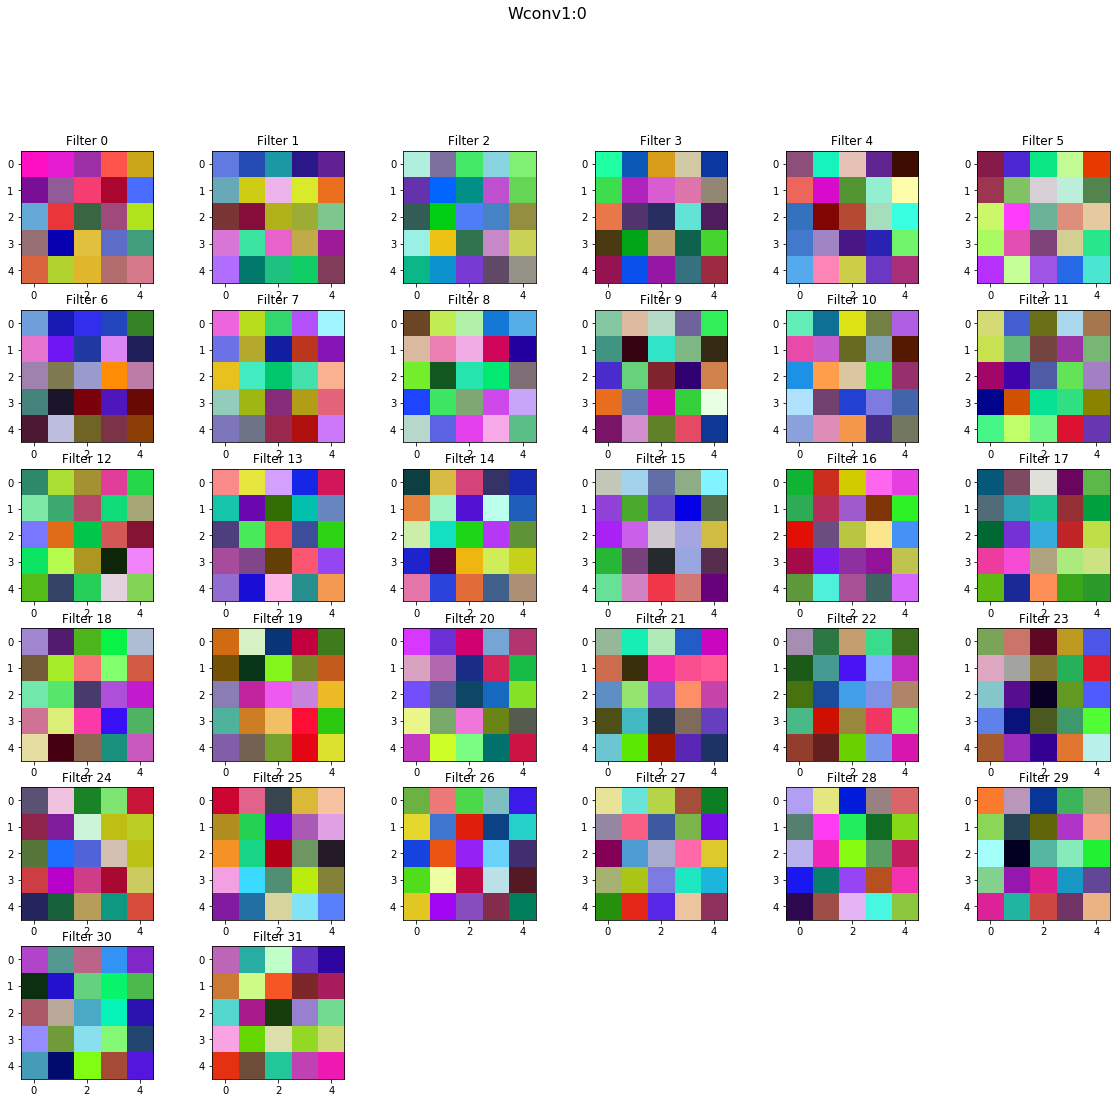

In [134]:
draw_layers_of_models(local_models)

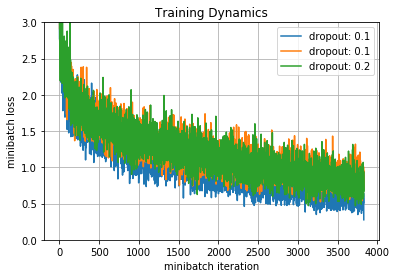

model: dropout: 0.1


num_of_trainable   predict  training validation
time                    5187594  0.143435   2330.59    2.48528
total_correct           5187594       NaN  0.784653      0.693
total_lost              5187594       NaN  0.621732   0.938613

model: dropout: 0.1


num_of_trainable   predict  training validation
time                    2395242  0.155683   1673.63    2.36021
total_correct           2395242       NaN  0.684878      0.661
total_lost              2395242       NaN  0.892195   0.970083

model: dropout: 0.2


num_of_trainable   predict  training validation
time                   33852522  0.176743   4405.79    5.39034
total_correct          33852522       NaN  0.715939      0.702
total_lost             33852522       NaN  0.820366   0.970549

Model dropout: 0.1


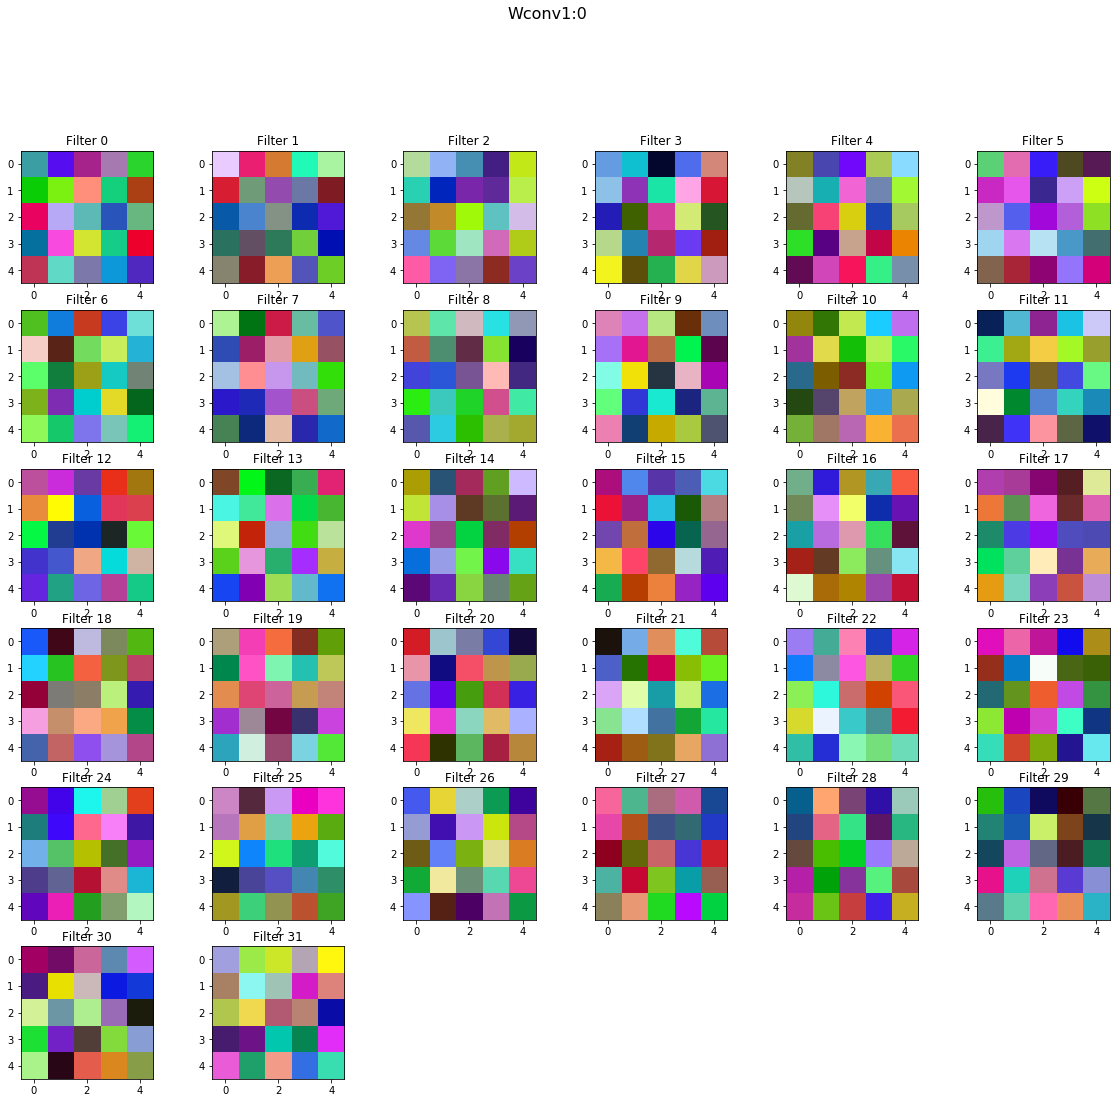

Model dropout: 0.1


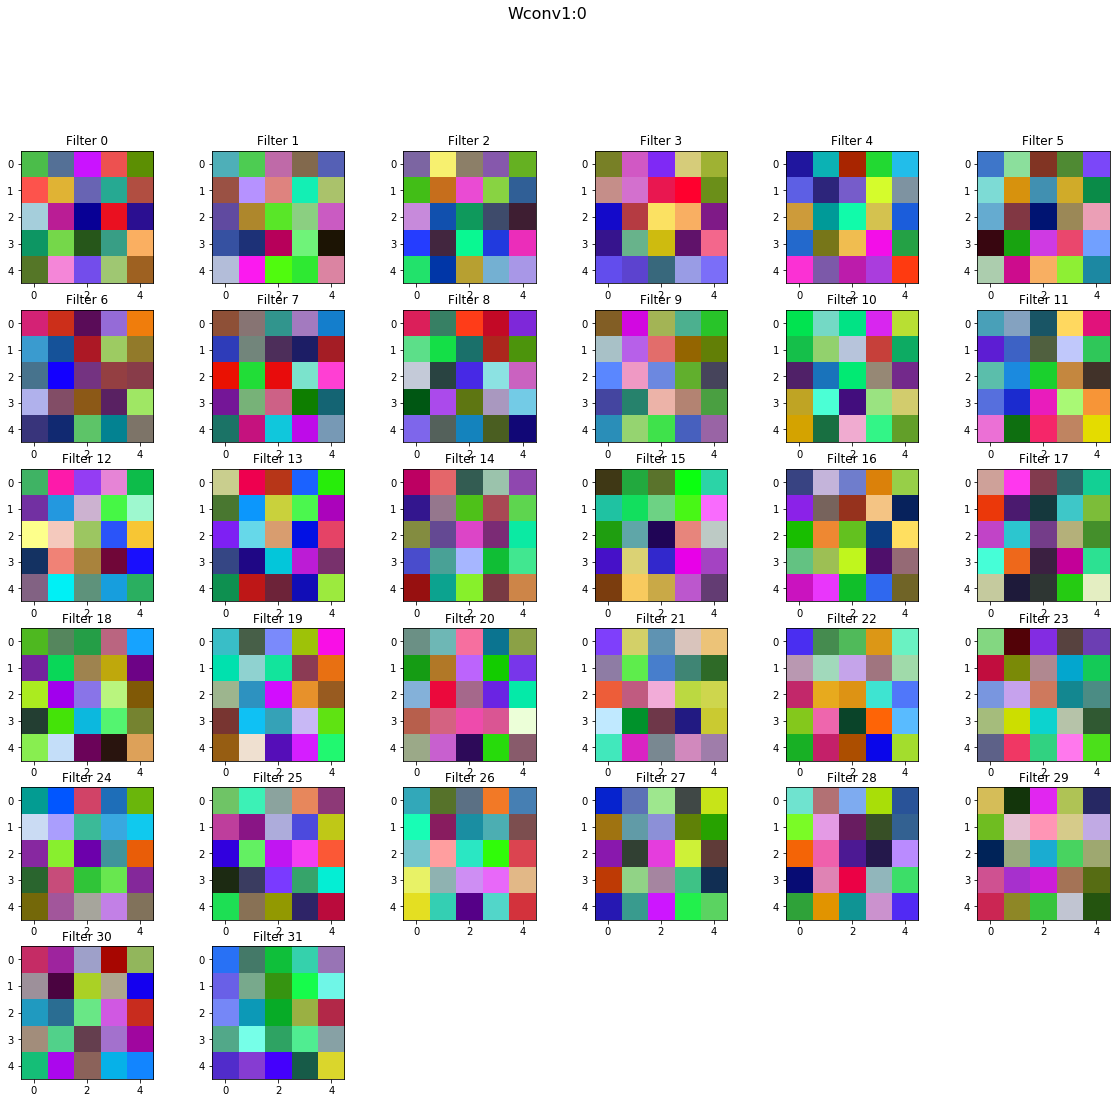

Model dropout: 0.2


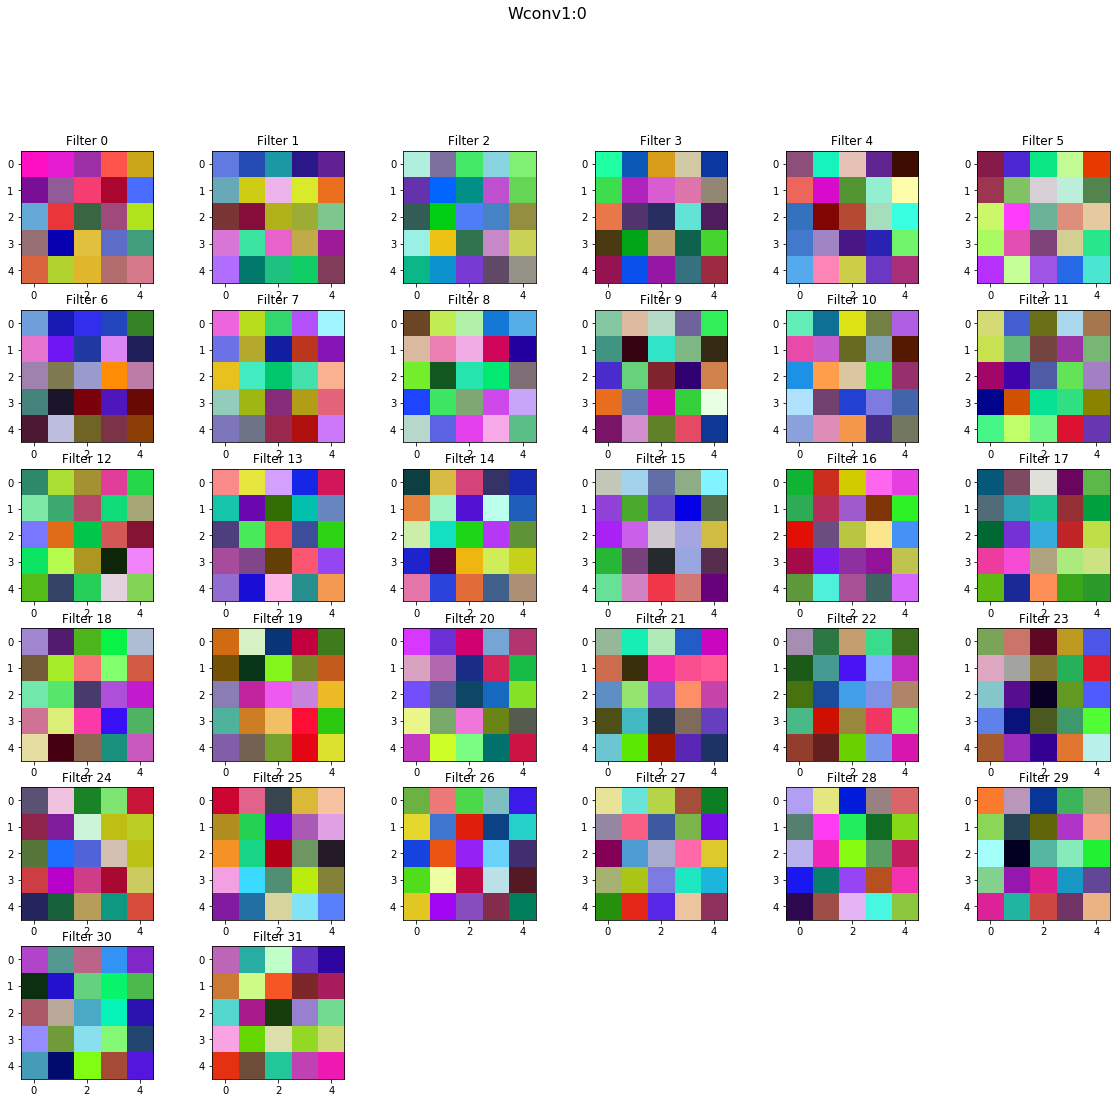

In [135]:
meta_models = [local_models_3_cnn[1], local_models_max_polling[1], local_models[2]]
show_graphs(meta_models, ymax=3)
show_tables(meta_models)
draw_layers_of_models(meta_models)

Training
Iteration 0: with minibatch training loss = 3.48 and accuracy of 0.078
Iteration 100: with minibatch training loss = 1.99 and accuracy of 0.38
Iteration 200: with minibatch training loss = 1.87 and accuracy of 0.41
Iteration 300: with minibatch training loss = 1.52 and accuracy of 0.5
Iteration 400: with minibatch training loss = 1.37 and accuracy of 0.48
Iteration 500: with minibatch training loss = 1.44 and accuracy of 0.61
Iteration 600: with minibatch training loss = 1.49 and accuracy of 0.58
Iteration 700: with minibatch training loss = 1.44 and accuracy of 0.48
Epoch 1, Overall loss = 1.67 and accuracy of 0.436


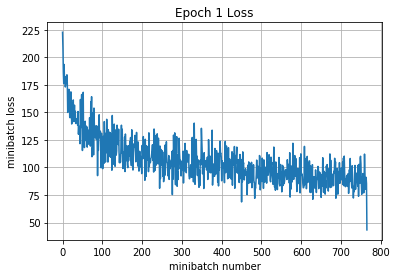

Iteration 800: with minibatch training loss = 1.11 and accuracy of 0.53
Iteration 900: with minibatch training loss = 1.24 and accuracy of 0.53
Iteration 1000: with minibatch training loss = 1.33 and accuracy of 0.59
Iteration 1100: with minibatch training loss = 0.938 and accuracy of 0.67
Iteration 1200: with minibatch training loss = 1.1 and accuracy of 0.62
Iteration 1300: with minibatch training loss = 1.02 and accuracy of 0.62
Iteration 1400: with minibatch training loss = 0.961 and accuracy of 0.66
Iteration 1500: with minibatch training loss = 1.15 and accuracy of 0.58
Epoch 2, Overall loss = 1.09 and accuracy of 0.619


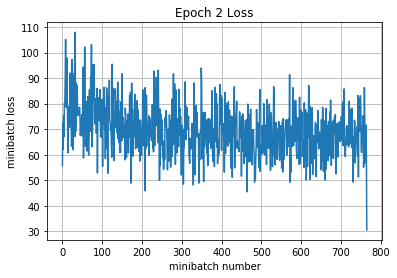

Iteration 1600: with minibatch training loss = 0.984 and accuracy of 0.69
Iteration 1700: with minibatch training loss = 0.828 and accuracy of 0.73
Iteration 1800: with minibatch training loss = 0.61 and accuracy of 0.8
Iteration 1900: with minibatch training loss = 0.657 and accuracy of 0.8
Iteration 2000: with minibatch training loss = 0.922 and accuracy of 0.73
Iteration 2100: with minibatch training loss = 0.887 and accuracy of 0.66
Iteration 2200: with minibatch training loss = 0.663 and accuracy of 0.81
Epoch 3, Overall loss = 0.797 and accuracy of 0.734


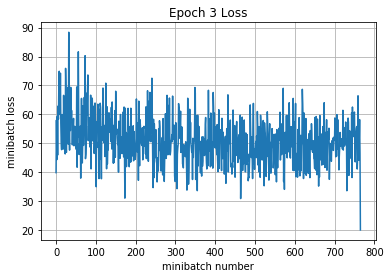

Iteration 2300: with minibatch training loss = 0.471 and accuracy of 0.91
Iteration 2400: with minibatch training loss = 0.658 and accuracy of 0.83
Iteration 2500: with minibatch training loss = 0.801 and accuracy of 0.75
Iteration 2600: with minibatch training loss = 0.564 and accuracy of 0.8
Iteration 2700: with minibatch training loss = 0.518 and accuracy of 0.8
Iteration 2800: with minibatch training loss = 0.575 and accuracy of 0.83
Iteration 2900: with minibatch training loss = 0.794 and accuracy of 0.75
Iteration 3000: with minibatch training loss = 0.565 and accuracy of 0.81
Epoch 4, Overall loss = 0.562 and accuracy of 0.835


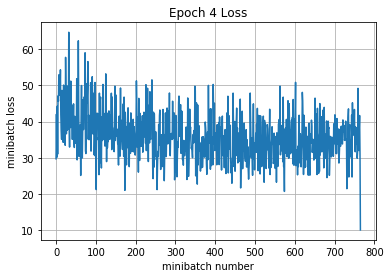

Iteration 3100: with minibatch training loss = 0.397 and accuracy of 0.92
Iteration 3200: with minibatch training loss = 0.424 and accuracy of 0.91
Iteration 3300: with minibatch training loss = 0.494 and accuracy of 0.81
Iteration 3400: with minibatch training loss = 0.452 and accuracy of 0.83
Iteration 3500: with minibatch training loss = 0.353 and accuracy of 0.89
Iteration 3600: with minibatch training loss = 0.335 and accuracy of 0.92
Iteration 3700: with minibatch training loss = 0.395 and accuracy of 0.84
Iteration 3800: with minibatch training loss = 0.247 and accuracy of 0.97
Epoch 5, Overall loss = 0.368 and accuracy of 0.914


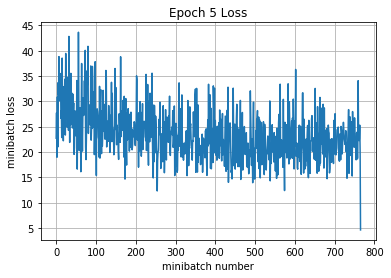

Iteration 3900: with minibatch training loss = 0.287 and accuracy of 0.94
Iteration 4000: with minibatch training loss = 0.164 and accuracy of 0.98
Iteration 4100: with minibatch training loss = 0.229 and accuracy of 0.98
Iteration 4200: with minibatch training loss = 0.232 and accuracy of 0.95
Iteration 4300: with minibatch training loss = 0.197 and accuracy of 0.95
Iteration 4400: with minibatch training loss = 0.155 and accuracy of 1
Iteration 4500: with minibatch training loss = 0.167 and accuracy of 1
Epoch 6, Overall loss = 0.222 and accuracy of 0.967


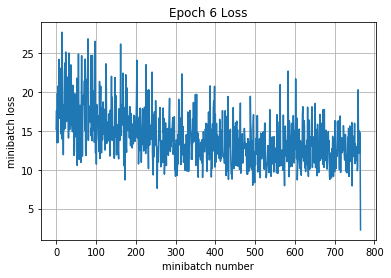

Iteration 4600: with minibatch training loss = 0.135 and accuracy of 1
Iteration 4700: with minibatch training loss = 0.144 and accuracy of 0.98
Iteration 4800: with minibatch training loss = 0.138 and accuracy of 0.98
Iteration 4900: with minibatch training loss = 0.095 and accuracy of 1
Iteration 5000: with minibatch training loss = 0.131 and accuracy of 0.98
Iteration 5100: with minibatch training loss = 0.111 and accuracy of 1
Iteration 5200: with minibatch training loss = 0.113 and accuracy of 1
Iteration 5300: with minibatch training loss = 0.0905 and accuracy of 1
Epoch 7, Overall loss = 0.129 and accuracy of 0.989


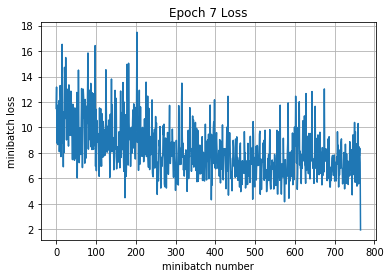

Iteration 5400: with minibatch training loss = 0.0976 and accuracy of 1
Iteration 5500: with minibatch training loss = 0.081 and accuracy of 1
Iteration 5600: with minibatch training loss = 0.0963 and accuracy of 0.98
Iteration 5700: with minibatch training loss = 0.0838 and accuracy of 1
Iteration 5800: with minibatch training loss = 0.0824 and accuracy of 1
Iteration 5900: with minibatch training loss = 0.0714 and accuracy of 1
Iteration 6000: with minibatch training loss = 0.0978 and accuracy of 0.98
Iteration 6100: with minibatch training loss = 0.101 and accuracy of 1
Epoch 8, Overall loss = 0.0852 and accuracy of 0.994


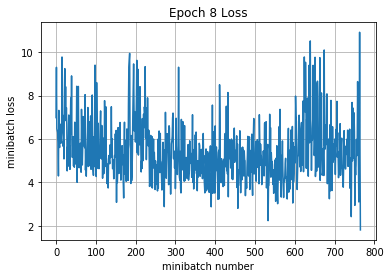

Iteration 6200: with minibatch training loss = 0.111 and accuracy of 0.98
Iteration 6300: with minibatch training loss = 0.041 and accuracy of 1
Iteration 6400: with minibatch training loss = 0.0469 and accuracy of 1
Iteration 6500: with minibatch training loss = 0.0921 and accuracy of 0.98
Iteration 6600: with minibatch training loss = 0.0876 and accuracy of 0.98
Iteration 6700: with minibatch training loss = 0.0836 and accuracy of 1
Iteration 6800: with minibatch training loss = 0.0923 and accuracy of 1
Epoch 9, Overall loss = 0.0762 and accuracy of 0.991


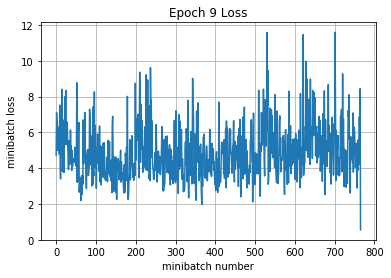

Iteration 6900: with minibatch training loss = 0.0739 and accuracy of 1
Iteration 7000: with minibatch training loss = 0.0664 and accuracy of 1
Iteration 7100: with minibatch training loss = 0.101 and accuracy of 0.98
Iteration 7200: with minibatch training loss = 0.0684 and accuracy of 0.97
Iteration 7300: with minibatch training loss = 0.0726 and accuracy of 0.97
Iteration 7400: with minibatch training loss = 0.0747 and accuracy of 1
Iteration 7500: with minibatch training loss = 0.0591 and accuracy of 0.97
Iteration 7600: with minibatch training loss = 0.101 and accuracy of 0.98
Epoch 10, Overall loss = 0.0772 and accuracy of 0.986


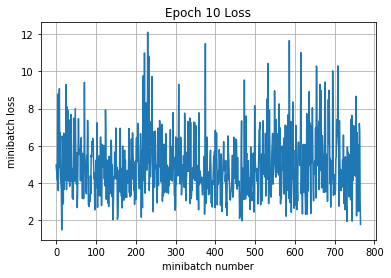

training time (seconds) 3473.1286832000187
Validation
Epoch 1, Overall loss = 1.75 and accuracy of 0.576
validation time (seconds) 3.0920719999994617
predict
Epoch 1, Overall loss = 0.000406 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.57 and accuracy of 0.078
Iteration 100: with minibatch training loss = 2.1 and accuracy of 0.34
Iteration 200: with minibatch training loss = 1.83 and accuracy of 0.41
Iteration 300: with minibatch training loss = 1.84 and accuracy of 0.34
Iteration 400: with minibatch training loss = 1.56 and accuracy of 0.42
Iteration 500: with minibatch training loss = 1.51 and accuracy of 0.48
Iteration 600: with minibatch training loss = 1.44 and accuracy of 0.48
Iteration 700: with minibatch training loss = 1.45 and accuracy of 0.5
Epoch 1, Overall loss = 1.81 and accuracy of 0.391


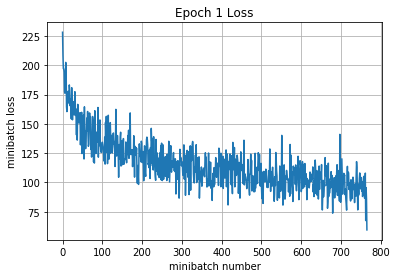

Iteration 800: with minibatch training loss = 1.74 and accuracy of 0.42
Iteration 900: with minibatch training loss = 1.65 and accuracy of 0.48
Iteration 1000: with minibatch training loss = 1.31 and accuracy of 0.55
Iteration 1100: with minibatch training loss = 1.55 and accuracy of 0.44
Iteration 1200: with minibatch training loss = 1.33 and accuracy of 0.52
Iteration 1300: with minibatch training loss = 1.35 and accuracy of 0.56
Iteration 1400: with minibatch training loss = 1.22 and accuracy of 0.55
Iteration 1500: with minibatch training loss = 1.09 and accuracy of 0.64
Epoch 2, Overall loss = 1.36 and accuracy of 0.522


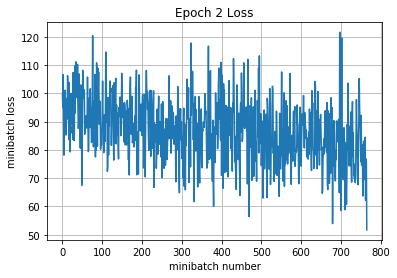

Iteration 1600: with minibatch training loss = 1.16 and accuracy of 0.5
Iteration 1700: with minibatch training loss = 0.938 and accuracy of 0.64
Iteration 1800: with minibatch training loss = 1.46 and accuracy of 0.52
Iteration 1900: with minibatch training loss = 0.962 and accuracy of 0.66
Iteration 2000: with minibatch training loss = 1.15 and accuracy of 0.66
Iteration 2100: with minibatch training loss = 1.1 and accuracy of 0.58
Iteration 2200: with minibatch training loss = 1.28 and accuracy of 0.61
Epoch 3, Overall loss = 1.17 and accuracy of 0.586


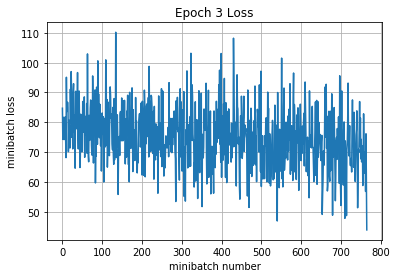

Iteration 2300: with minibatch training loss = 1.13 and accuracy of 0.62
Iteration 2400: with minibatch training loss = 1.09 and accuracy of 0.56
Iteration 2500: with minibatch training loss = 0.972 and accuracy of 0.66
Iteration 2600: with minibatch training loss = 1.11 and accuracy of 0.66
Iteration 2700: with minibatch training loss = 0.951 and accuracy of 0.73
Iteration 2800: with minibatch training loss = 1.05 and accuracy of 0.61
Iteration 2900: with minibatch training loss = 1.04 and accuracy of 0.64
Iteration 3000: with minibatch training loss = 1.28 and accuracy of 0.56
Epoch 4, Overall loss = 1.04 and accuracy of 0.635


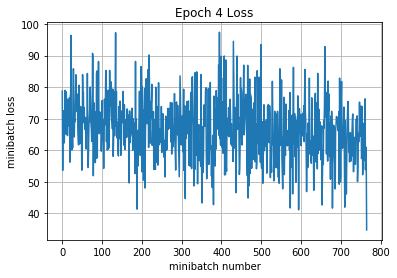

Iteration 3100: with minibatch training loss = 1.07 and accuracy of 0.64
Iteration 3200: with minibatch training loss = 1.16 and accuracy of 0.62
Iteration 3300: with minibatch training loss = 0.83 and accuracy of 0.75
Iteration 3400: with minibatch training loss = 0.921 and accuracy of 0.62
Iteration 3500: with minibatch training loss = 0.974 and accuracy of 0.67
Iteration 3600: with minibatch training loss = 1.08 and accuracy of 0.64
Iteration 3700: with minibatch training loss = 1.11 and accuracy of 0.64
Iteration 3800: with minibatch training loss = 0.608 and accuracy of 0.77
Epoch 5, Overall loss = 0.938 and accuracy of 0.669


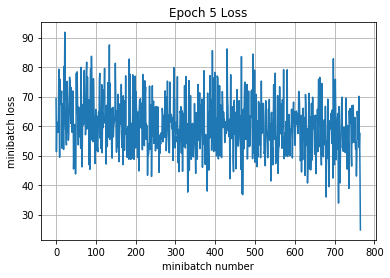

Iteration 3900: with minibatch training loss = 1.01 and accuracy of 0.66
Iteration 4000: with minibatch training loss = 0.779 and accuracy of 0.75
Iteration 4100: with minibatch training loss = 0.71 and accuracy of 0.8
Iteration 4200: with minibatch training loss = 0.839 and accuracy of 0.69
Iteration 4300: with minibatch training loss = 0.74 and accuracy of 0.7
Iteration 4400: with minibatch training loss = 0.79 and accuracy of 0.77
Iteration 4500: with minibatch training loss = 0.973 and accuracy of 0.58
Epoch 6, Overall loss = 0.846 and accuracy of 0.703


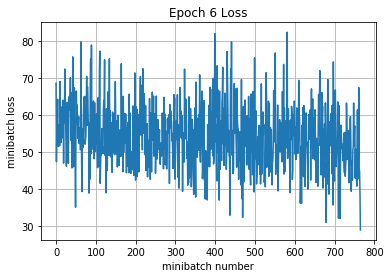

Iteration 4600: with minibatch training loss = 0.822 and accuracy of 0.7
Iteration 4700: with minibatch training loss = 0.71 and accuracy of 0.72
Iteration 4800: with minibatch training loss = 0.679 and accuracy of 0.75
Iteration 4900: with minibatch training loss = 0.925 and accuracy of 0.64
Iteration 5000: with minibatch training loss = 0.665 and accuracy of 0.72
Iteration 5100: with minibatch training loss = 0.655 and accuracy of 0.78
Iteration 5200: with minibatch training loss = 0.835 and accuracy of 0.67
Iteration 5300: with minibatch training loss = 0.664 and accuracy of 0.78
Epoch 7, Overall loss = 0.761 and accuracy of 0.731


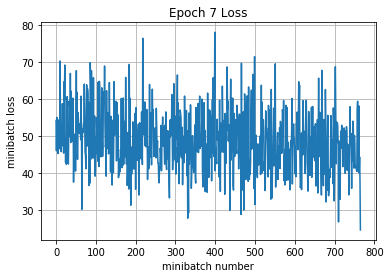

Iteration 5400: with minibatch training loss = 0.851 and accuracy of 0.67
Iteration 5500: with minibatch training loss = 0.759 and accuracy of 0.77
Iteration 5600: with minibatch training loss = 0.858 and accuracy of 0.69
Iteration 5700: with minibatch training loss = 0.766 and accuracy of 0.73
Iteration 5800: with minibatch training loss = 0.65 and accuracy of 0.72
Iteration 5900: with minibatch training loss = 0.7 and accuracy of 0.77
Iteration 6000: with minibatch training loss = 0.667 and accuracy of 0.75
Iteration 6100: with minibatch training loss = 0.617 and accuracy of 0.77
Epoch 8, Overall loss = 0.695 and accuracy of 0.756


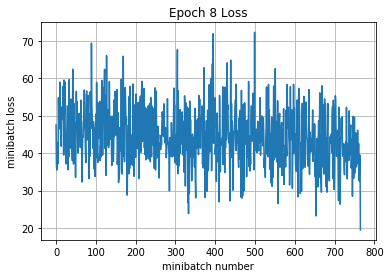

Iteration 6200: with minibatch training loss = 0.665 and accuracy of 0.81
Iteration 6300: with minibatch training loss = 0.655 and accuracy of 0.73
Iteration 6400: with minibatch training loss = 0.697 and accuracy of 0.75
Iteration 6500: with minibatch training loss = 0.832 and accuracy of 0.69
Iteration 6600: with minibatch training loss = 0.54 and accuracy of 0.78
Iteration 6700: with minibatch training loss = 0.767 and accuracy of 0.75
Iteration 6800: with minibatch training loss = 0.487 and accuracy of 0.83
Epoch 9, Overall loss = 0.632 and accuracy of 0.778


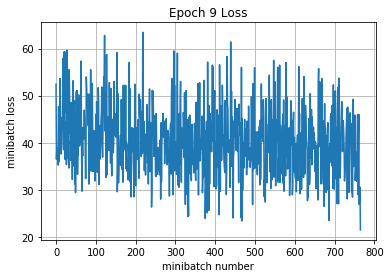

Iteration 6900: with minibatch training loss = 0.618 and accuracy of 0.81
Iteration 7000: with minibatch training loss = 0.622 and accuracy of 0.78
Iteration 7100: with minibatch training loss = 0.561 and accuracy of 0.77
Iteration 7200: with minibatch training loss = 0.456 and accuracy of 0.83
Iteration 7300: with minibatch training loss = 0.602 and accuracy of 0.75
Iteration 7400: with minibatch training loss = 0.535 and accuracy of 0.77
Iteration 7500: with minibatch training loss = 0.717 and accuracy of 0.81
Iteration 7600: with minibatch training loss = 0.556 and accuracy of 0.77
Epoch 10, Overall loss = 0.572 and accuracy of 0.797


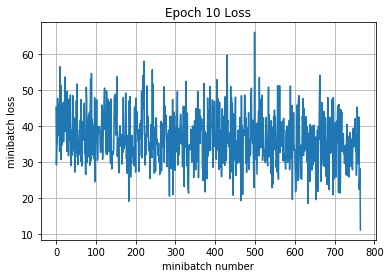

training time (seconds) 3447.268551999994
Validation
Epoch 1, Overall loss = 0.947 and accuracy of 0.694
validation time (seconds) 2.2611970999860205
predict
Epoch 1, Overall loss = 0.0595 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.35 and accuracy of 0.11
Iteration 100: with minibatch training loss = 2.37 and accuracy of 0.2
Iteration 200: with minibatch training loss = 2.3 and accuracy of 0.36
Iteration 300: with minibatch training loss = 1.88 and accuracy of 0.33
Iteration 400: with minibatch training loss = 1.77 and accuracy of 0.28
Iteration 500: with minibatch training loss = 1.98 and accuracy of 0.33
Iteration 600: with minibatch training loss = 1.68 and accuracy of 0.44
Iteration 700: with minibatch training loss = 1.7 and accuracy of 0.39
Epoch 1, Overall loss = 2.03 and accuracy of 0.346


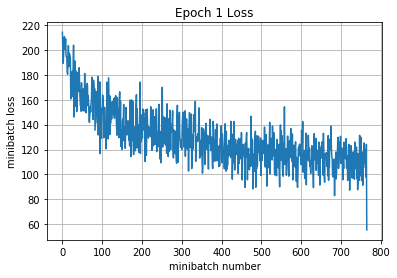

Iteration 800: with minibatch training loss = 1.54 and accuracy of 0.42
Iteration 900: with minibatch training loss = 1.73 and accuracy of 0.47
Iteration 1000: with minibatch training loss = 1.5 and accuracy of 0.41
Iteration 1100: with minibatch training loss = 1.63 and accuracy of 0.41
Iteration 1200: with minibatch training loss = 1.44 and accuracy of 0.47
Iteration 1300: with minibatch training loss = 1.38 and accuracy of 0.48
Iteration 1400: with minibatch training loss = 1.63 and accuracy of 0.55
Iteration 1500: with minibatch training loss = 1.11 and accuracy of 0.64
Epoch 2, Overall loss = 1.54 and accuracy of 0.466


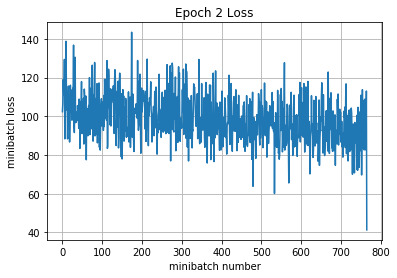

Iteration 1600: with minibatch training loss = 1.52 and accuracy of 0.48
Iteration 1700: with minibatch training loss = 1.46 and accuracy of 0.45
Iteration 1800: with minibatch training loss = 1.22 and accuracy of 0.5
Iteration 1900: with minibatch training loss = 1.09 and accuracy of 0.64
Iteration 2000: with minibatch training loss = 1.48 and accuracy of 0.45
Iteration 2100: with minibatch training loss = 1.11 and accuracy of 0.56
Iteration 2200: with minibatch training loss = 1.66 and accuracy of 0.48
Epoch 3, Overall loss = 1.36 and accuracy of 0.525


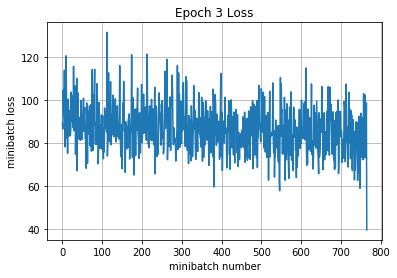

Iteration 2300: with minibatch training loss = 1.51 and accuracy of 0.48
Iteration 2400: with minibatch training loss = 0.966 and accuracy of 0.64
Iteration 2500: with minibatch training loss = 1.38 and accuracy of 0.58
Iteration 2600: with minibatch training loss = 1.43 and accuracy of 0.45
Iteration 2700: with minibatch training loss = 1.07 and accuracy of 0.56
Iteration 2800: with minibatch training loss = 1.1 and accuracy of 0.66
Iteration 2900: with minibatch training loss = 1.07 and accuracy of 0.59
Iteration 3000: with minibatch training loss = 1.14 and accuracy of 0.58
Epoch 4, Overall loss = 1.22 and accuracy of 0.572


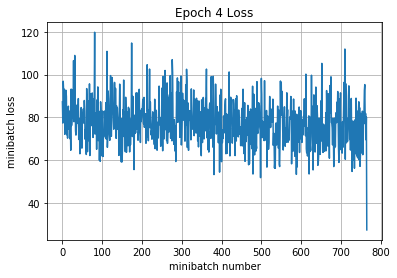

Iteration 3100: with minibatch training loss = 1.18 and accuracy of 0.61
Iteration 3200: with minibatch training loss = 1.27 and accuracy of 0.62
Iteration 3300: with minibatch training loss = 1.04 and accuracy of 0.66
Iteration 3400: with minibatch training loss = 1.12 and accuracy of 0.53
Iteration 3500: with minibatch training loss = 1.18 and accuracy of 0.61
Iteration 3600: with minibatch training loss = 1.17 and accuracy of 0.64
Iteration 3700: with minibatch training loss = 1.03 and accuracy of 0.67
Iteration 3800: with minibatch training loss = 1.13 and accuracy of 0.56
Epoch 5, Overall loss = 1.12 and accuracy of 0.611


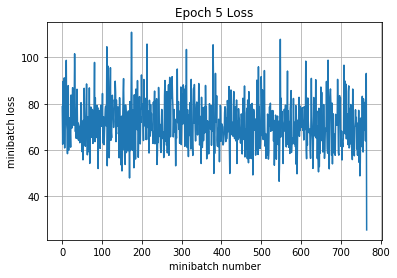

Iteration 3900: with minibatch training loss = 0.8 and accuracy of 0.72
Iteration 4000: with minibatch training loss = 1.21 and accuracy of 0.53
Iteration 4100: with minibatch training loss = 1.37 and accuracy of 0.56
Iteration 4200: with minibatch training loss = 1.12 and accuracy of 0.66
Iteration 4300: with minibatch training loss = 0.917 and accuracy of 0.72
Iteration 4400: with minibatch training loss = 0.902 and accuracy of 0.67
Iteration 4500: with minibatch training loss = 1.1 and accuracy of 0.67
Epoch 6, Overall loss = 1.04 and accuracy of 0.637


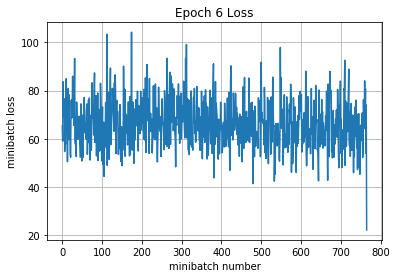

Iteration 4600: with minibatch training loss = 1.19 and accuracy of 0.62
Iteration 4700: with minibatch training loss = 0.978 and accuracy of 0.67
Iteration 4800: with minibatch training loss = 0.975 and accuracy of 0.69
Iteration 4900: with minibatch training loss = 1.13 and accuracy of 0.62
Iteration 5000: with minibatch training loss = 0.935 and accuracy of 0.62
Iteration 5100: with minibatch training loss = 0.977 and accuracy of 0.62
Iteration 5200: with minibatch training loss = 0.849 and accuracy of 0.67
Iteration 5300: with minibatch training loss = 0.769 and accuracy of 0.73
Epoch 7, Overall loss = 0.964 and accuracy of 0.66


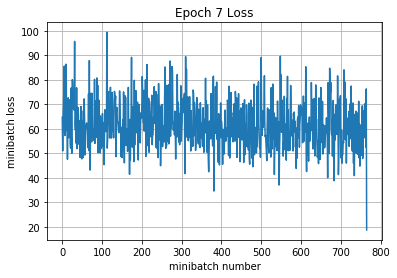

Iteration 5400: with minibatch training loss = 0.821 and accuracy of 0.7
Iteration 5500: with minibatch training loss = 1.02 and accuracy of 0.67
Iteration 5600: with minibatch training loss = 0.771 and accuracy of 0.78
Iteration 5700: with minibatch training loss = 1.05 and accuracy of 0.58
Iteration 5800: with minibatch training loss = 0.836 and accuracy of 0.7
Iteration 5900: with minibatch training loss = 0.694 and accuracy of 0.77
Iteration 6000: with minibatch training loss = 0.813 and accuracy of 0.7
Iteration 6100: with minibatch training loss = 1.04 and accuracy of 0.53
Epoch 8, Overall loss = 0.897 and accuracy of 0.682


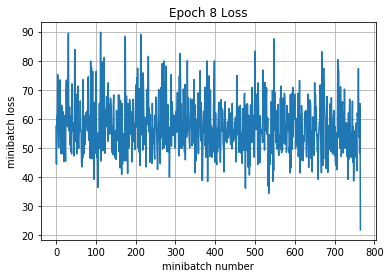

Iteration 6200: with minibatch training loss = 1.03 and accuracy of 0.64
Iteration 6300: with minibatch training loss = 0.709 and accuracy of 0.72
Iteration 6400: with minibatch training loss = 0.87 and accuracy of 0.73
Iteration 6500: with minibatch training loss = 1.04 and accuracy of 0.67
Iteration 6600: with minibatch training loss = 0.838 and accuracy of 0.75
Iteration 6700: with minibatch training loss = 0.854 and accuracy of 0.69
Iteration 6800: with minibatch training loss = 1.02 and accuracy of 0.64
Epoch 9, Overall loss = 0.85 and accuracy of 0.698


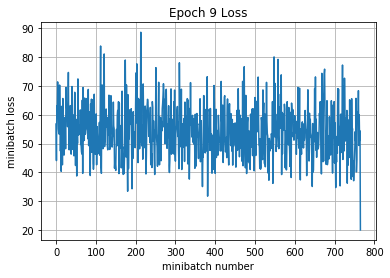

Iteration 6900: with minibatch training loss = 0.818 and accuracy of 0.69
Iteration 7000: with minibatch training loss = 0.651 and accuracy of 0.77
Iteration 7100: with minibatch training loss = 0.74 and accuracy of 0.75
Iteration 7200: with minibatch training loss = 0.844 and accuracy of 0.72
Iteration 7300: with minibatch training loss = 0.662 and accuracy of 0.75
Iteration 7400: with minibatch training loss = 0.851 and accuracy of 0.69
Iteration 7500: with minibatch training loss = 0.756 and accuracy of 0.67
Iteration 7600: with minibatch training loss = 0.674 and accuracy of 0.72
Epoch 10, Overall loss = 0.794 and accuracy of 0.719


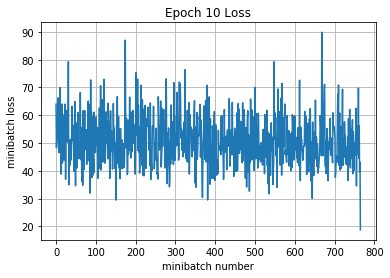

training time (seconds) 4188.307067999995
Validation
Epoch 1, Overall loss = 0.904 and accuracy of 0.708
validation time (seconds) 3.2954123999807052
predict
Epoch 1, Overall loss = 0.00151 and accuracy of 1


In [136]:
def cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding(X, y, is_training, 
                                                                               dropout=None,
                                                                               **kwargs):
    out = X

    #32
    out, [W1, b1] = cnn(idx=1, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #28
    if dropout is not None:
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=2, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #24
    out = tf.nn.max_pool(out, ksize=(1,2,2,1), strides=(1,2,2,1), padding='SAME')
    #12
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=3, X=out, filters=64, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #8
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=4, X=out, filters=128, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #4
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)

    # Affine layer from 4x4x128 = 2,048 to 1024 outputs
    out, _ = affine(1, out, output_size=1024)

    # ReLU Activation Layer
    out = tf.nn.relu(out)

    out = tf.layers.batch_normalization(out, training=is_training)
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    # 5)
    # Affine layer from 1024 input units to 10 outputs
    out, _ = affine(2, out, output_size=10)
    return out, [W1]

local_models_max_polling_long = []

local_models_max_polling_long.append(estimate_model({
    'name': 'dropout: none',
    'model_builder': cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 10,
}, X_train, y_train, X_val, y_val))

local_models_max_polling_long.append(estimate_model({
    'name': 'dropout: 0.1',
    'dropout': 0.1,
    'model_builder': cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 10,
}, X_train, y_train, X_val, y_val))

local_models_max_polling_long.append(estimate_model({
    'name': 'dropout: 0.2',
    'dropout': 0.2,
    'model_builder': cnn_model_5x5x32_5x5x32_5x5x64_5x5x128_with_dropout_after_each_layer_batchnorm_after_affine_valid_padding,
    'learning_rate': 1e-4,
    'num_of_epochs': 10,
}, X_train, y_train, X_val, y_val))

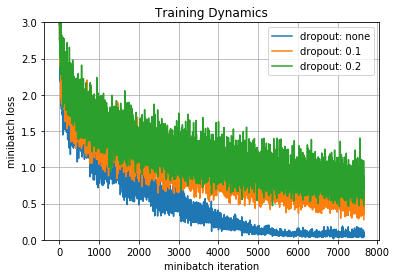

model: dropout: none


num_of_trainable   predict   training validation
time                    2395242  0.143977    3473.13    3.09207
total_correct           2395242       NaN   0.986367      0.576
total_lost              2395242       NaN  0.0772338    1.74502

model: dropout: 0.1


num_of_trainable   predict  training validation
time                    2395242  0.169023   3447.27     2.2612
total_correct           2395242       NaN  0.797245      0.694
total_lost              2395242       NaN  0.571811   0.946571

model: dropout: 0.2


num_of_trainable   predict  training validation
time                    2395242  0.178912   4188.31    3.29541
total_correct           2395242       NaN  0.719082      0.708
total_lost              2395242       NaN  0.794041    0.90372

Model dropout: none


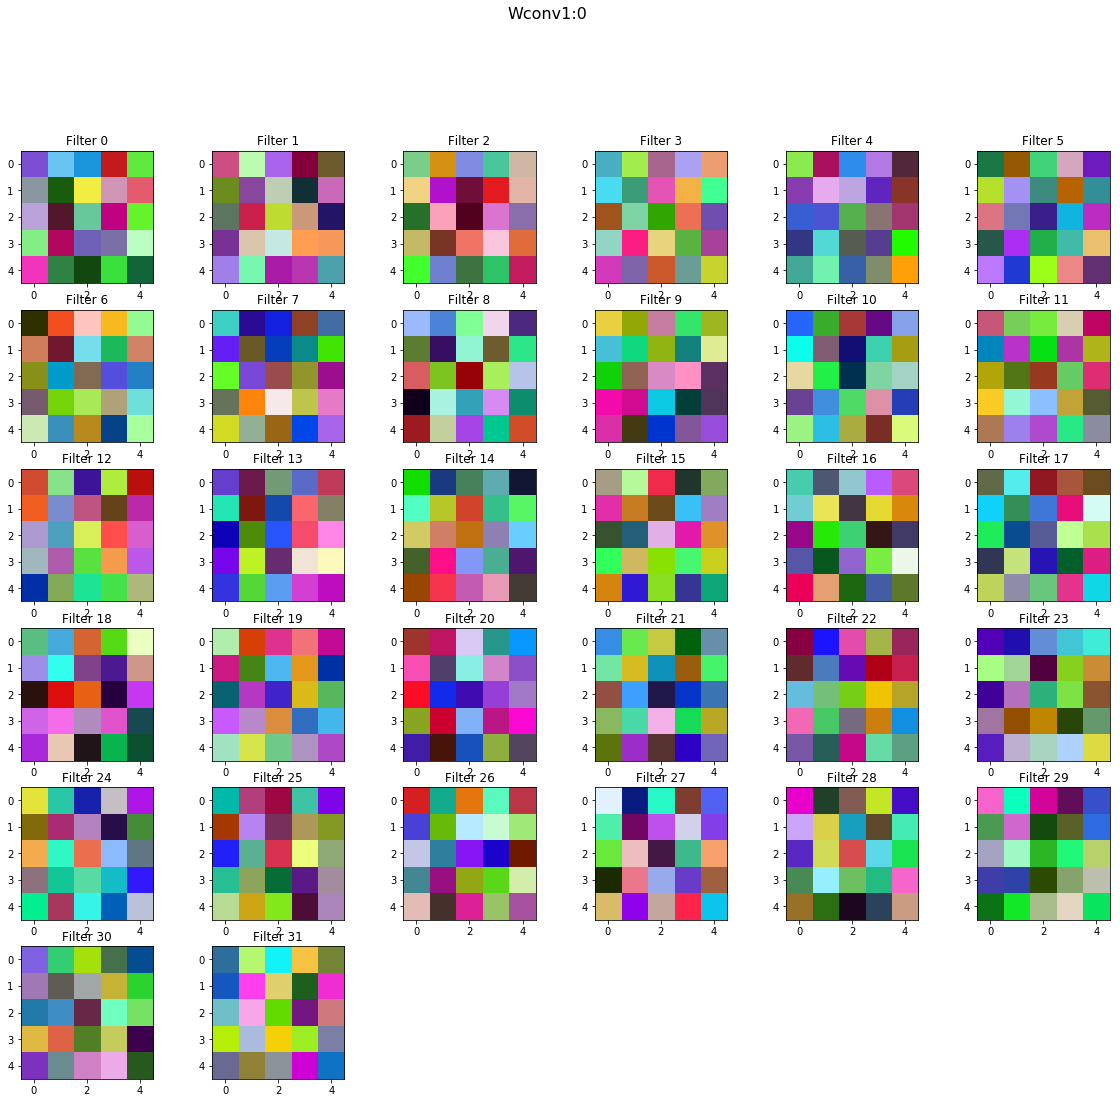

Model dropout: 0.1


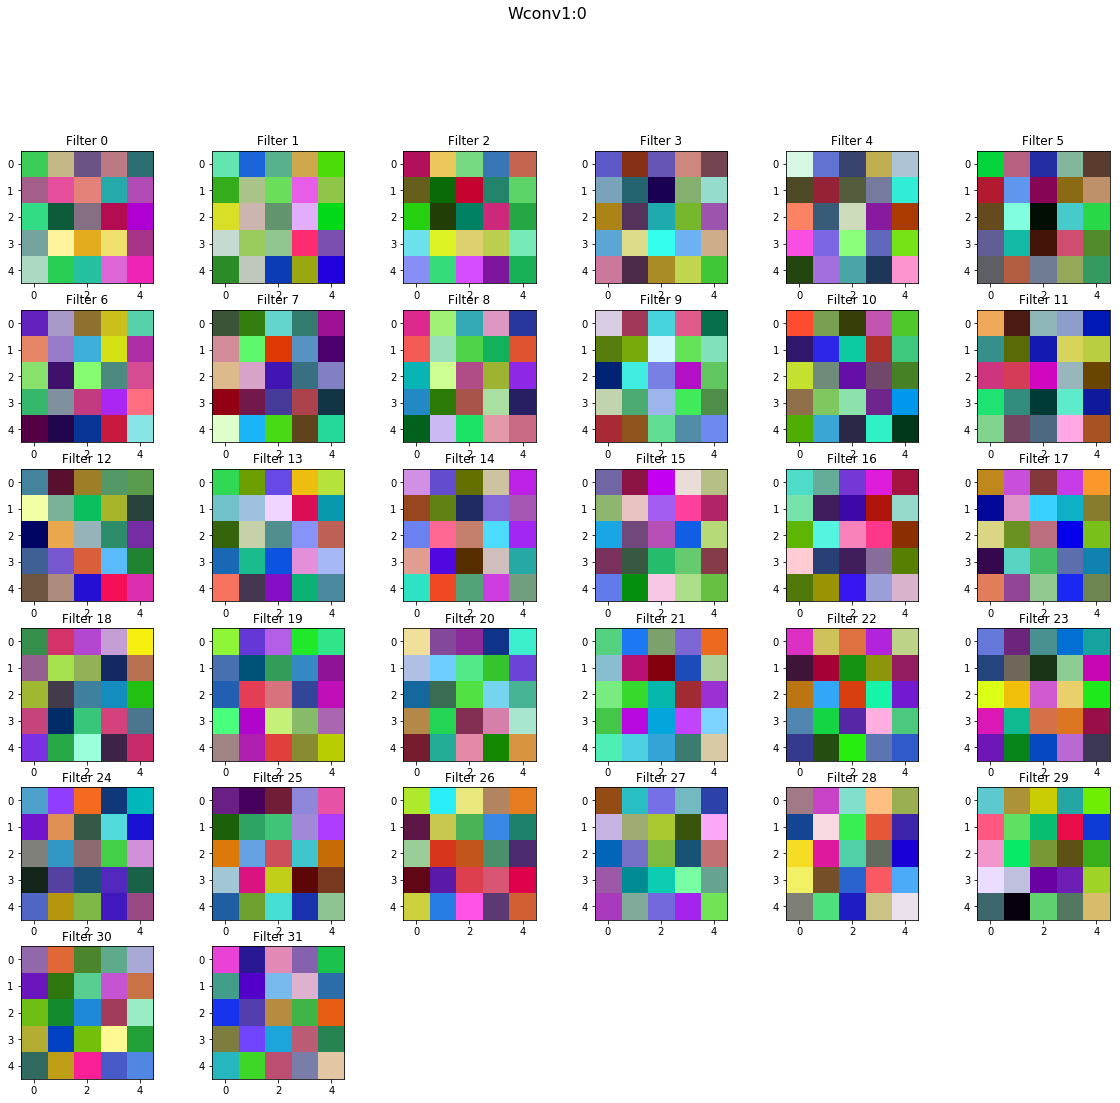

Model dropout: 0.2


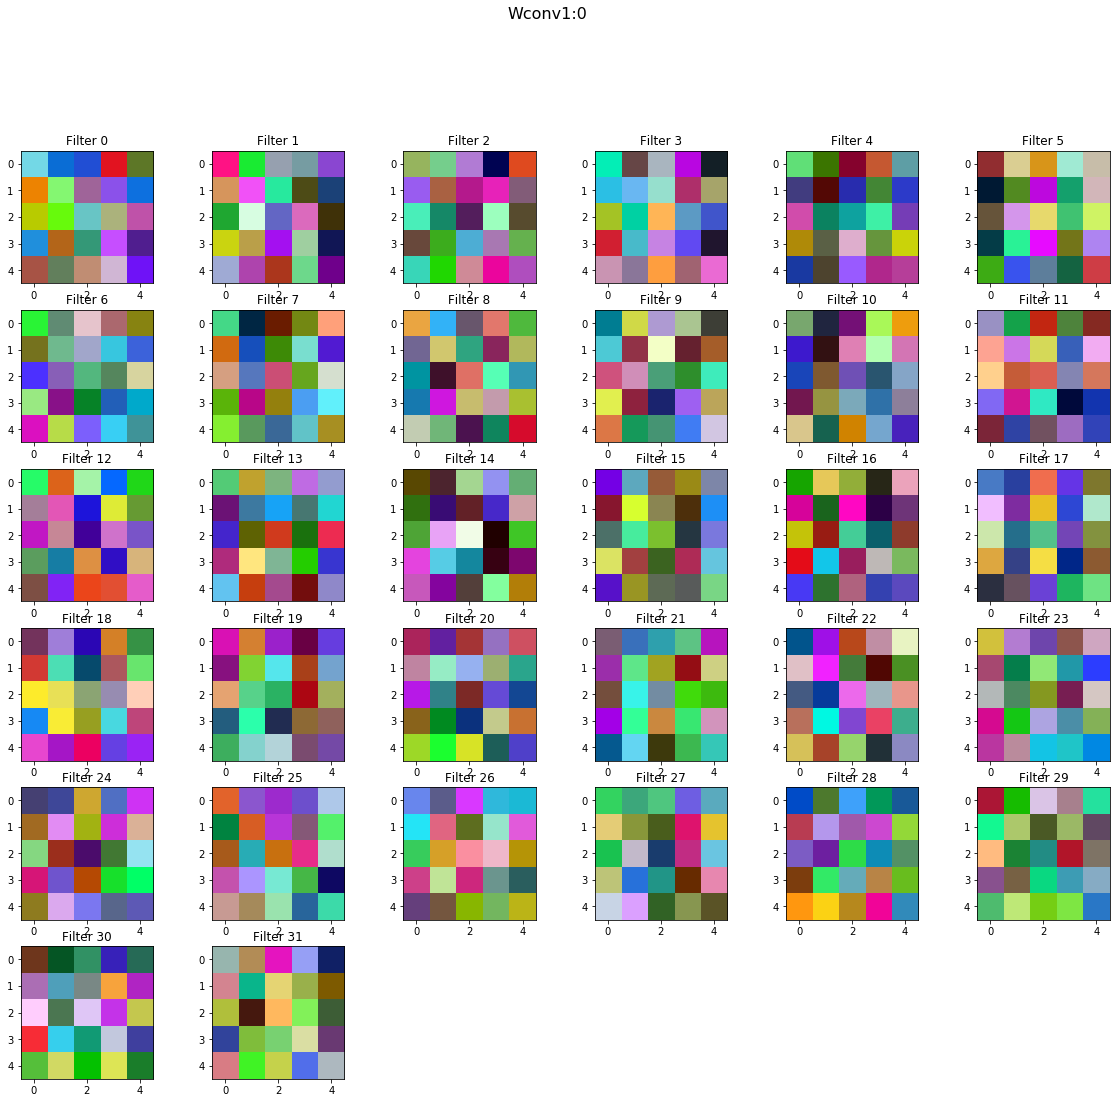

In [137]:
show_graphs(local_models_max_polling_long, ymax=3)
show_tables(local_models_max_polling_long)
draw_layers_of_models(local_models_max_polling_long)

# Find better Learning rate 
## for cnn(32,5,5)->cnn(32,5,5)->maxpoll->cnn(64,5,5)->cnn(128,5,5)->fc(1024)->fc(10)
- **options:** 5e-4, 1e-4, 5e-5
- **winner:** 5e-4

Training
Iteration 0: with minibatch training loss = 3.34 and accuracy of 0.14
Iteration 100: with minibatch training loss = 1.98 and accuracy of 0.38
Iteration 200: with minibatch training loss = 1.45 and accuracy of 0.45
Iteration 300: with minibatch training loss = 1.77 and accuracy of 0.42
Iteration 400: with minibatch training loss = 1.3 and accuracy of 0.53
Iteration 500: with minibatch training loss = 1.68 and accuracy of 0.38
Iteration 600: with minibatch training loss = 1.29 and accuracy of 0.56
Iteration 700: with minibatch training loss = 1.34 and accuracy of 0.41
Epoch 1, Overall loss = 1.74 and accuracy of 0.416


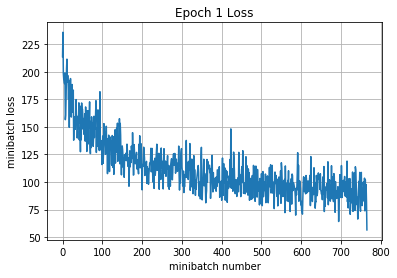

Iteration 800: with minibatch training loss = 1.18 and accuracy of 0.55
Iteration 900: with minibatch training loss = 1.42 and accuracy of 0.41
Iteration 1000: with minibatch training loss = 1.39 and accuracy of 0.55
Iteration 1100: with minibatch training loss = 0.944 and accuracy of 0.78
Iteration 1200: with minibatch training loss = 1.1 and accuracy of 0.58
Iteration 1300: with minibatch training loss = 1.46 and accuracy of 0.47
Iteration 1400: with minibatch training loss = 1.25 and accuracy of 0.44
Iteration 1500: with minibatch training loss = 1.24 and accuracy of 0.5
Epoch 2, Overall loss = 1.24 and accuracy of 0.565


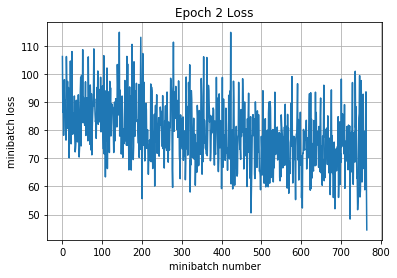

training time (seconds) 906.4174479999929
Validation
Epoch 1, Overall loss = 1.08 and accuracy of 0.62
validation time (seconds) 2.7215344999858644
predict
Epoch 1, Overall loss = 0.0688 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.19 and accuracy of 0.078
Iteration 100: with minibatch training loss = 2.02 and accuracy of 0.38
Iteration 200: with minibatch training loss = 2.51 and accuracy of 0.19
Iteration 300: with minibatch training loss = 2.21 and accuracy of 0.3
Iteration 400: with minibatch training loss = 2.16 and accuracy of 0.31
Iteration 500: with minibatch training loss = 1.74 and accuracy of 0.39
Iteration 600: with minibatch training loss = 1.81 and accuracy of 0.36
Iteration 700: with minibatch training loss = 1.46 and accuracy of 0.53
Epoch 1, Overall loss = 2.04 and accuracy of 0.345


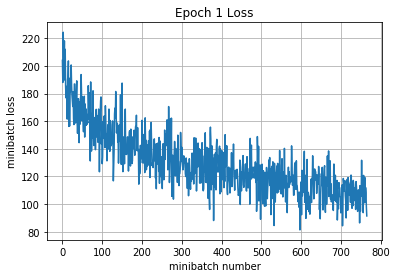

Iteration 800: with minibatch training loss = 1.62 and accuracy of 0.44
Iteration 900: with minibatch training loss = 2.13 and accuracy of 0.47
Iteration 1000: with minibatch training loss = 1.46 and accuracy of 0.53
Iteration 1100: with minibatch training loss = 1.54 and accuracy of 0.41
Iteration 1200: with minibatch training loss = 1.44 and accuracy of 0.58
Iteration 1300: with minibatch training loss = 1.46 and accuracy of 0.45
Iteration 1400: with minibatch training loss = 1.55 and accuracy of 0.47
Iteration 1500: with minibatch training loss = 1.49 and accuracy of 0.47
Epoch 2, Overall loss = 1.54 and accuracy of 0.468


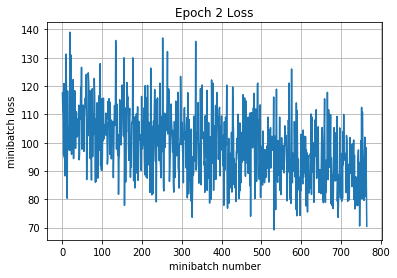

training time (seconds) 778.5040860000008
Validation
Epoch 1, Overall loss = 1.29 and accuracy of 0.544
validation time (seconds) 3.4485958000004757
predict
Epoch 1, Overall loss = 0.391 and accuracy of 1
Training
Iteration 0: with minibatch training loss = 3.28 and accuracy of 0.11
Iteration 100: with minibatch training loss = 2.58 and accuracy of 0.27
Iteration 200: with minibatch training loss = 2.26 and accuracy of 0.25
Iteration 300: with minibatch training loss = 2.6 and accuracy of 0.2
Iteration 400: with minibatch training loss = 2.07 and accuracy of 0.31
Iteration 500: with minibatch training loss = 2.22 and accuracy of 0.33
Iteration 600: with minibatch training loss = 2.29 and accuracy of 0.31
Iteration 700: with minibatch training loss = 1.64 and accuracy of 0.47
Epoch 1, Overall loss = 2.26 and accuracy of 0.297


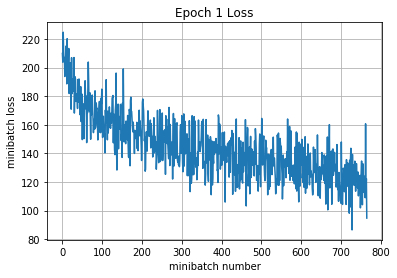

Iteration 800: with minibatch training loss = 2.09 and accuracy of 0.41
Iteration 900: with minibatch training loss = 1.91 and accuracy of 0.36
Iteration 1000: with minibatch training loss = 1.73 and accuracy of 0.38
Iteration 1100: with minibatch training loss = 1.73 and accuracy of 0.38
Iteration 1200: with minibatch training loss = 1.61 and accuracy of 0.44
Iteration 1300: with minibatch training loss = 1.69 and accuracy of 0.44
Iteration 1400: with minibatch training loss = 1.78 and accuracy of 0.34
Iteration 1500: with minibatch training loss = 1.67 and accuracy of 0.34
Epoch 2, Overall loss = 1.77 and accuracy of 0.405


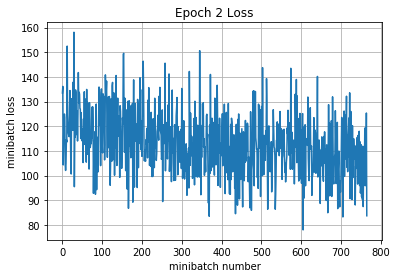

training time (seconds) 946.9310885000159
Validation
Epoch 1, Overall loss = 1.53 and accuracy of 0.468
validation time (seconds) 2.94251439999789
predict
Epoch 1, Overall loss = 0.407 and accuracy of 1


In [138]:
def different_lr(X, y, is_training, 
                                                                               dropout=None,
                                                                               **kwargs):
    out = X

    #32
    out, [W1, b1] = cnn(idx=1, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #28
    if dropout is not None:
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=2, X=out, filters=32, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #24
    out = tf.nn.max_pool(out, ksize=(1,2,2,1), strides=(1,2,2,1), padding='SAME')
    #12
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=3, X=out, filters=64, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #8
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    out, _ = cnn(idx=4, X=out, filters=128, kernel_size=(5,5), is_training=is_training, padding='VALID')
    #4
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)

    # Affine layer from 4x4x128 = 2,048 to 1024 outputs
    out, _ = affine(1, out, output_size=1024)

    # ReLU Activation Layer
    out = tf.nn.relu(out)

    out = tf.layers.batch_normalization(out, training=is_training)
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    # 5)
    # Affine layer from 1024 input units to 10 outputs
    out, _ = affine(2, out, output_size=10)
    return out, [W1]

local_models_different_lr = []

local_models_different_lr.append(estimate_model({
    'name': 'lr: 5e-4',
    'dropout': 0.2,
    'model_builder': different_lr,
    'learning_rate': 5e-4,
    'num_of_epochs': 2,
}, X_train, y_train, X_val, y_val))

local_models_different_lr.append(estimate_model({
    'name': 'lr: 1e-4',
    'dropout': 0.2,
    'model_builder': different_lr,
    'learning_rate': 1e-4,
    'num_of_epochs': 2,
}, X_train, y_train, X_val, y_val))

local_models_different_lr.append(estimate_model({
    'name': 'lr: 5e-5',
    'dropout': 0.2,
    'model_builder': different_lr,
    'learning_rate': 5e-5,
    'num_of_epochs': 2,
}, X_train, y_train, X_val, y_val))

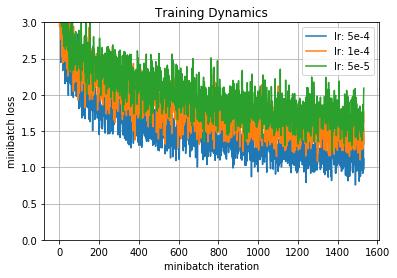

model: lr: 5e-4


num_of_trainable   predict  training validation
time                    2395242  0.196992   906.417    2.72153
total_correct           2395242       NaN  0.564531       0.62
total_lost              2395242       NaN   1.23568    1.07744

model: lr: 1e-4


num_of_trainable   predict  training validation
time                    2395242  0.185052   778.504     3.4486
total_correct           2395242       NaN  0.468306      0.544
total_lost              2395242       NaN   1.54474    1.28632

model: lr: 5e-5


num_of_trainable   predict  training validation
time                    2395242  0.222172   946.931    2.94251
total_correct           2395242       NaN  0.404918      0.468
total_lost              2395242       NaN   1.77261    1.53471

Model lr: 5e-4


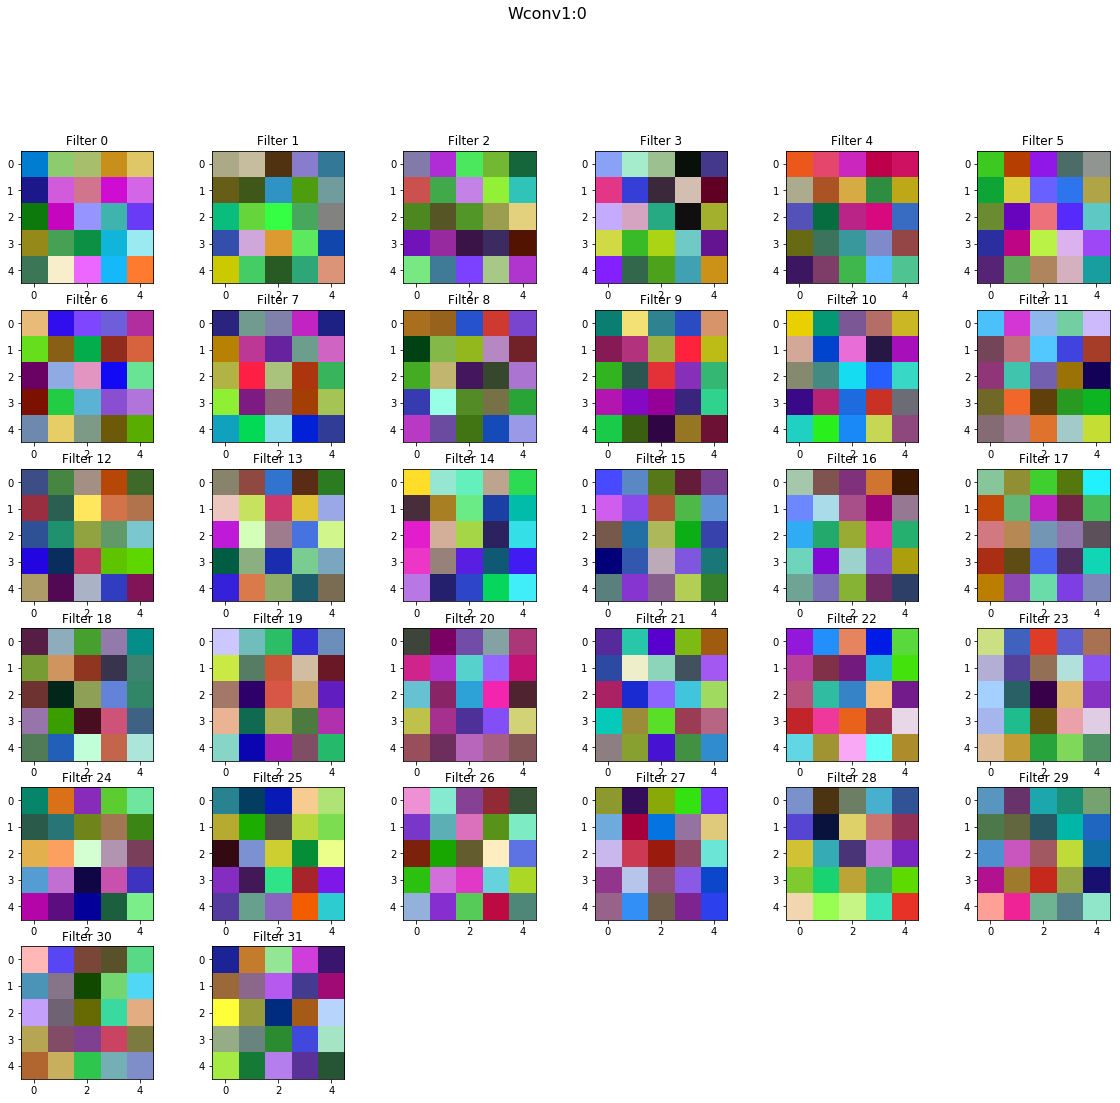

Model lr: 1e-4


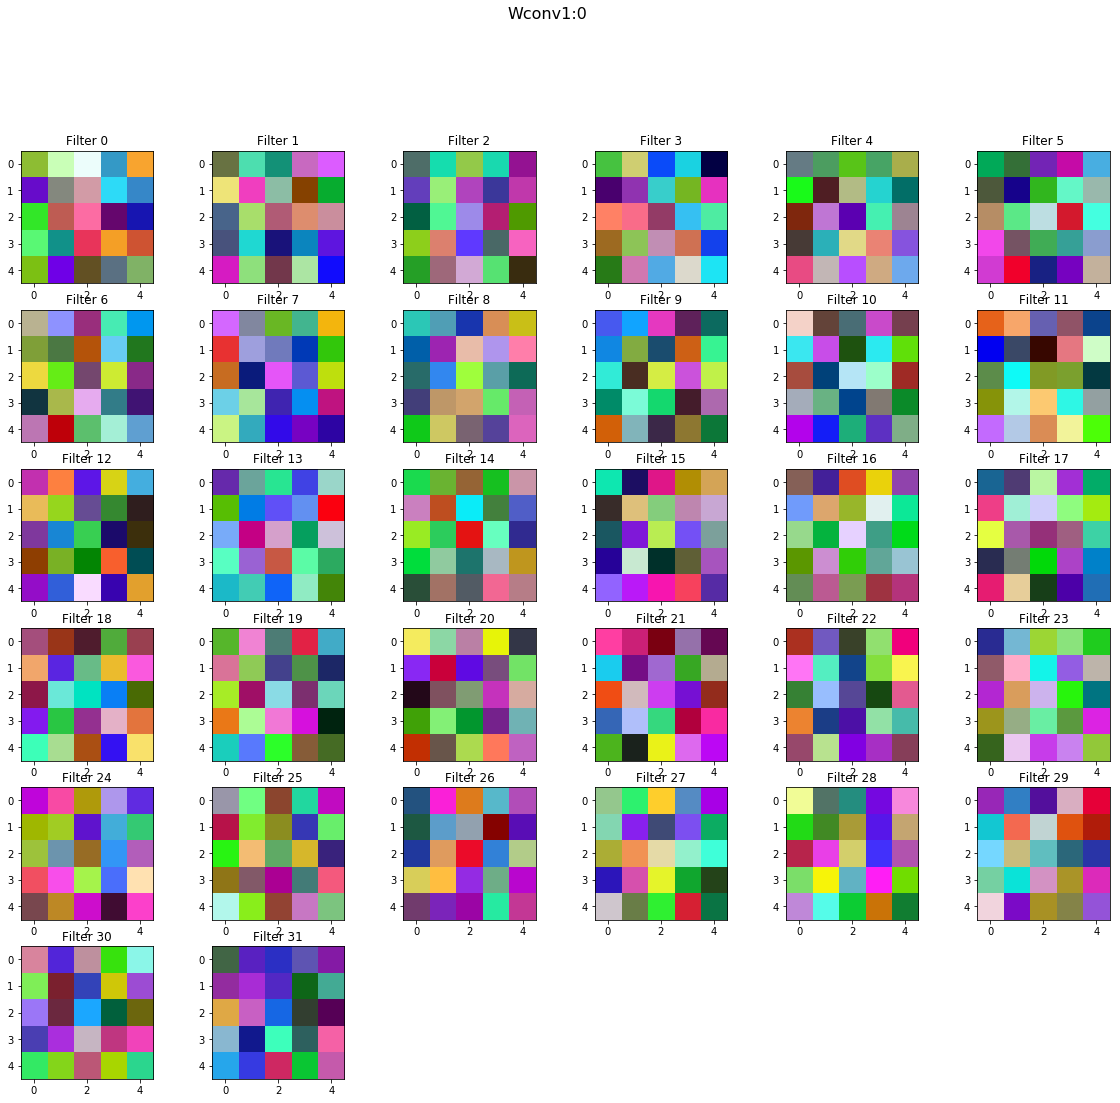

Model lr: 5e-5


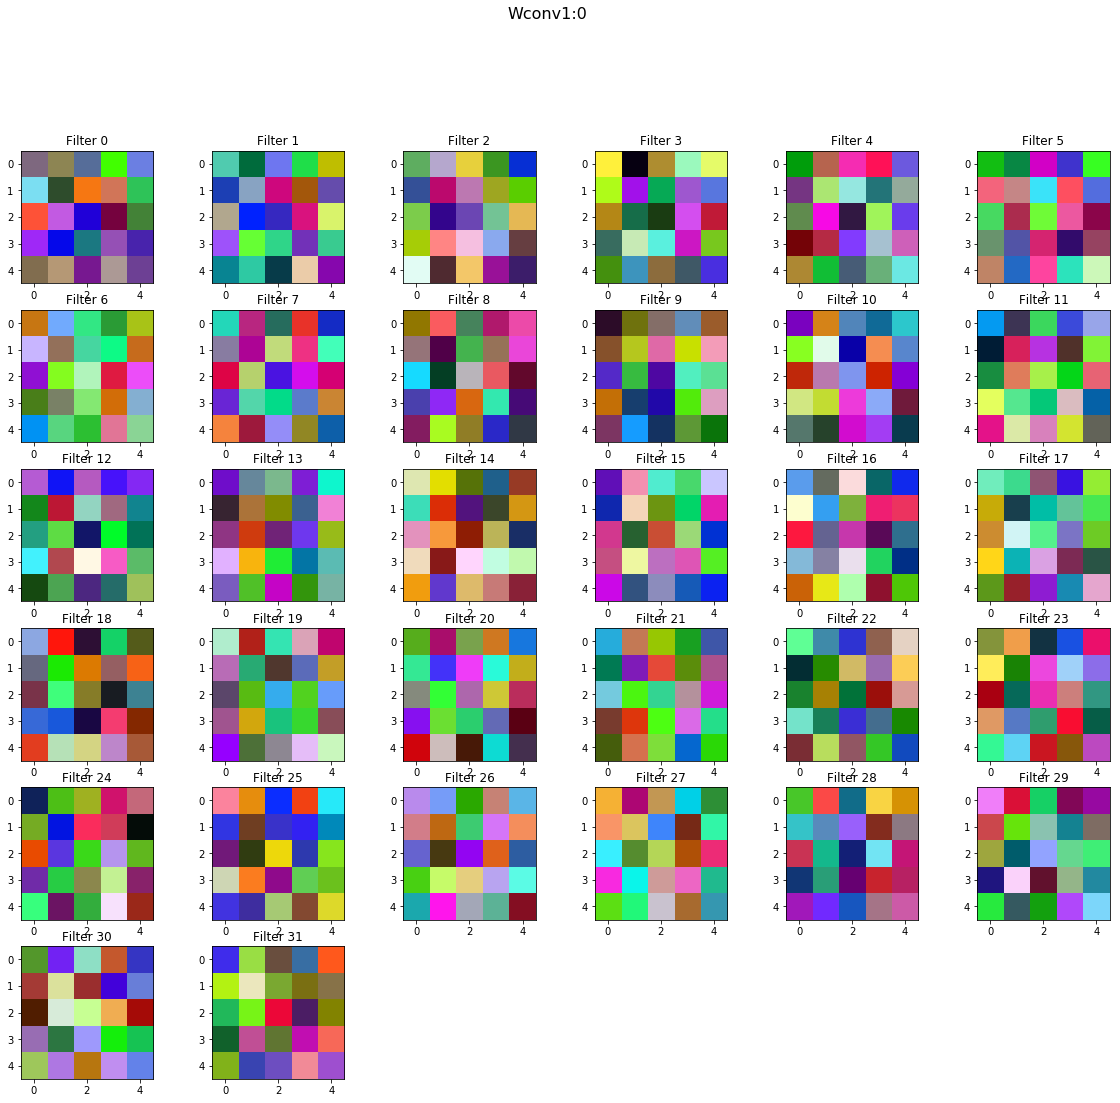

In [139]:
show_graphs(local_models_different_lr, ymax=3)
show_tables(local_models_different_lr)
draw_layers_of_models(local_models_different_lr)

In [6]:
def different_lr_for_deeper_net(X, y, is_training, 
                                                                               dropout=None,
                                                                               **kwargs):
    out = X

    # 32
    out, [W1, b1] = cnn(idx=1, X=out, filters=32, kernel_size=(3,3), is_training=is_training, padding='VALID',
                        dropout=dropout)
    # 30
    out, _ = cnn(idx=2, X=out, filters=32, kernel_size=(3,3), is_training=is_training, padding='VALID',
                        dropout=dropout)
    # 28
    out = tf.nn.max_pool(out, ksize=(1,2,2,1), strides=(1,2,2,1), padding='SAME')

    # 14
    out, _ = cnn(idx=3, X=out, filters=64, kernel_size=(5,5), is_training=is_training, padding='VALID',
                        dropout=dropout)
    # 10
    out, _ = cnn(idx=4, X=out, filters=64, kernel_size=(5,5), is_training=is_training, padding='VALID',
                        dropout=dropout)
    # 6
    out, _ = cnn(idx=5, X=out, filters=128, kernel_size=(5,5), is_training=is_training, padding='VALID',
                        dropout=dropout)

    # Affine layer from 6x6x128 = 4,608 to 1024 outputs
    out, _ = affine(1, out, output_size=1024)

    # ReLU Activation Layer
    out = tf.nn.relu(out)

    out = tf.layers.batch_normalization(out, training=is_training)
    if dropout is not None:    
        out = tf.layers.dropout(out, rate=dropout, training=is_training)
    # 5)
    # Affine layer from 1024 input units to 10 outputs
    out, _ = affine(2, out, output_size=10)
    return out, [W1]

local_models_different_lr_for_deeper_net = []

local_models_different_lr_for_deeper_net.append(estimate_model({
    'name': 'lr: 5e-4',
    'dropout': 0.2,
    'model_builder': different_lr_for_deeper_net,
    'learning_rate': 5e-4,
    'num_of_epochs': 1,
}, X_train, y_train, X_val, y_val))

local_models_different_lr_for_deeper_net.append(estimate_model({
    'name': 'lr: 1e-4',
    'dropout': 0.2,
    'model_builder': different_lr_for_deeper_net,
    'learning_rate': 1e-4,
    'num_of_epochs': 1,
}, X_train, y_train, X_val, y_val))

local_models_different_lr_for_deeper_net.append(estimate_model({
    'name': 'lr: 5e-5',
    'dropout': 0.2,
    'model_builder': different_lr_for_deeper_net,
    'learning_rate': 5e-5,
    'num_of_epochs': 1,
}, X_train, y_train, X_val, y_val))

Training
Iteration 0: with minibatch training loss = 3.14 and accuracy of 0.12


KeyboardInterrupt: 